In [1]:
from Functions import *

In [2]:
def get_data3(year):
    """Retrieves data from Cassini's Saturn orbits for a given year."""
    #Filename
    filename = str(year) + "_FGM_KSM_1M.TAB"

    #Retrieve data from csv file in pandas dataframe
    data = pd.read_csv(filename, infer_datetime_format=True, sep='\s+', names=["Time","BX","BY","BZ","Btotal","X","Y",'Z','LocalHour','NPTS'], engine='python')
    data["Time"] = pd.to_datetime(data["Time"], format='%Y/%m/%d %H:%M:%S')
    y = data['Y']
    z = data['Z']
    data['Rs'] = ((z*z)+(y*y))**0.5
    data["Elevation"] = np.degrees(np.arctan(data["BZ"]/(data["BX"]**2 + data["BY"]**2)**0.5))
    data["Azimuth"] = np.degrees(np.arccos(-data["BX"]/(data["BX"]**2 + data["BY"]**2)**0.5))
    return data
data = get_data3(2005)
print(data)


                      Time     BX     BY     BZ  Btotal       X       Y  \
0      2005-01-01 00:00:30 -0.121 -0.378 -0.210   0.450  19.440 -56.253   
1      2005-01-01 00:01:30 -0.119 -0.380 -0.206   0.449  19.441 -56.253   
2      2005-01-01 00:02:30 -0.123 -0.370 -0.215   0.446  19.442 -56.252   
3      2005-01-01 00:03:30 -0.113 -0.371 -0.208   0.441  19.443 -56.252   
4      2005-01-01 00:04:30 -0.119 -0.363 -0.228   0.445  19.444 -56.251   
...                    ...    ...    ...    ...     ...     ...     ...   
493039 2005-12-31 23:55:30  1.644  1.946 -0.423   2.583 -11.056 -41.606   
493040 2005-12-31 23:56:30  1.671  1.912 -0.423   2.574 -11.055 -41.608   
493041 2005-12-31 23:57:30  1.664  1.936 -0.454   2.593 -11.054 -41.610   
493042 2005-12-31 23:58:30  1.685  1.966 -0.388   2.618 -11.053 -41.612   
493043 2005-12-31 23:59:30  1.705  1.976 -0.333   2.631 -11.052 -41.614   

            Z  LocalHour  NPTS         Rs  Elevation     Azimuth  
0       3.745        7.3    60  

In [3]:
indexlist = [266  ,28869  ,65808 , 94741, 120814 ,144293 ,170100 ,194921 ,220996,245013,
 271243, 295875, 321065 ,340187 ,364469, 389591 ,423463 ,463252]

<ipython-input-4-f0cb9333ee7d>:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


IndexError: list index out of range

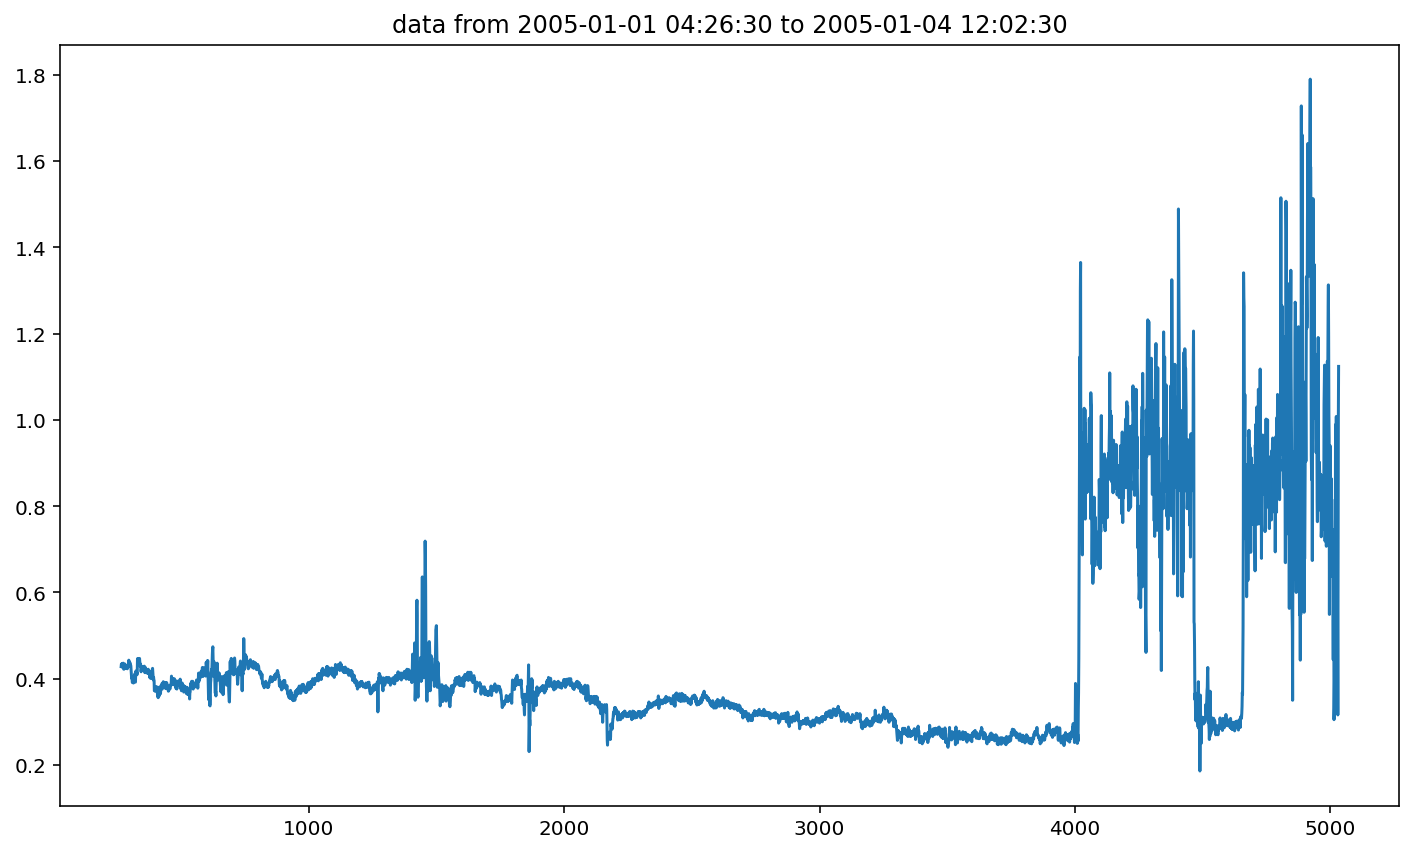

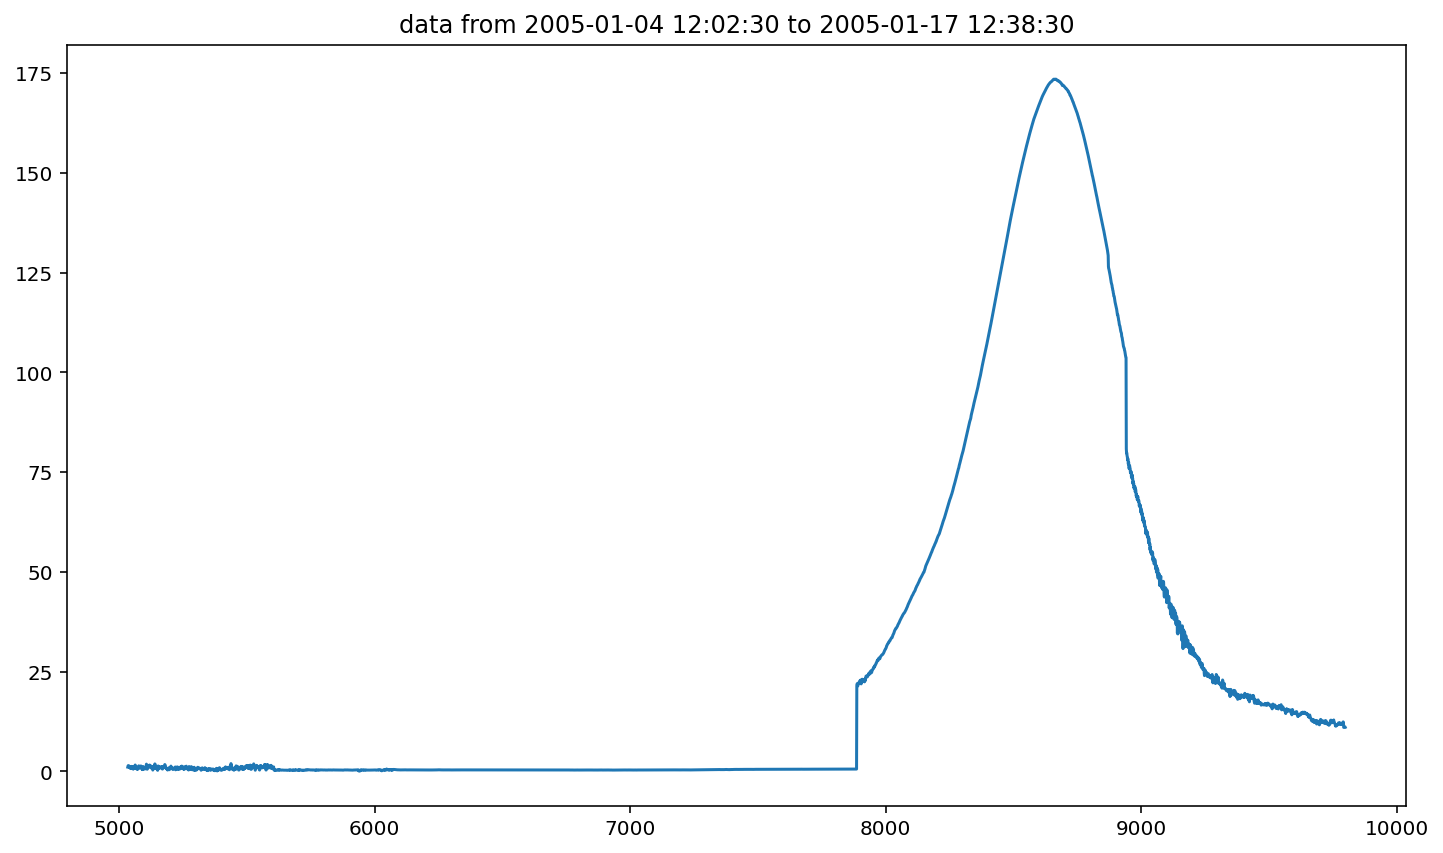

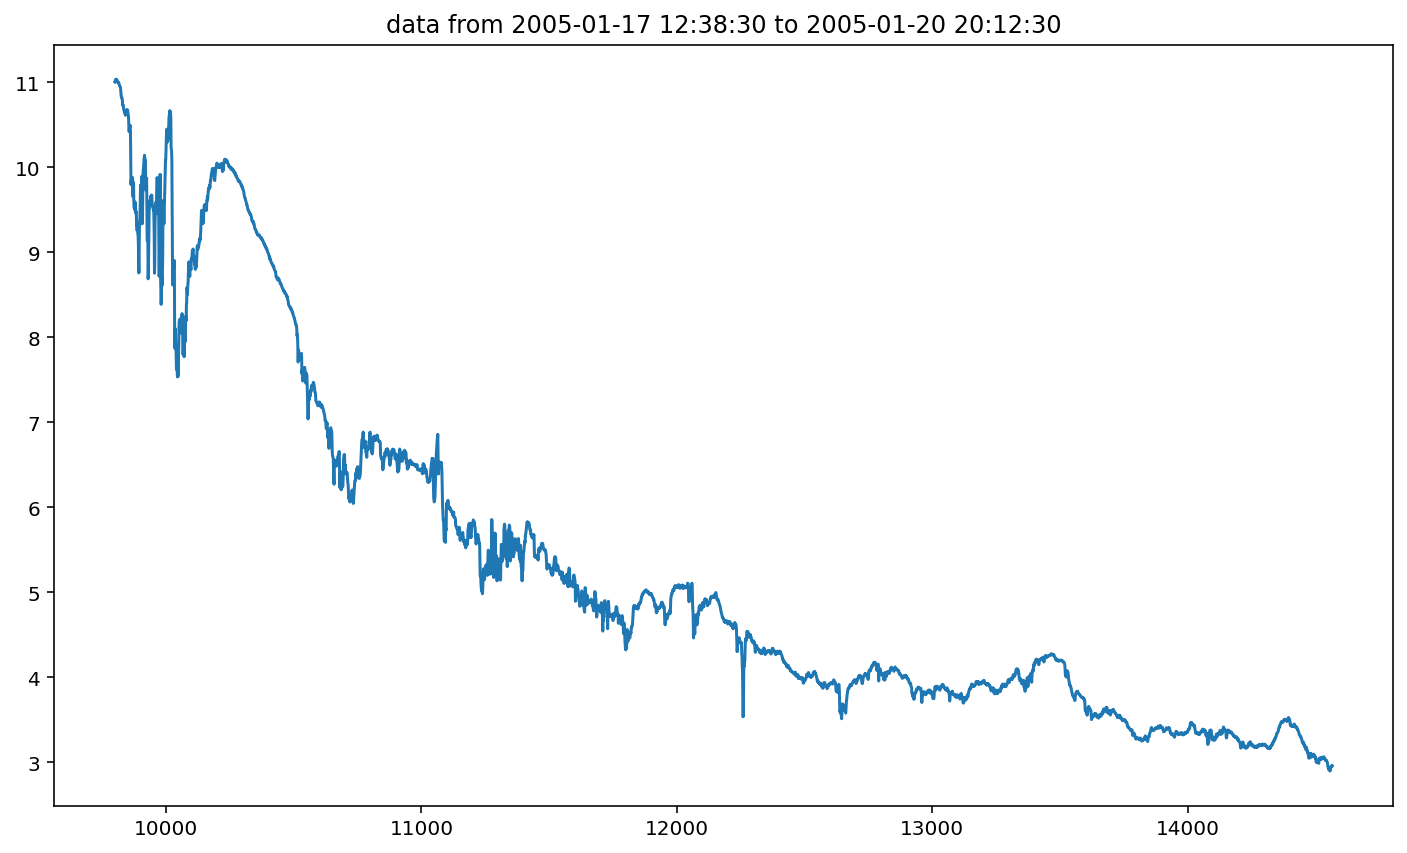

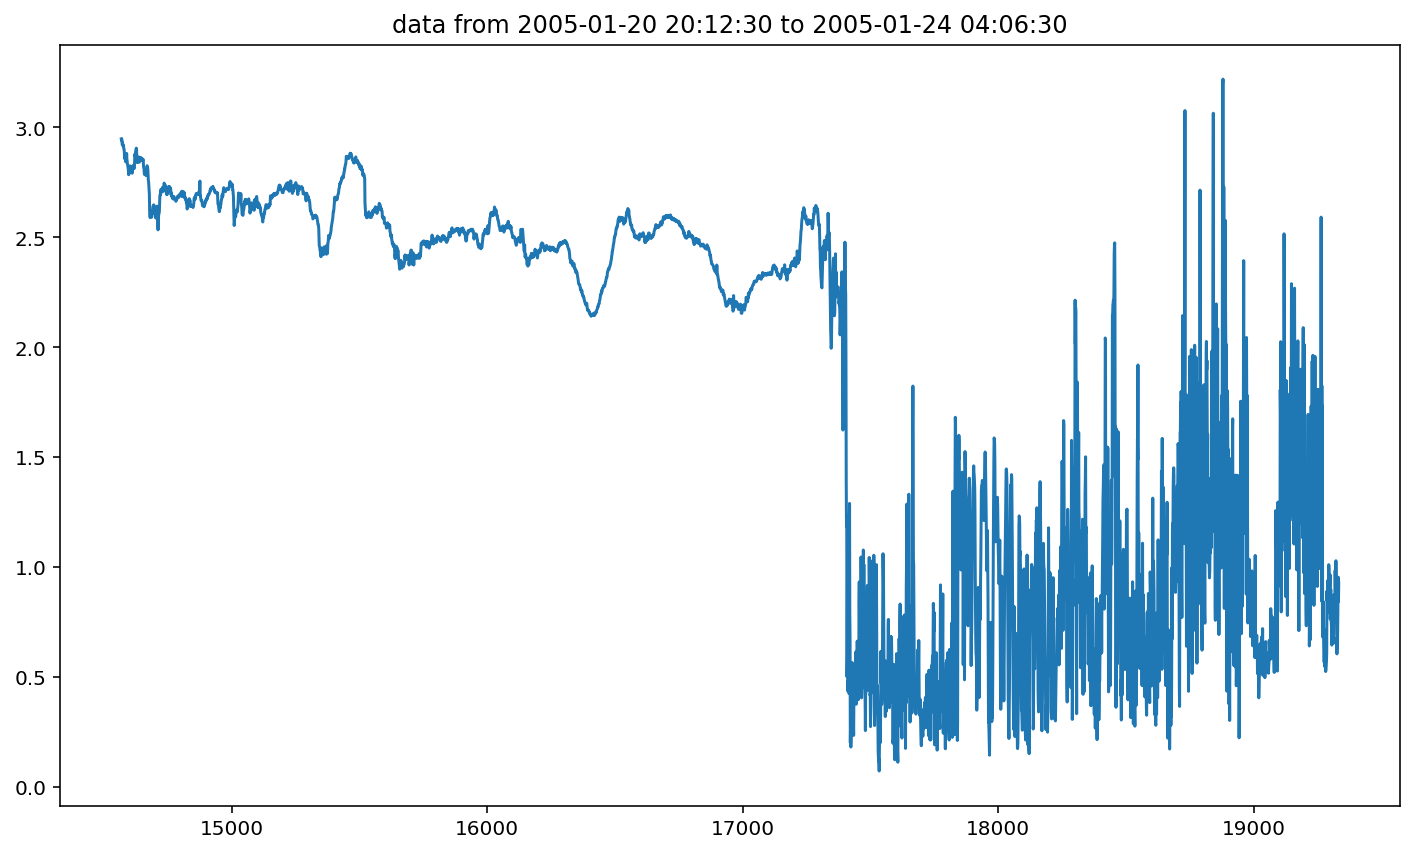

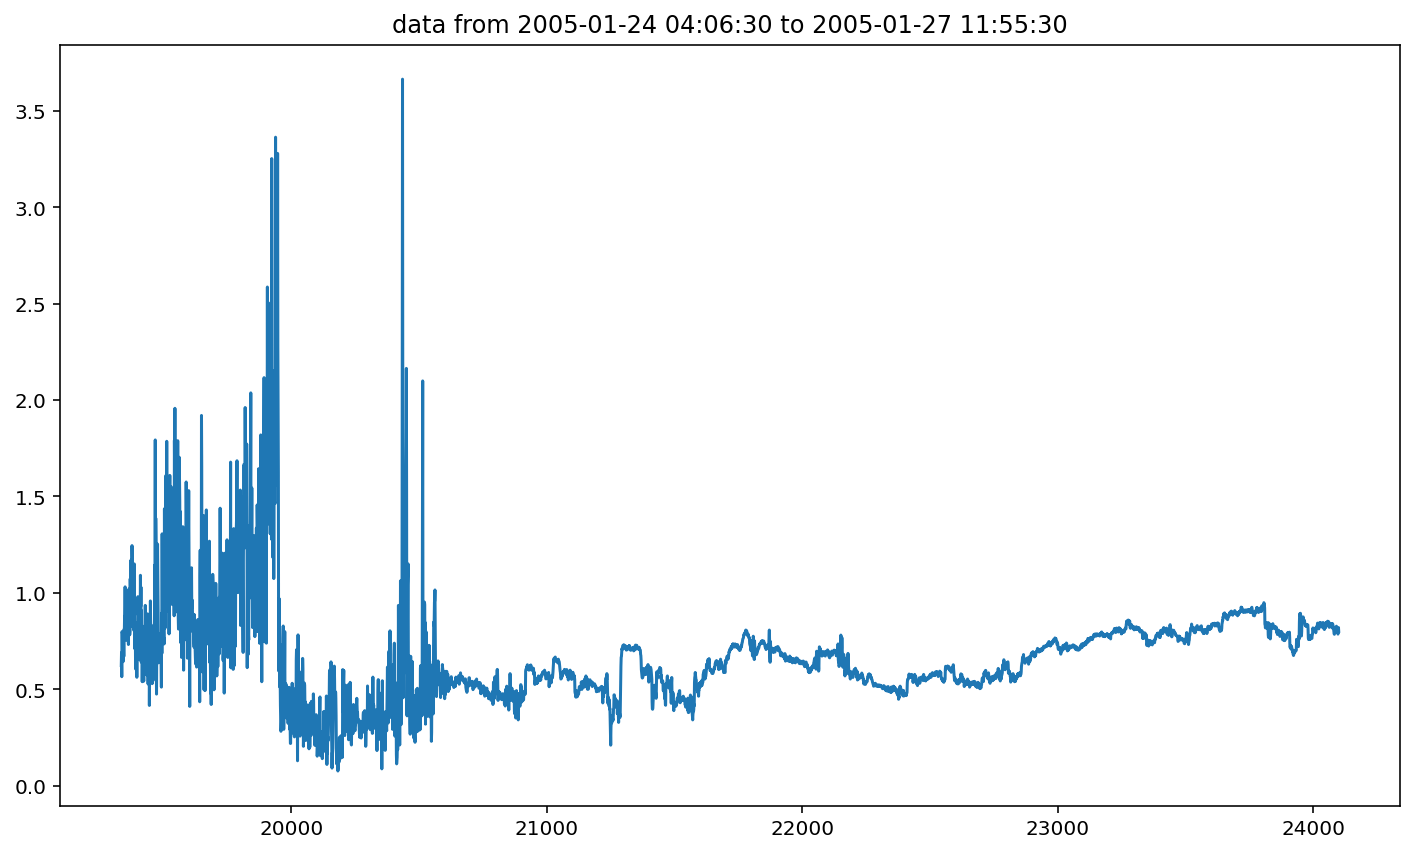

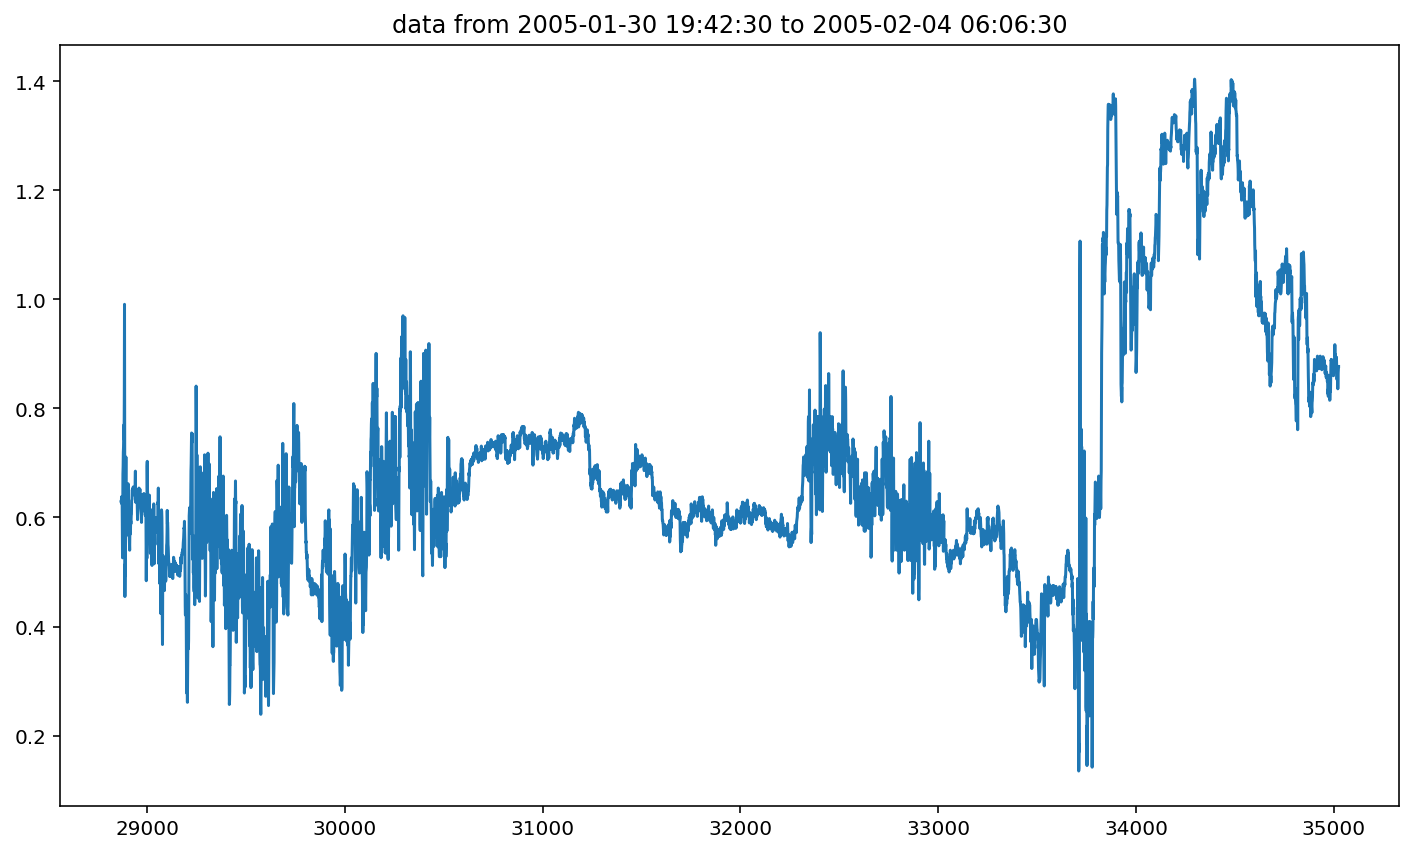

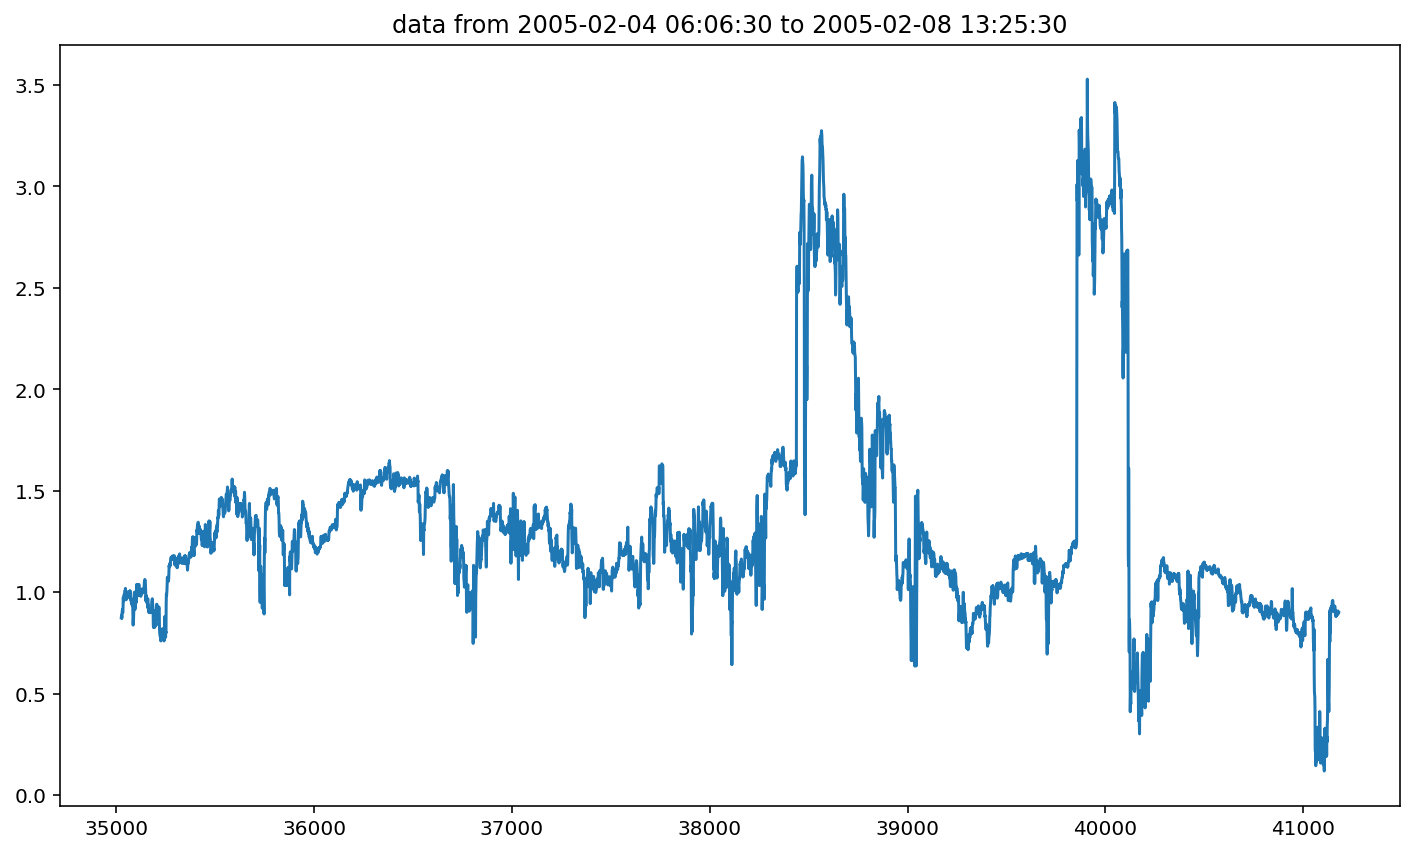

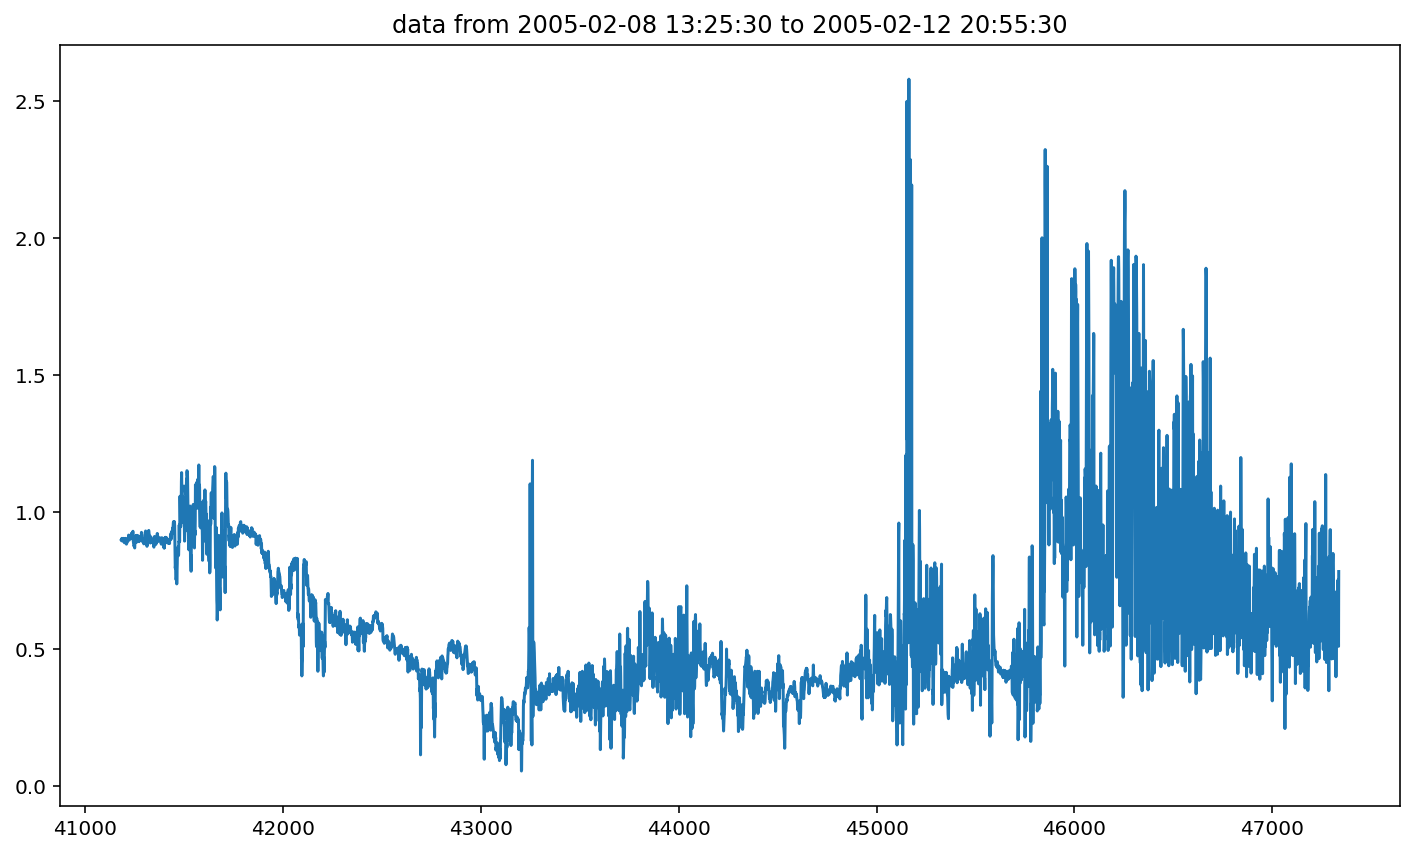

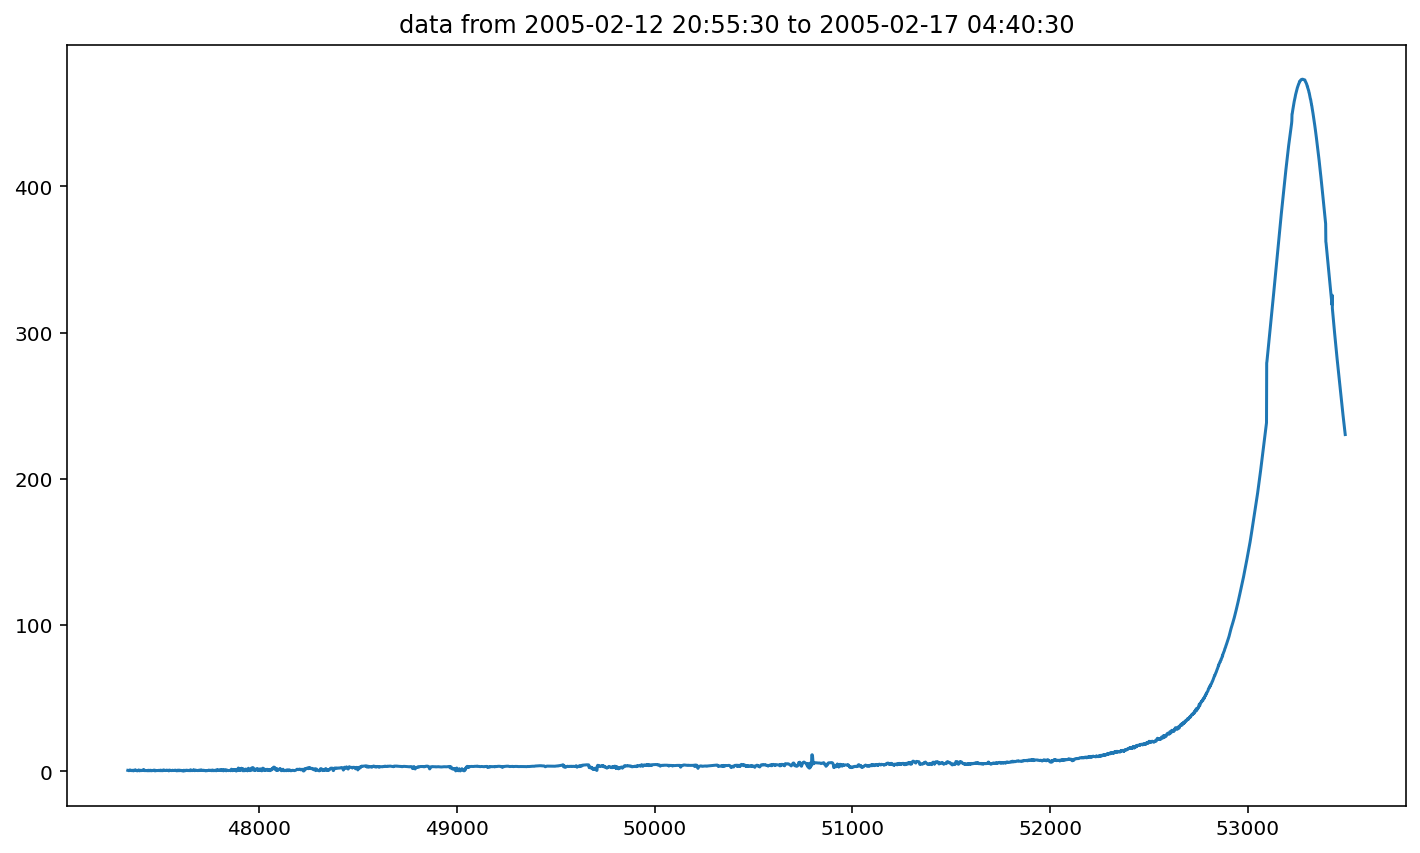

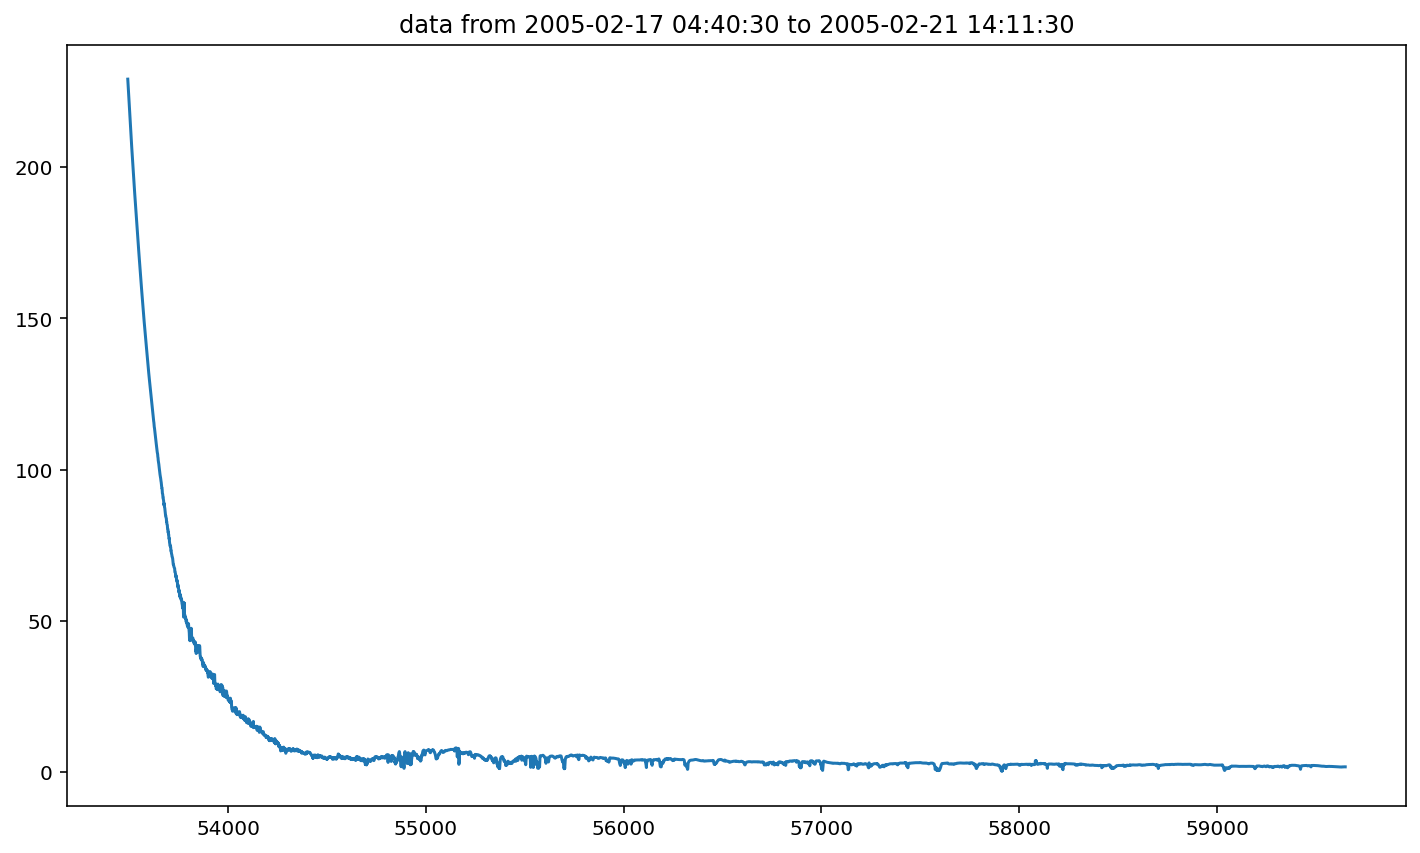

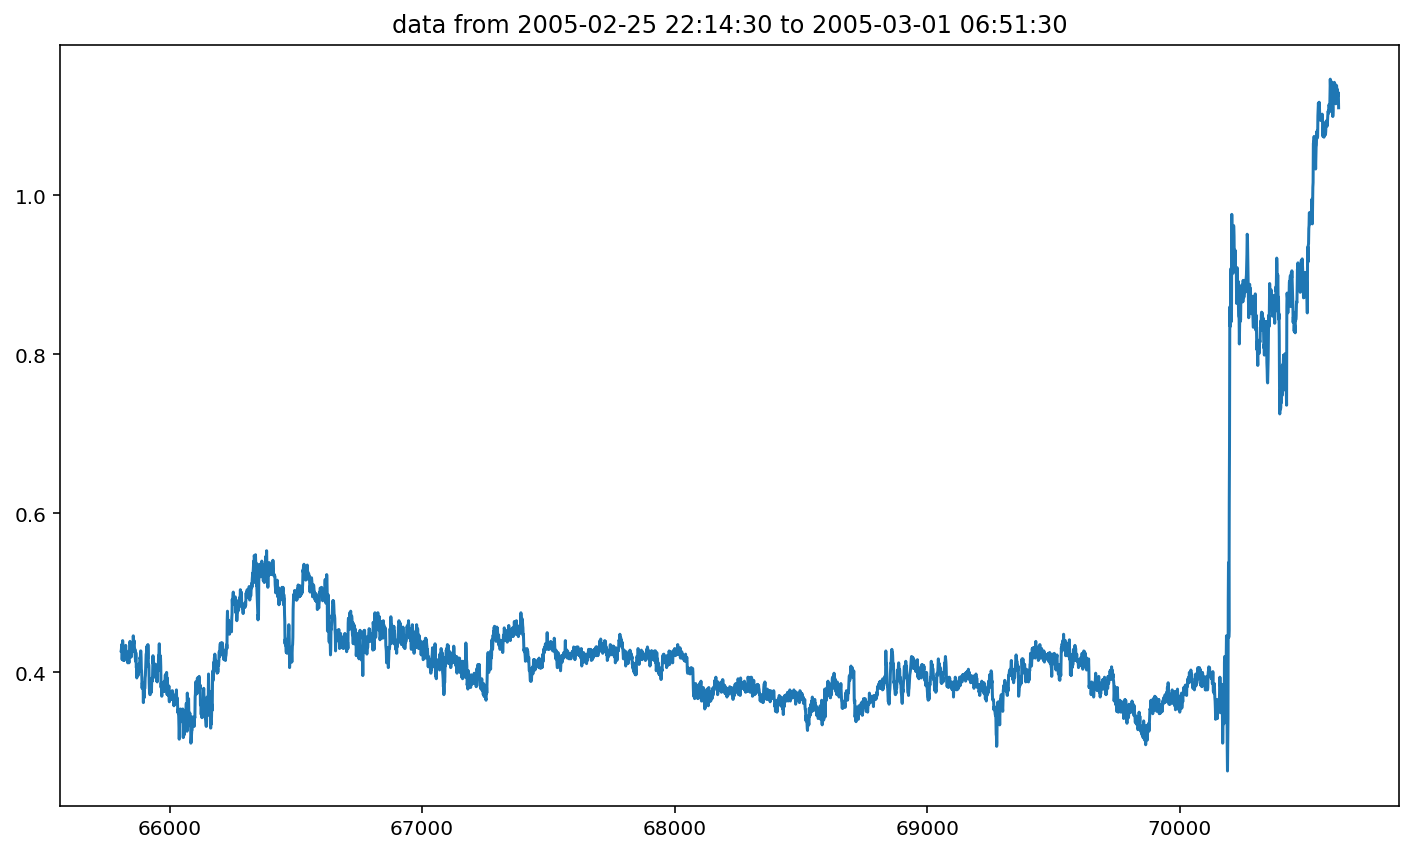

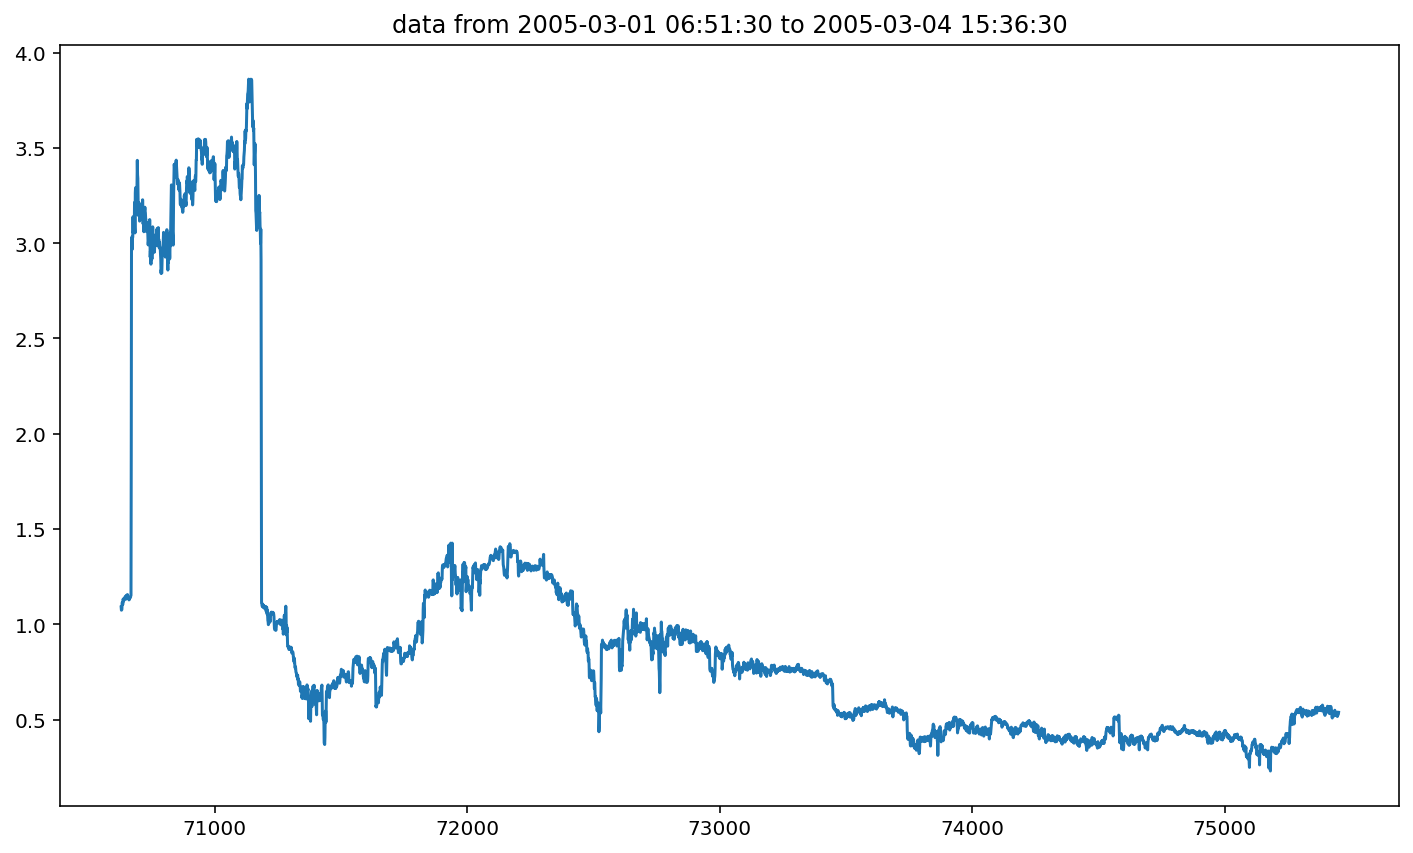

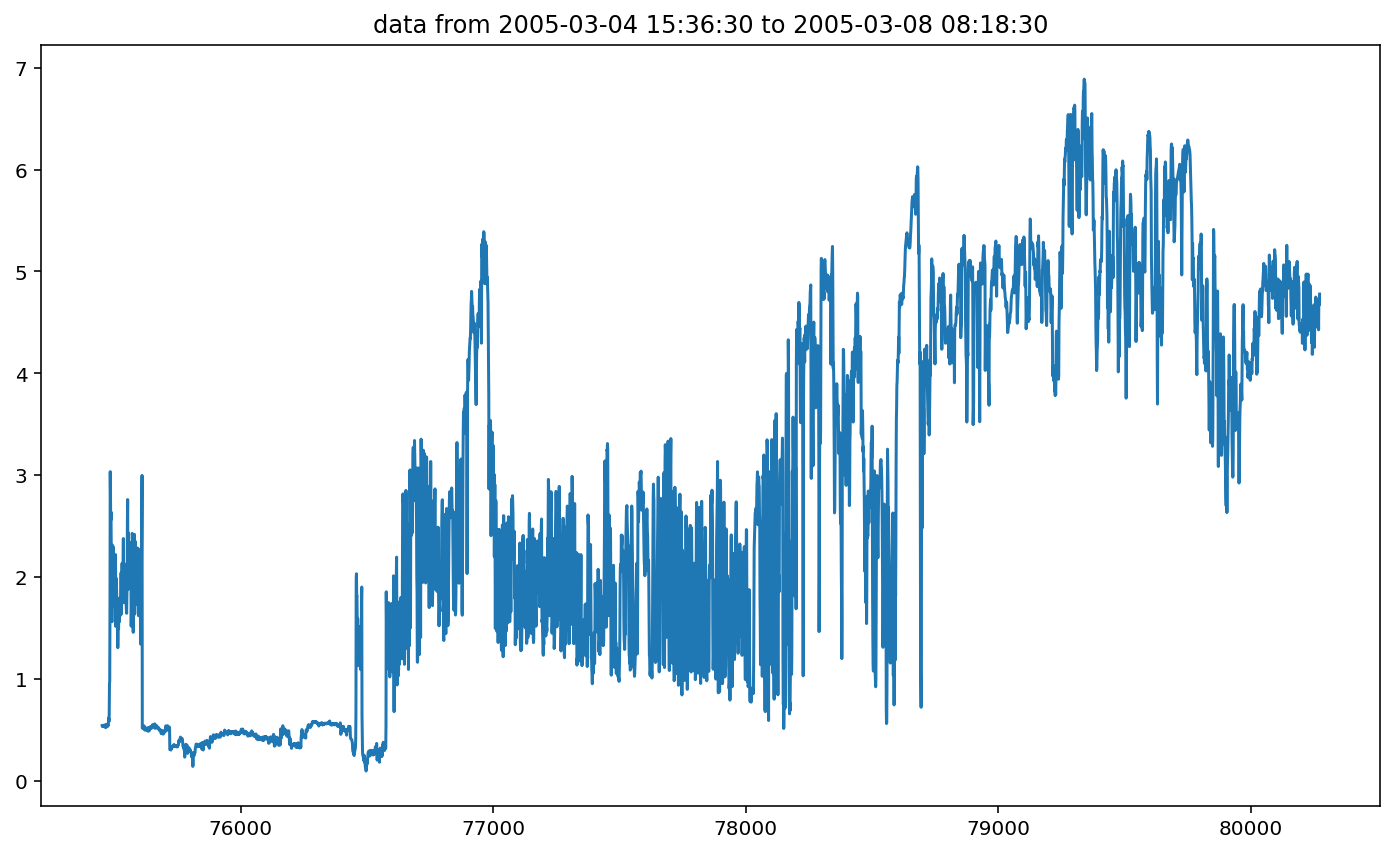

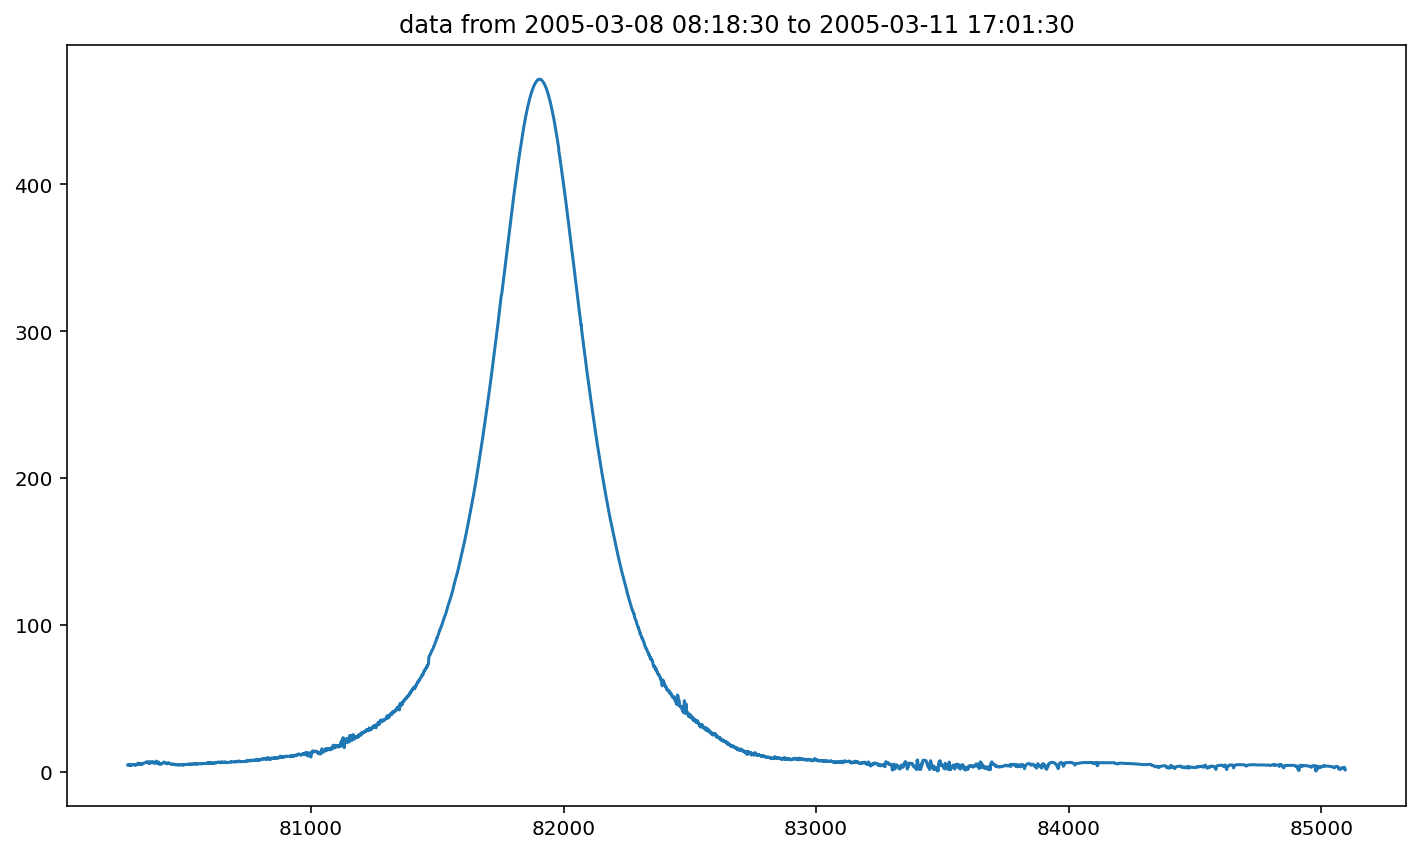

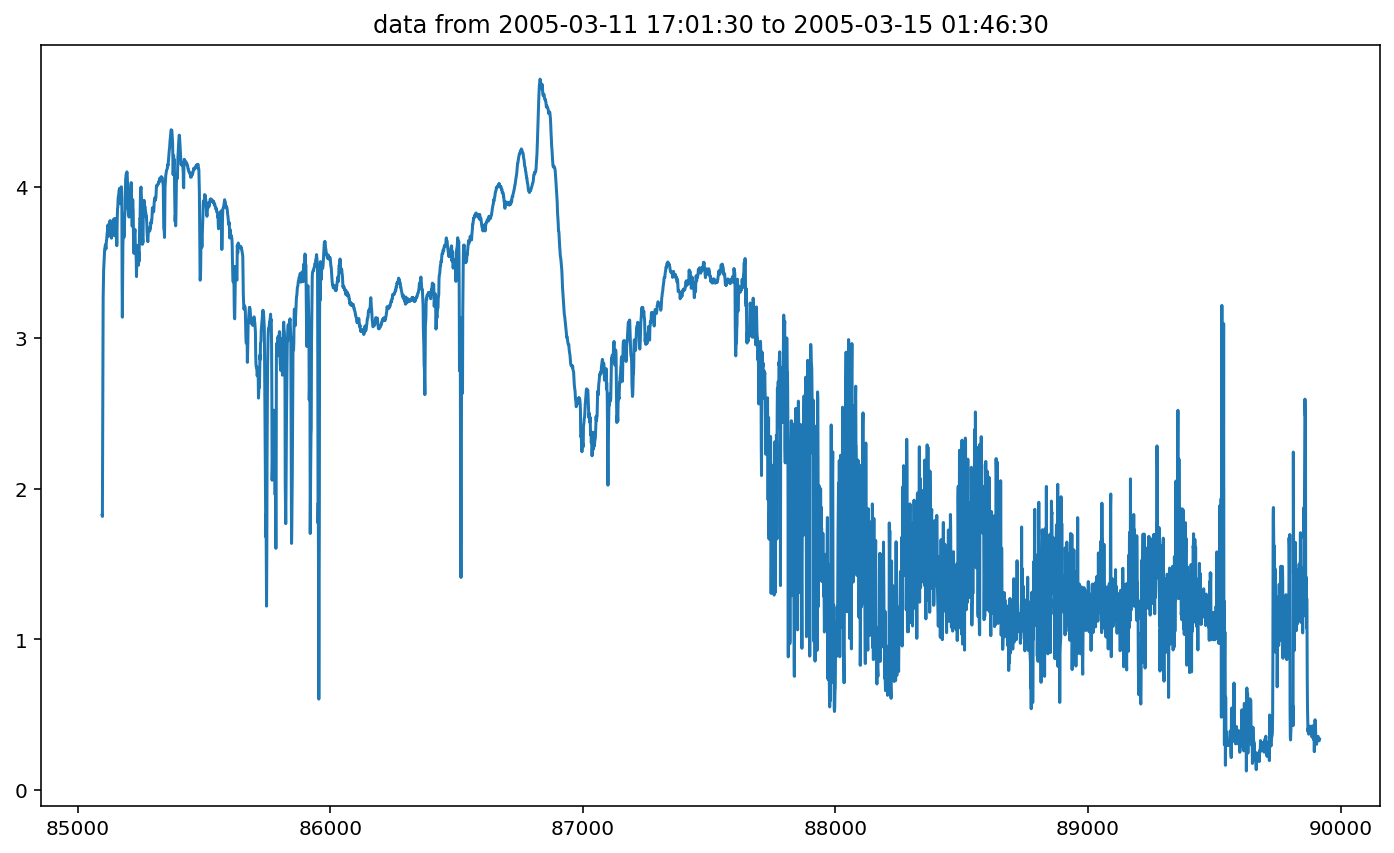

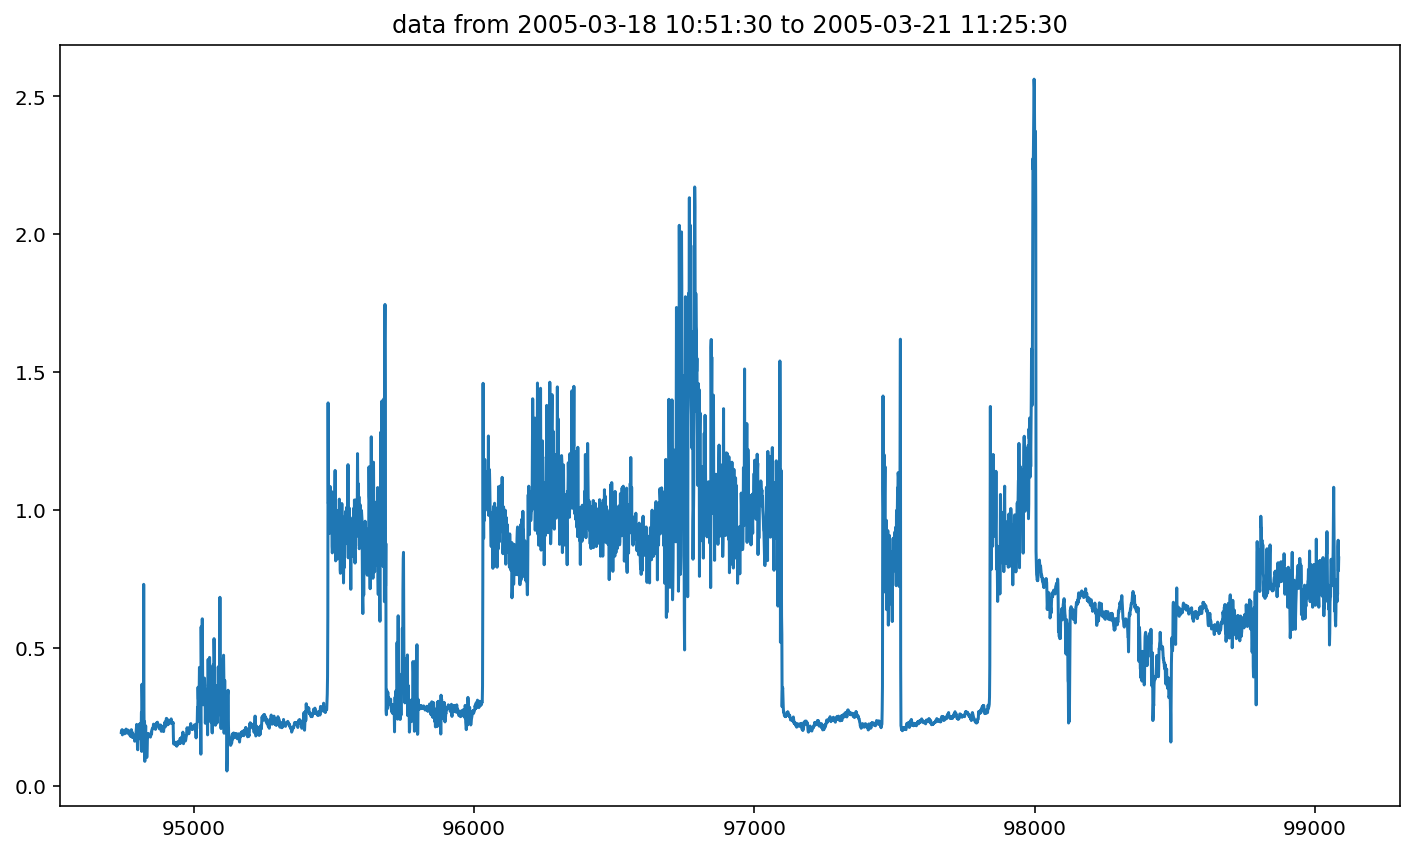

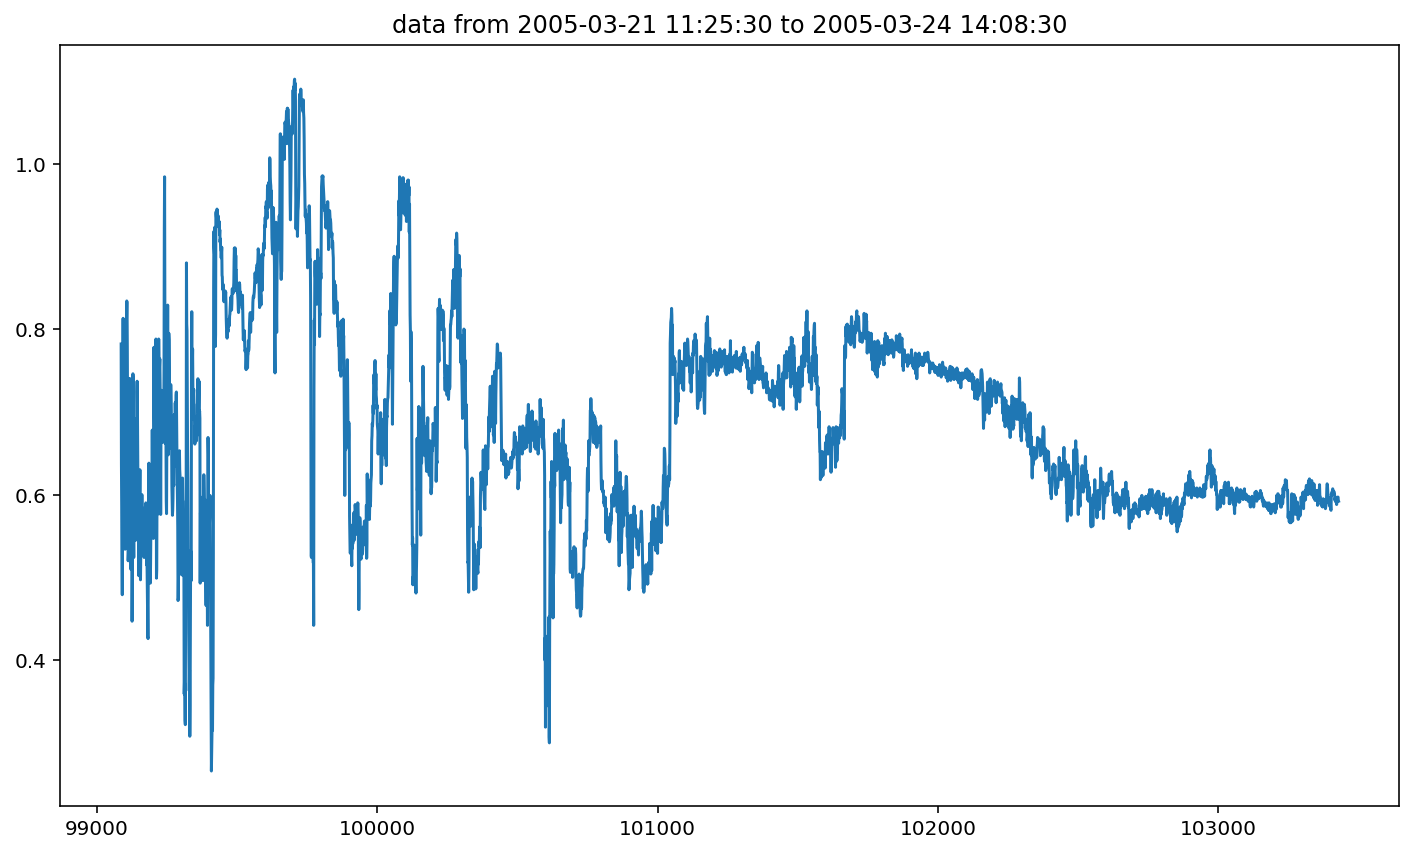

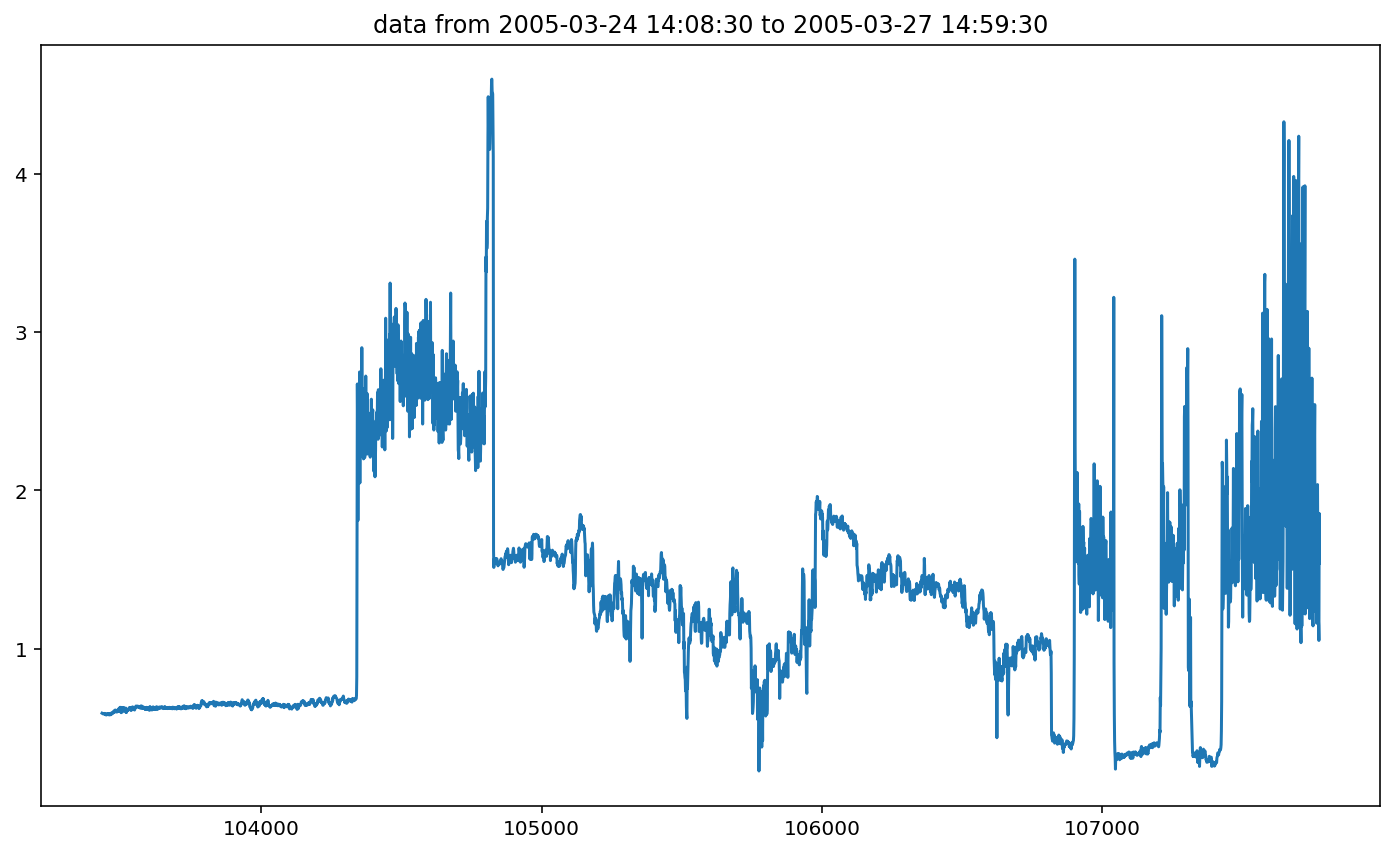

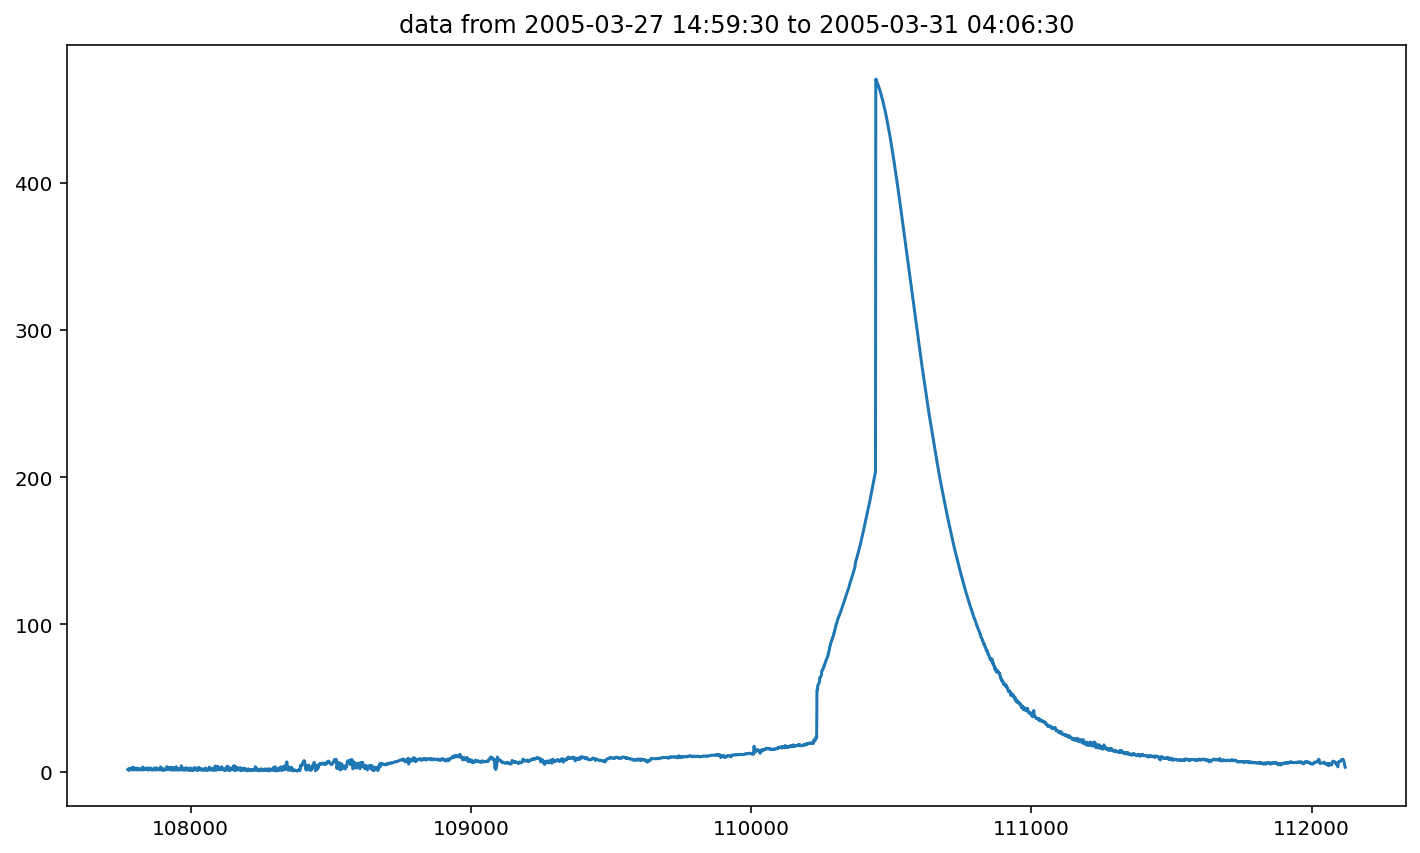

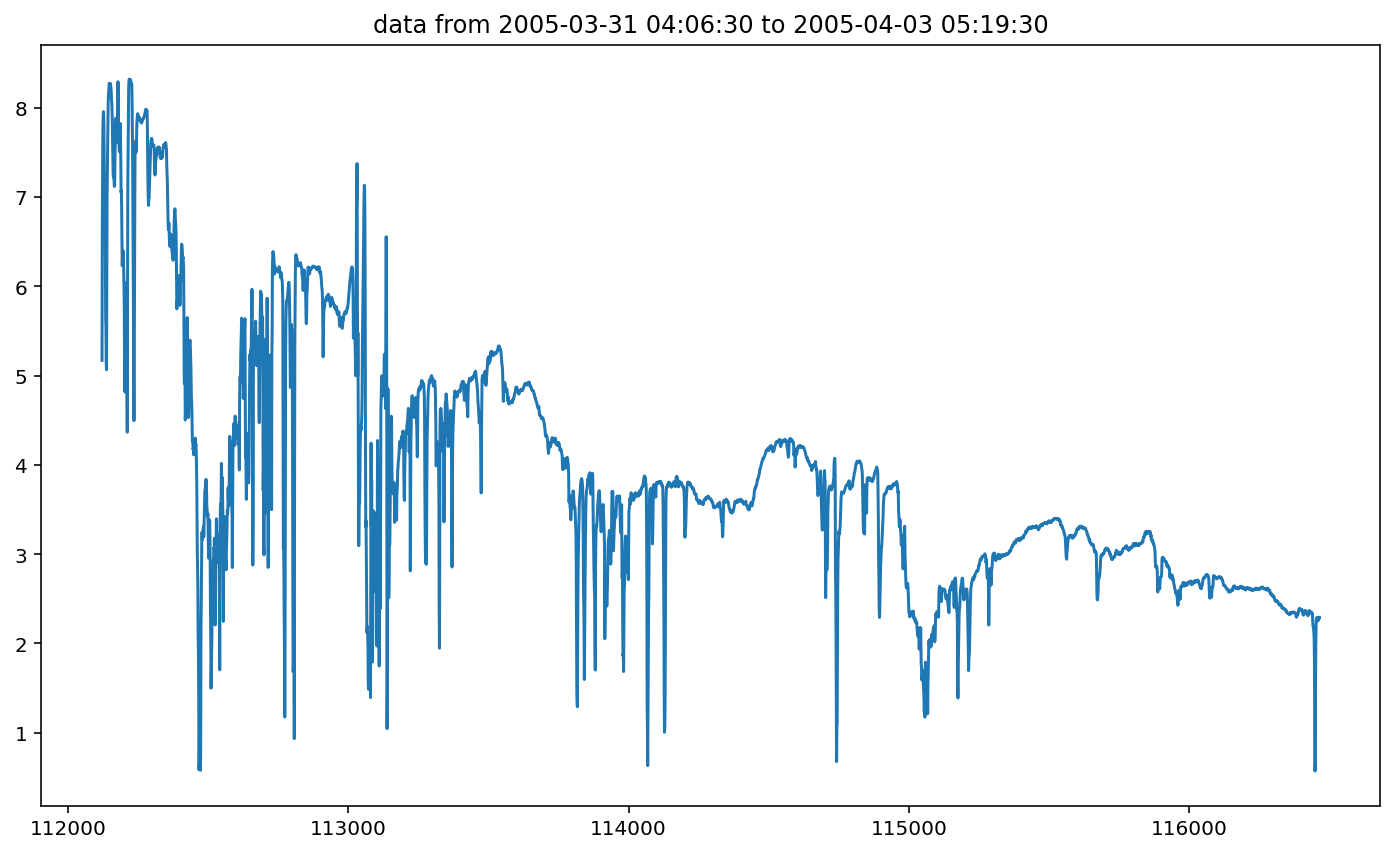

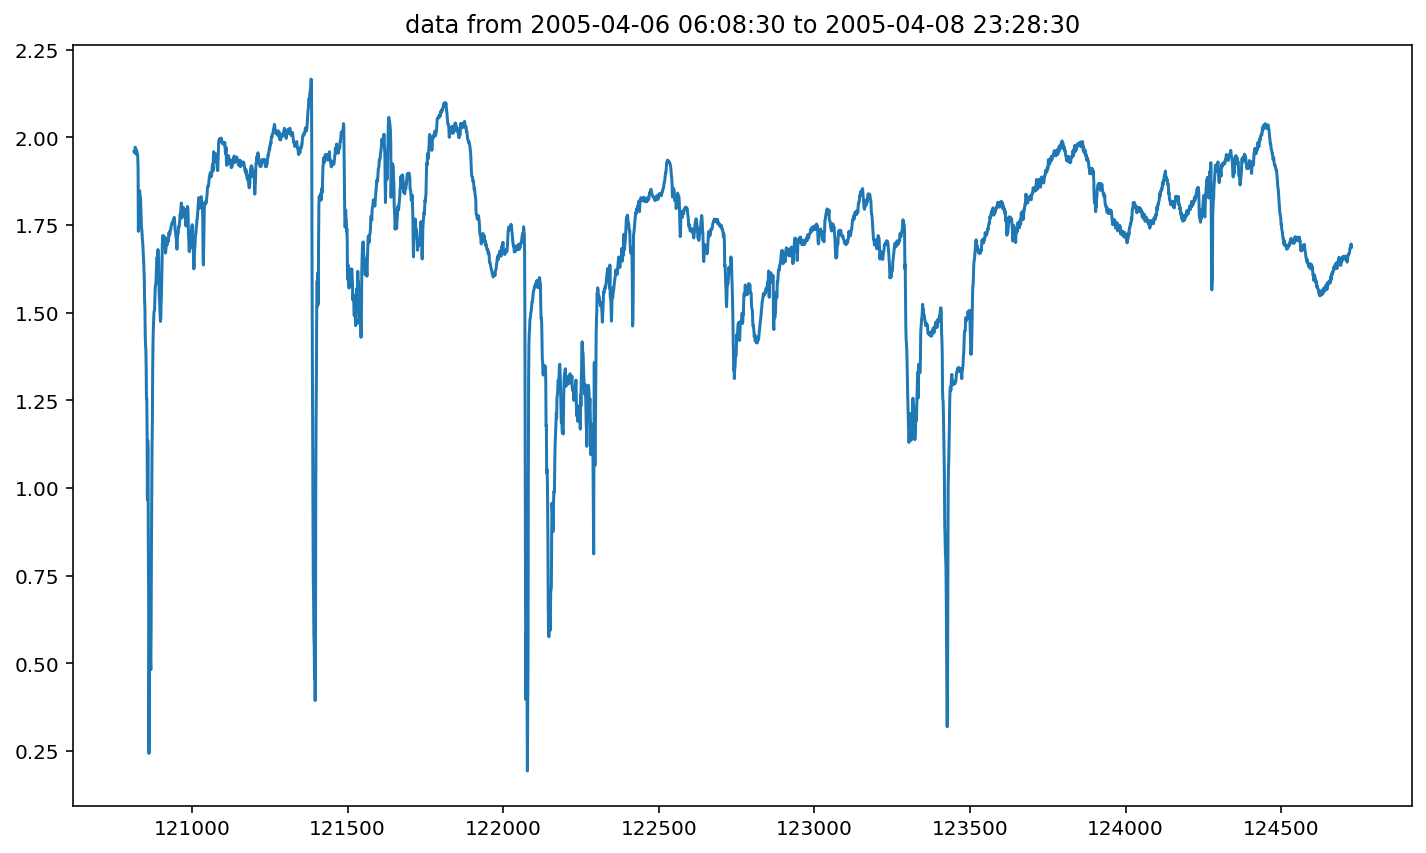

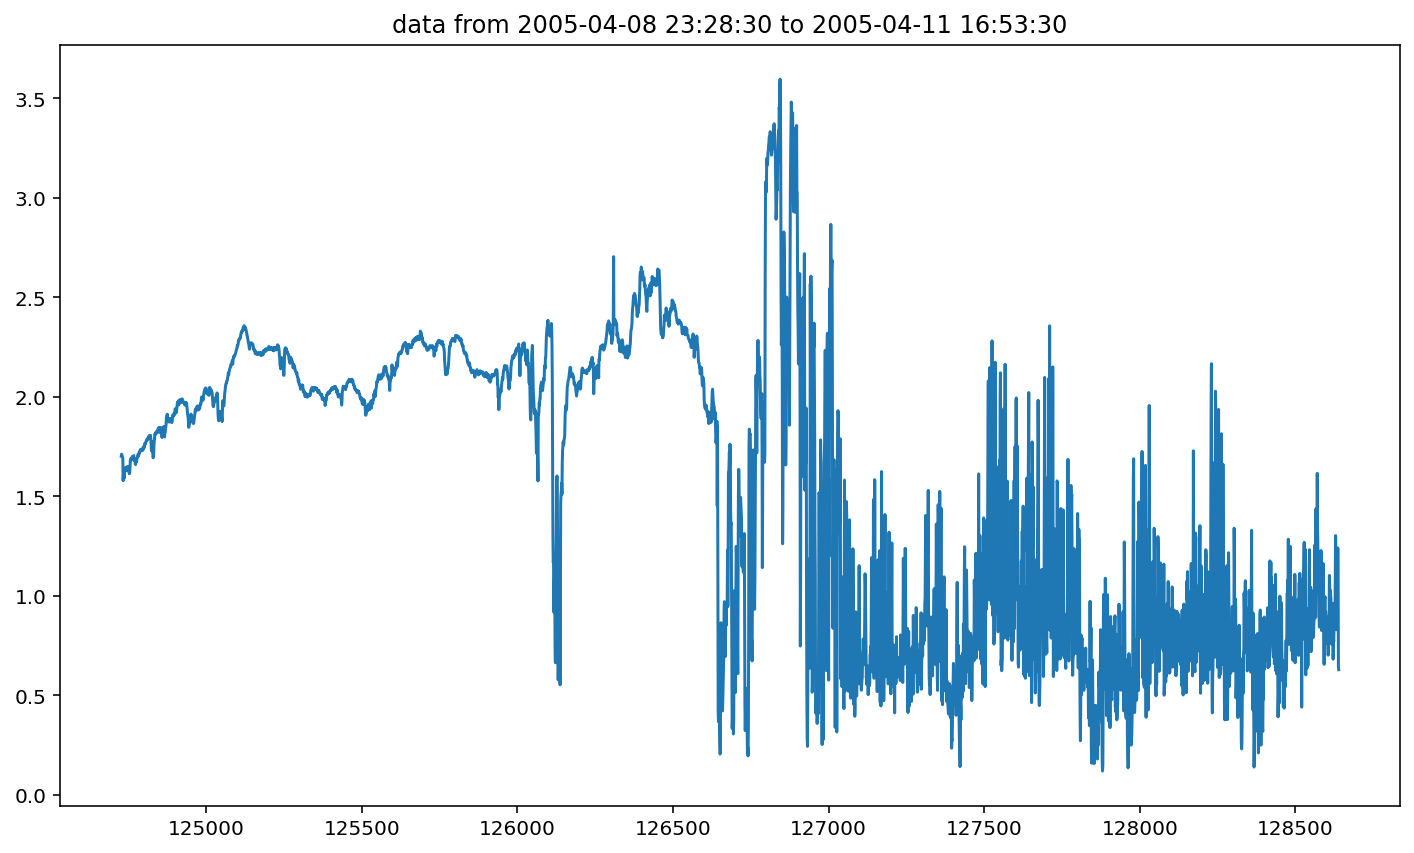

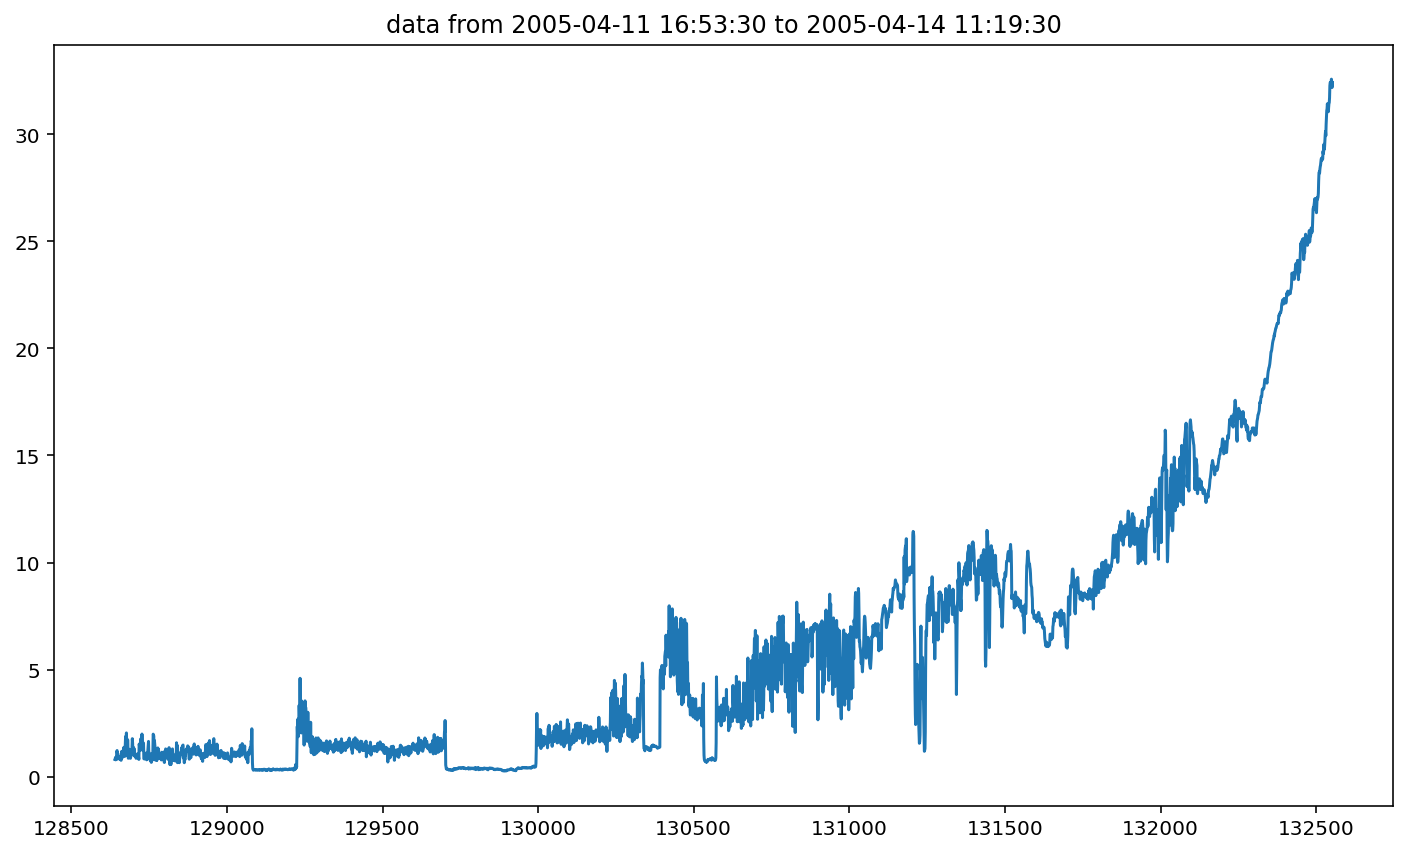

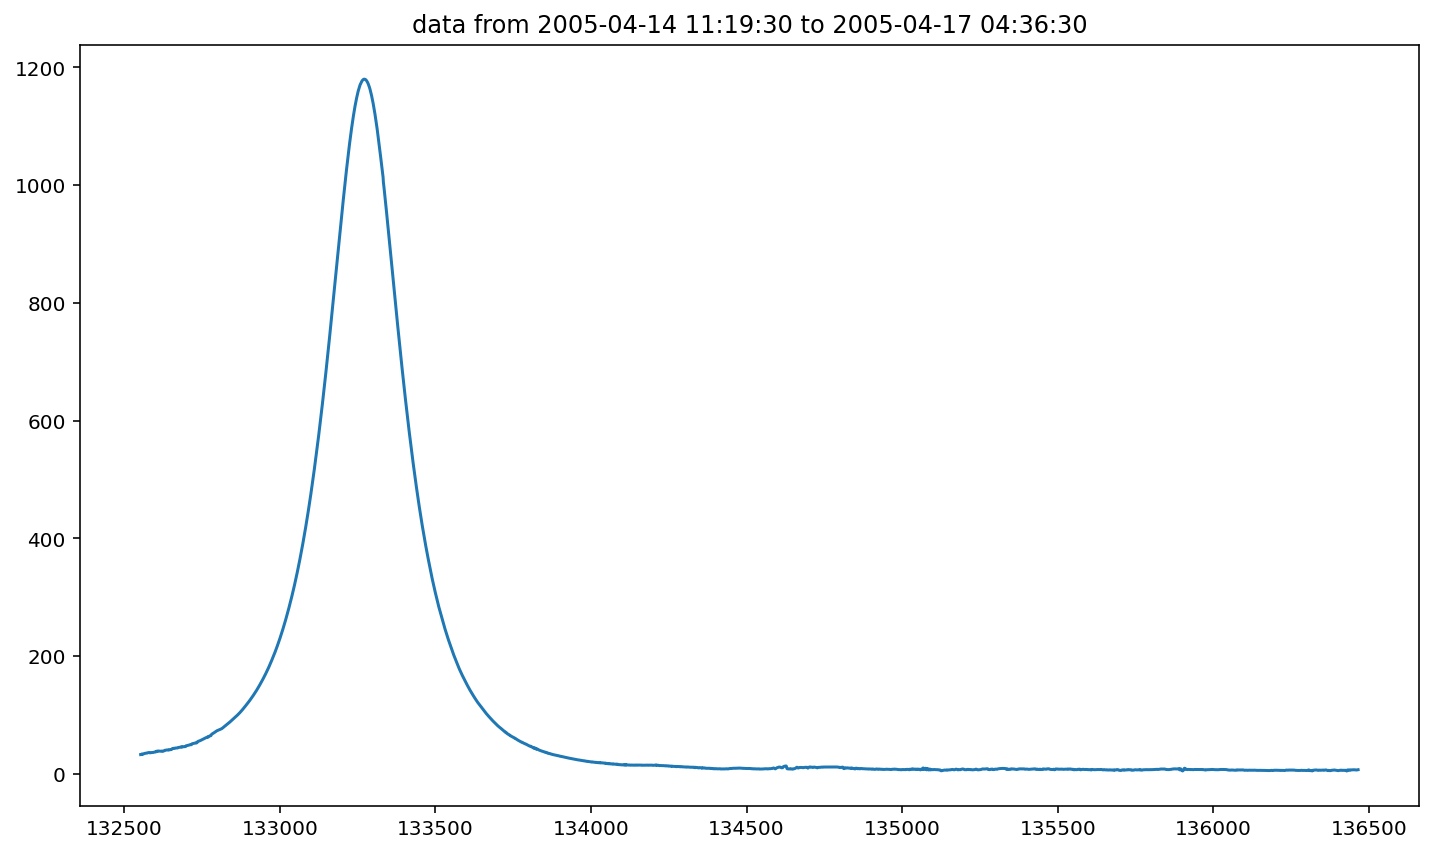

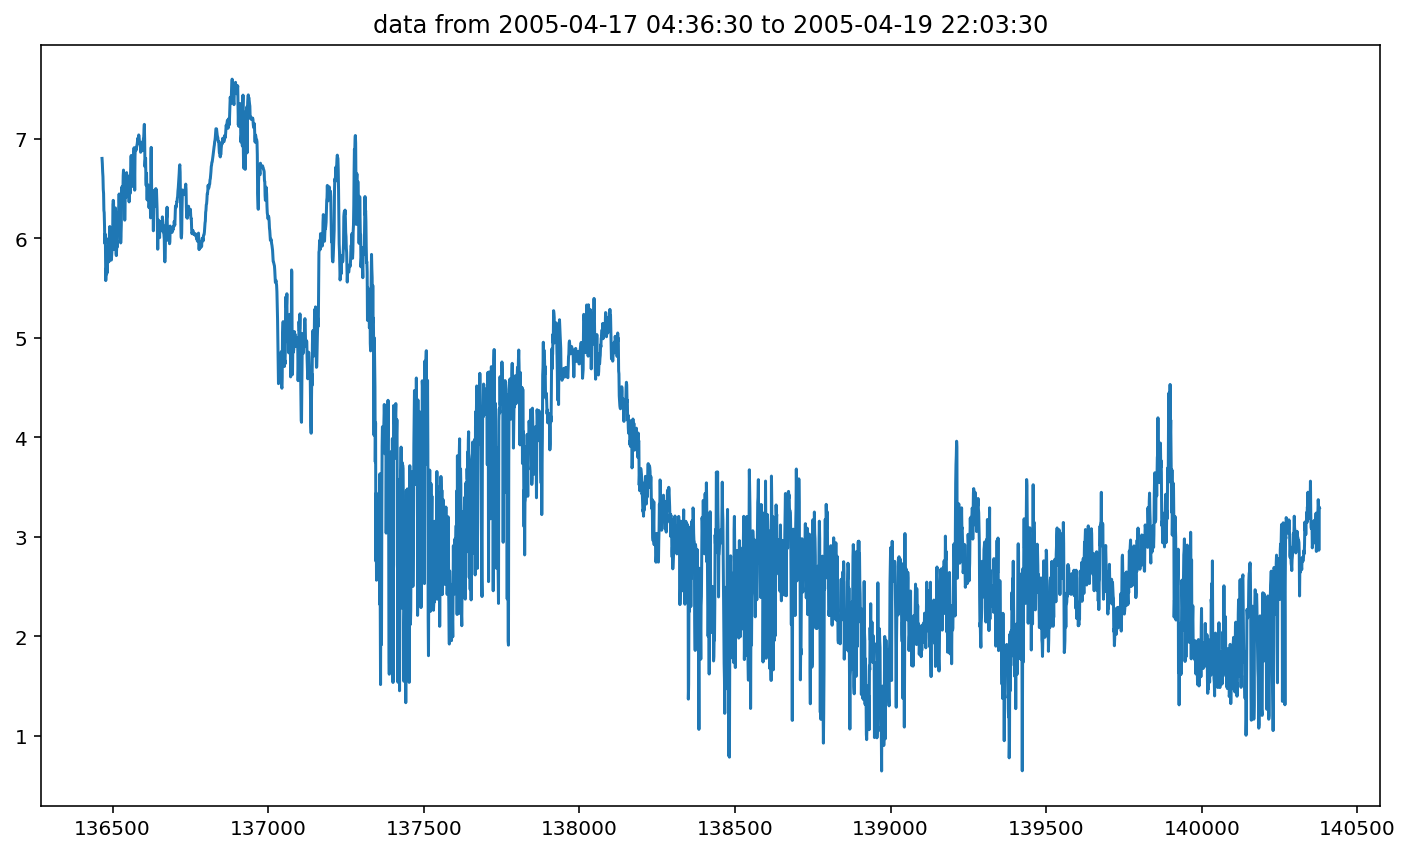

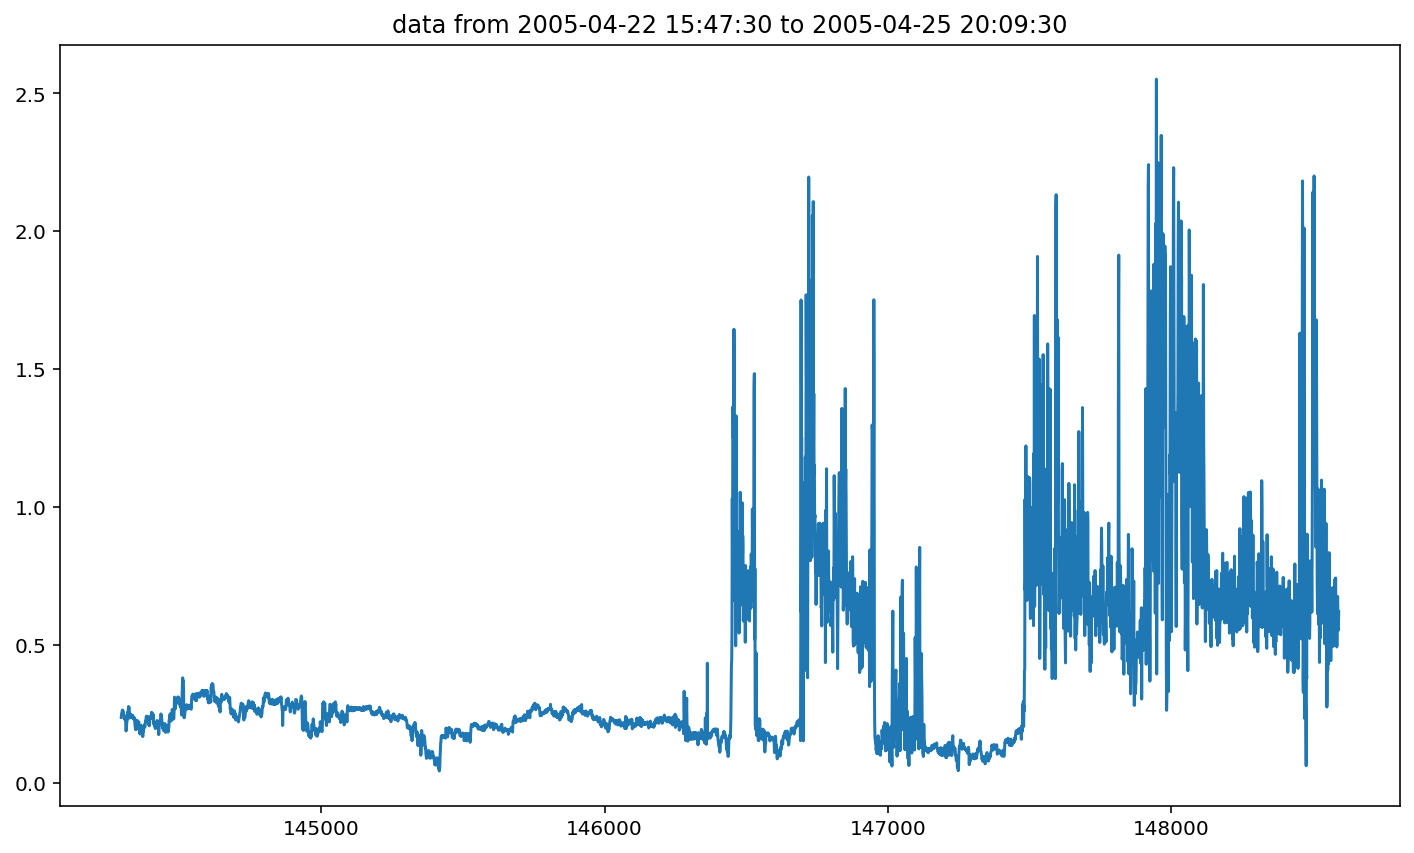

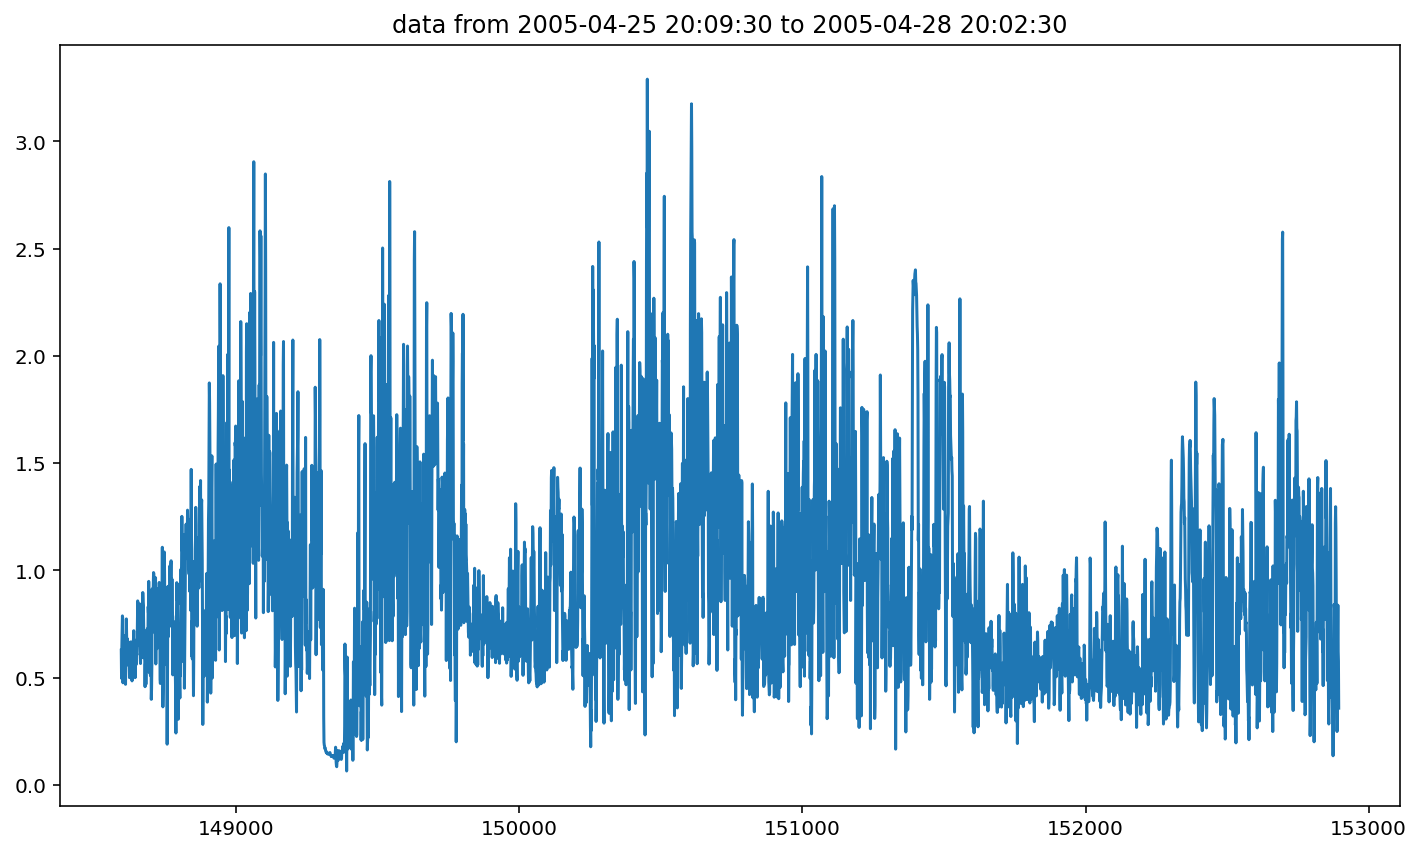

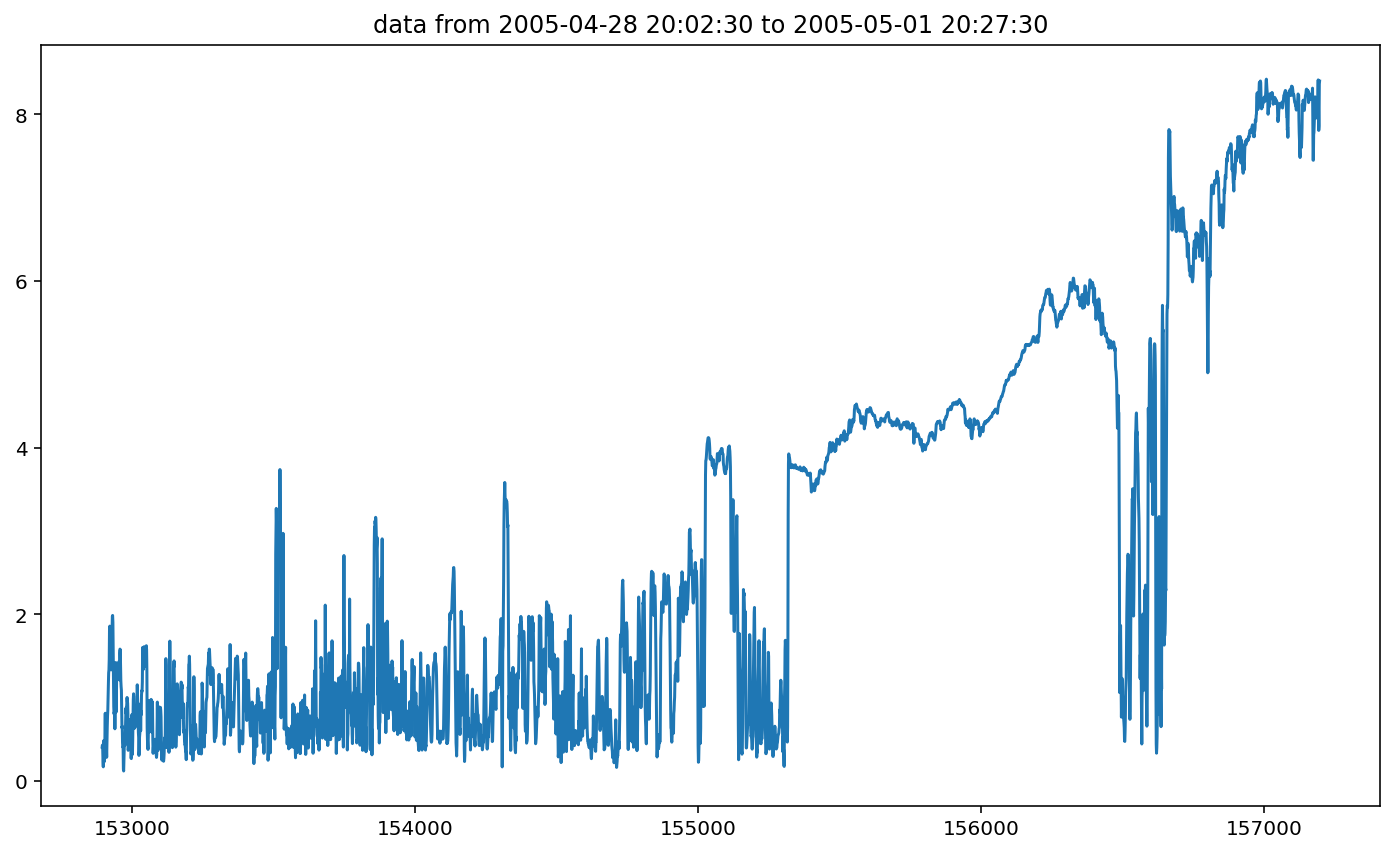

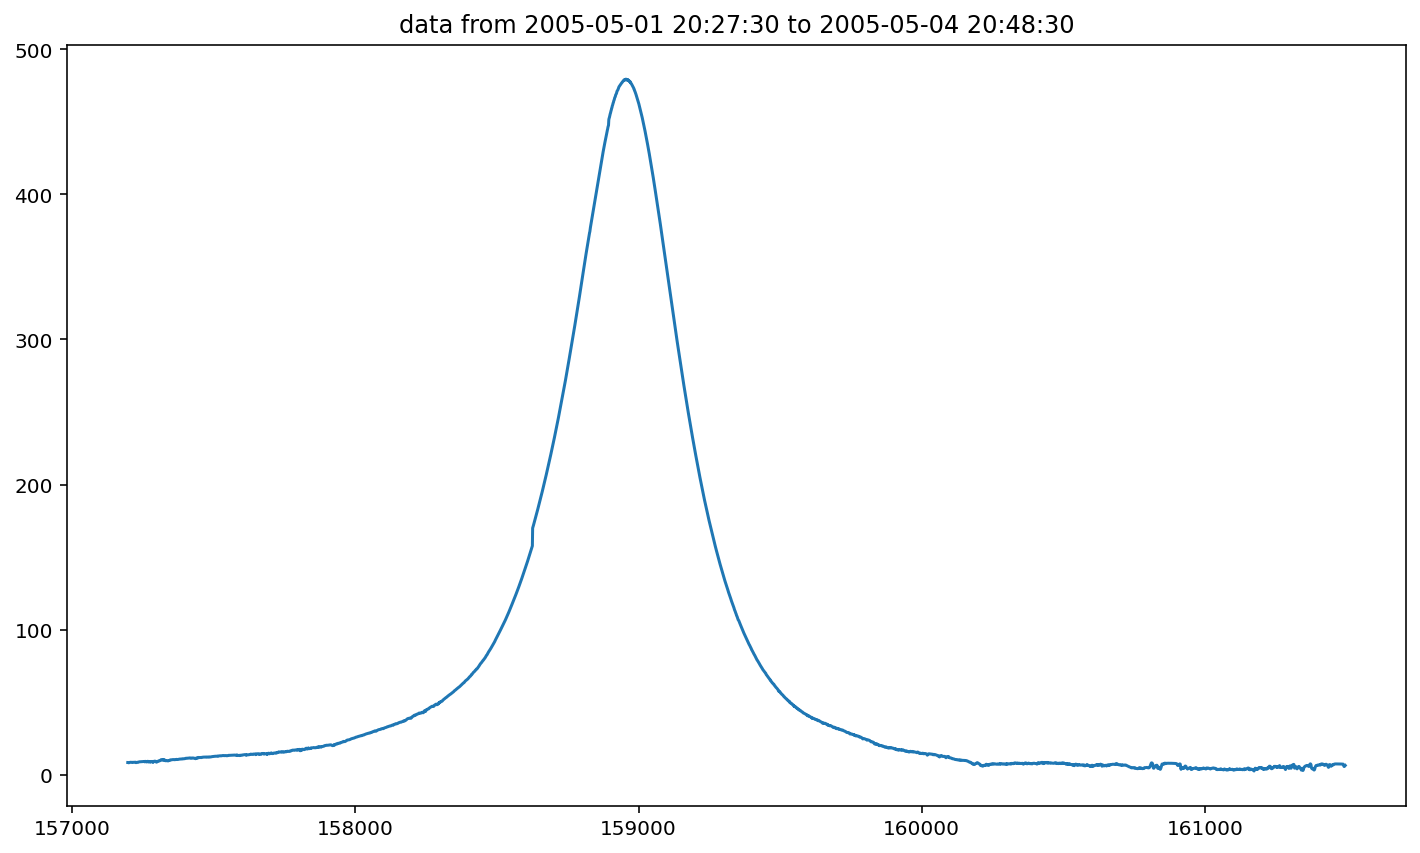

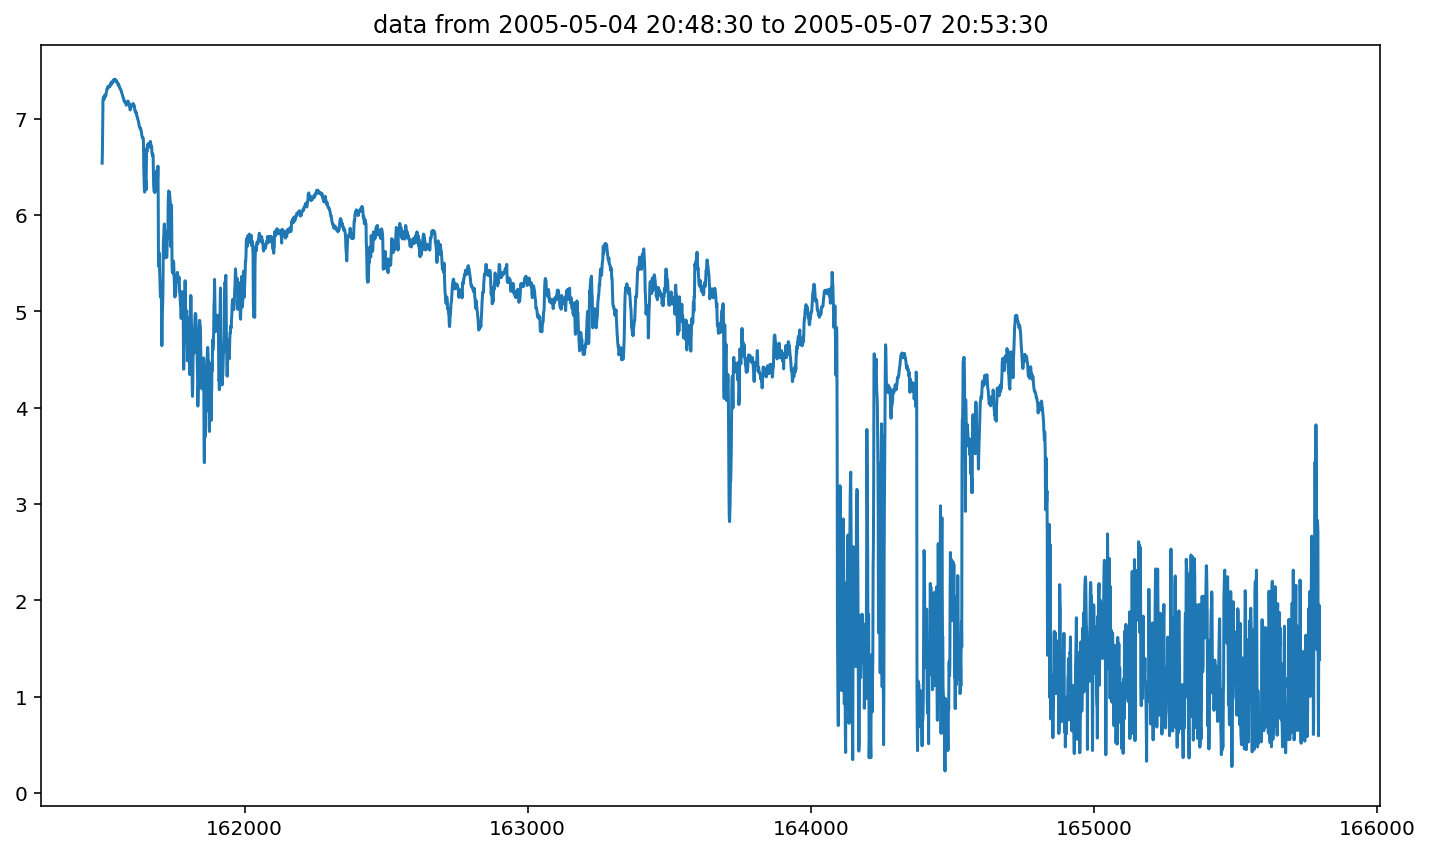

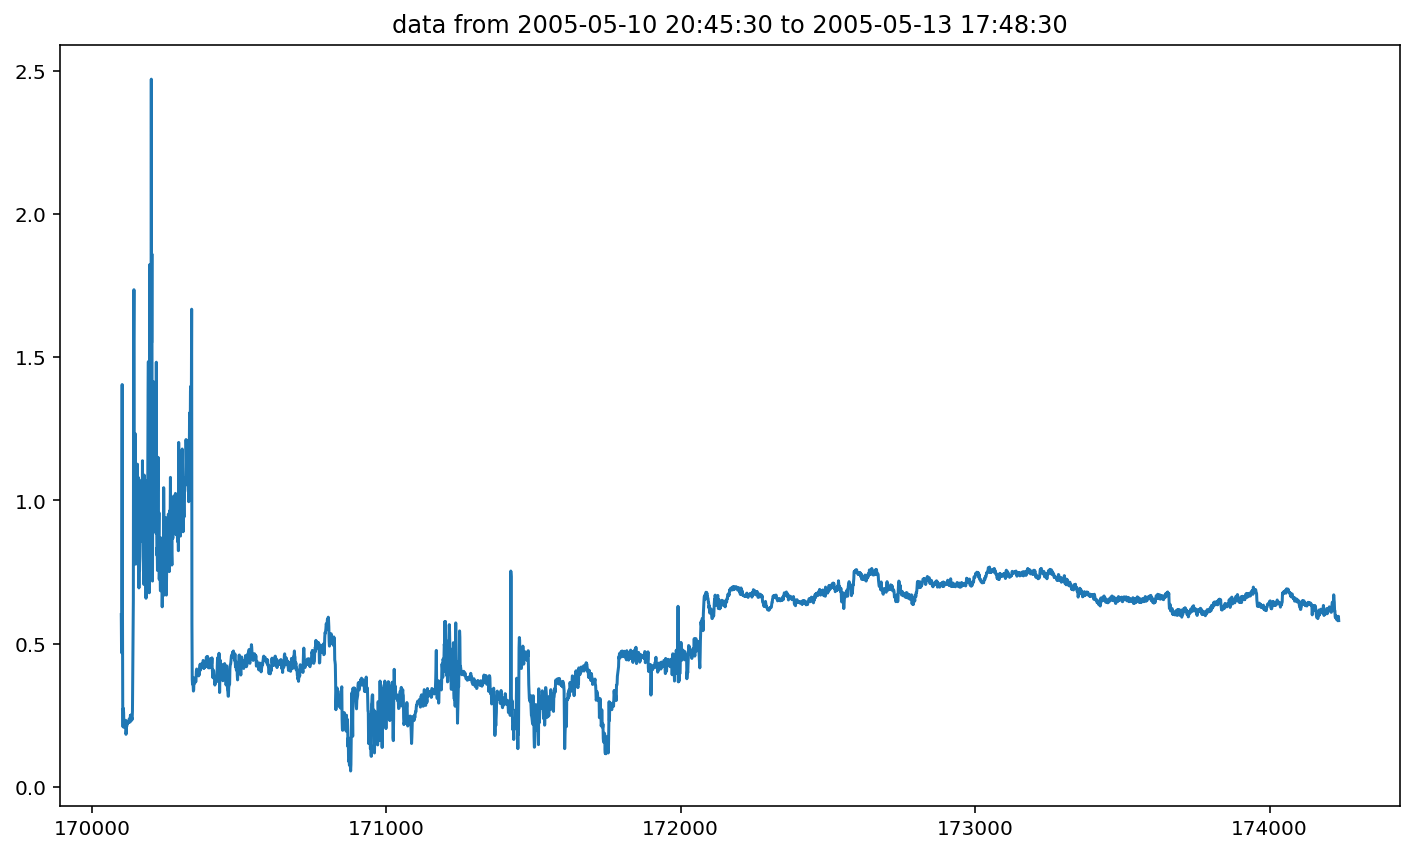

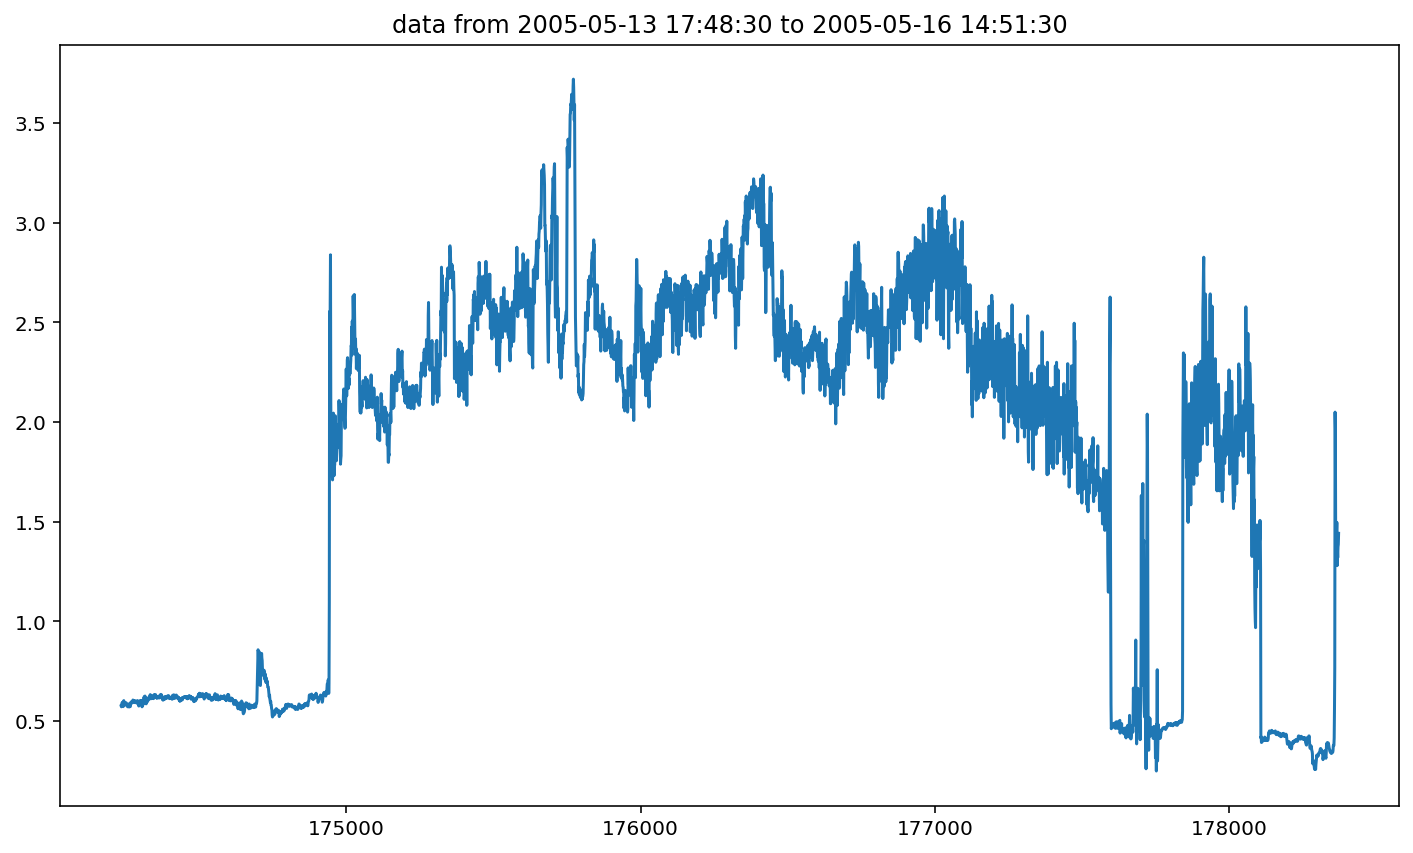

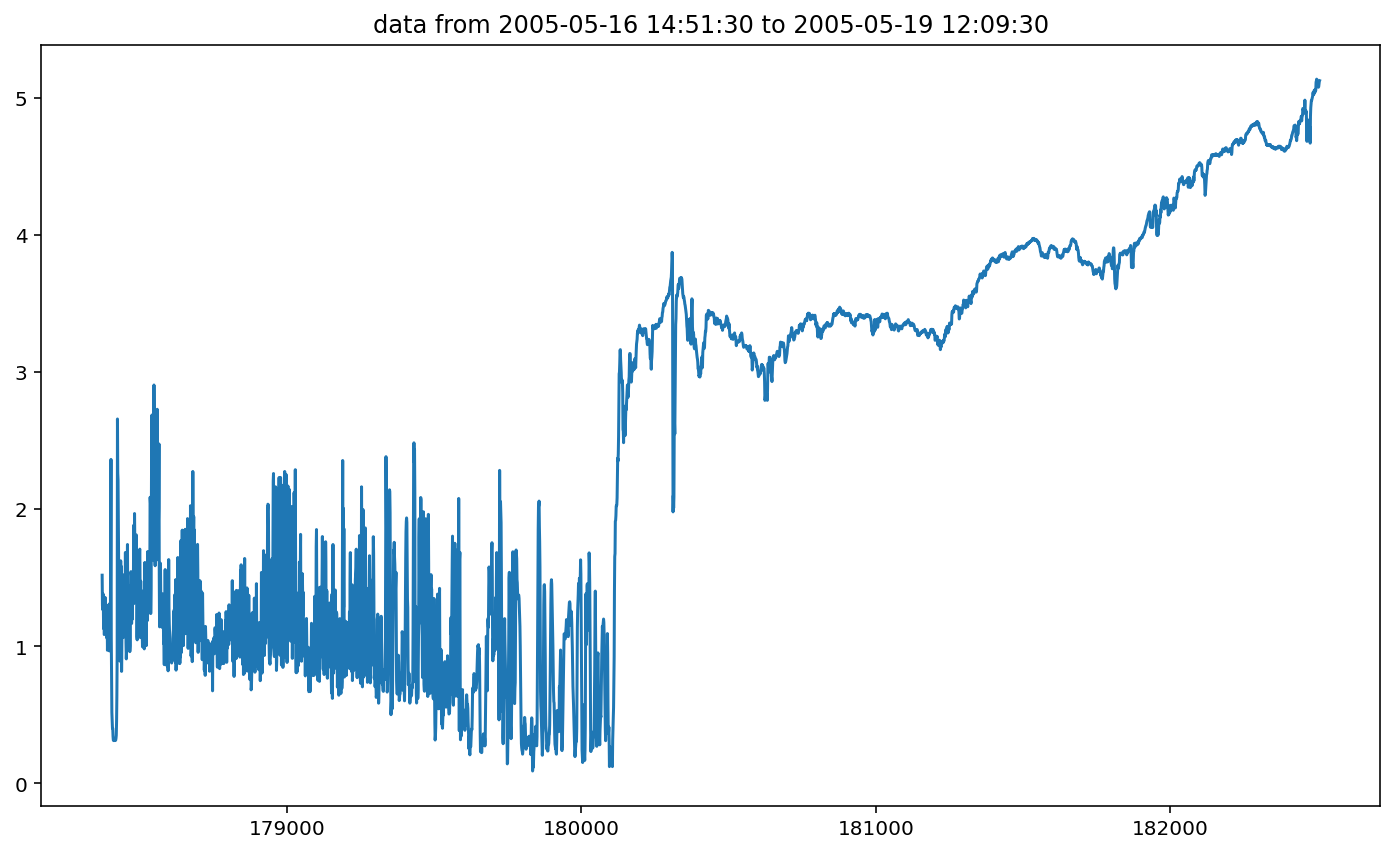

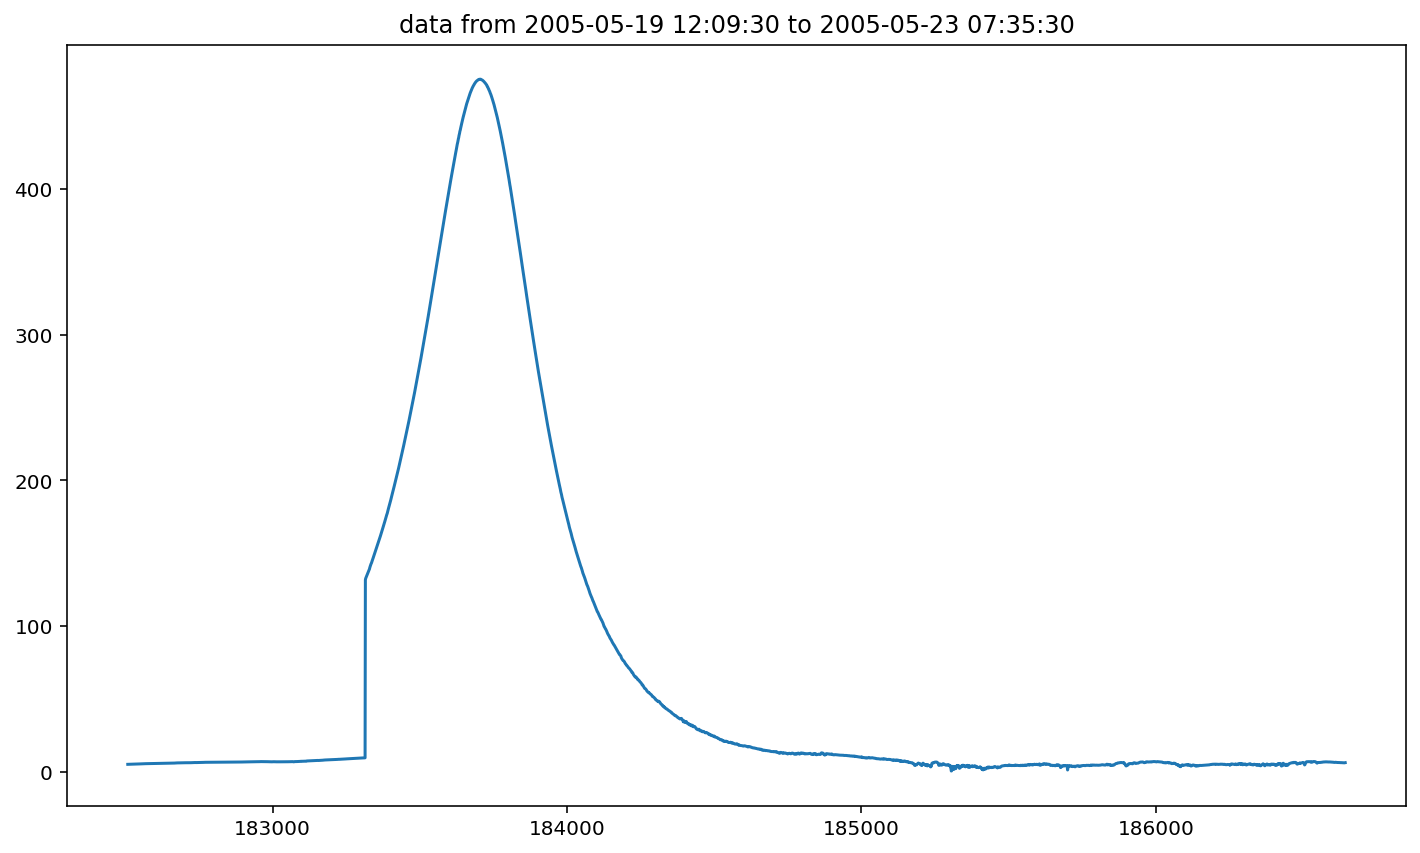

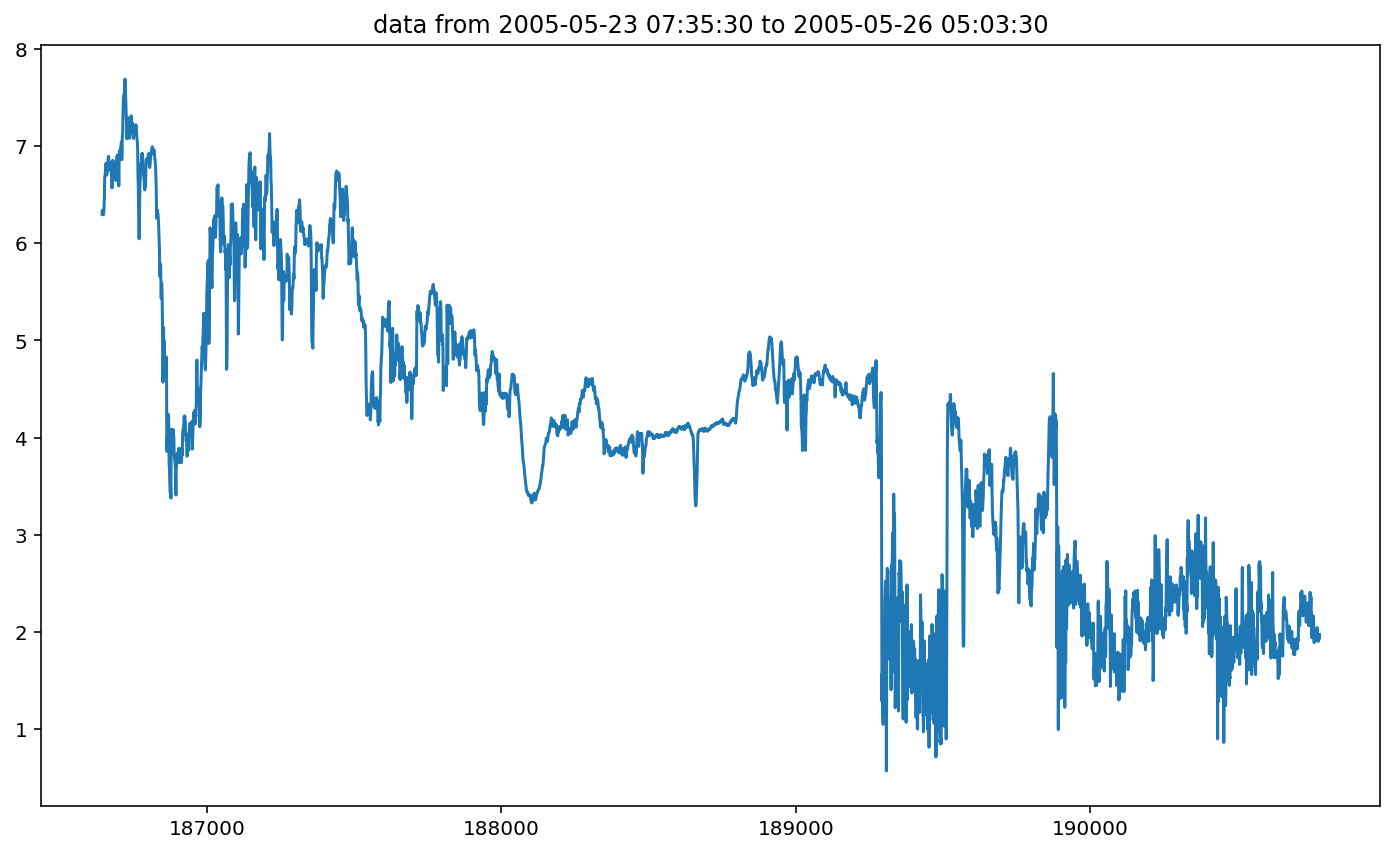

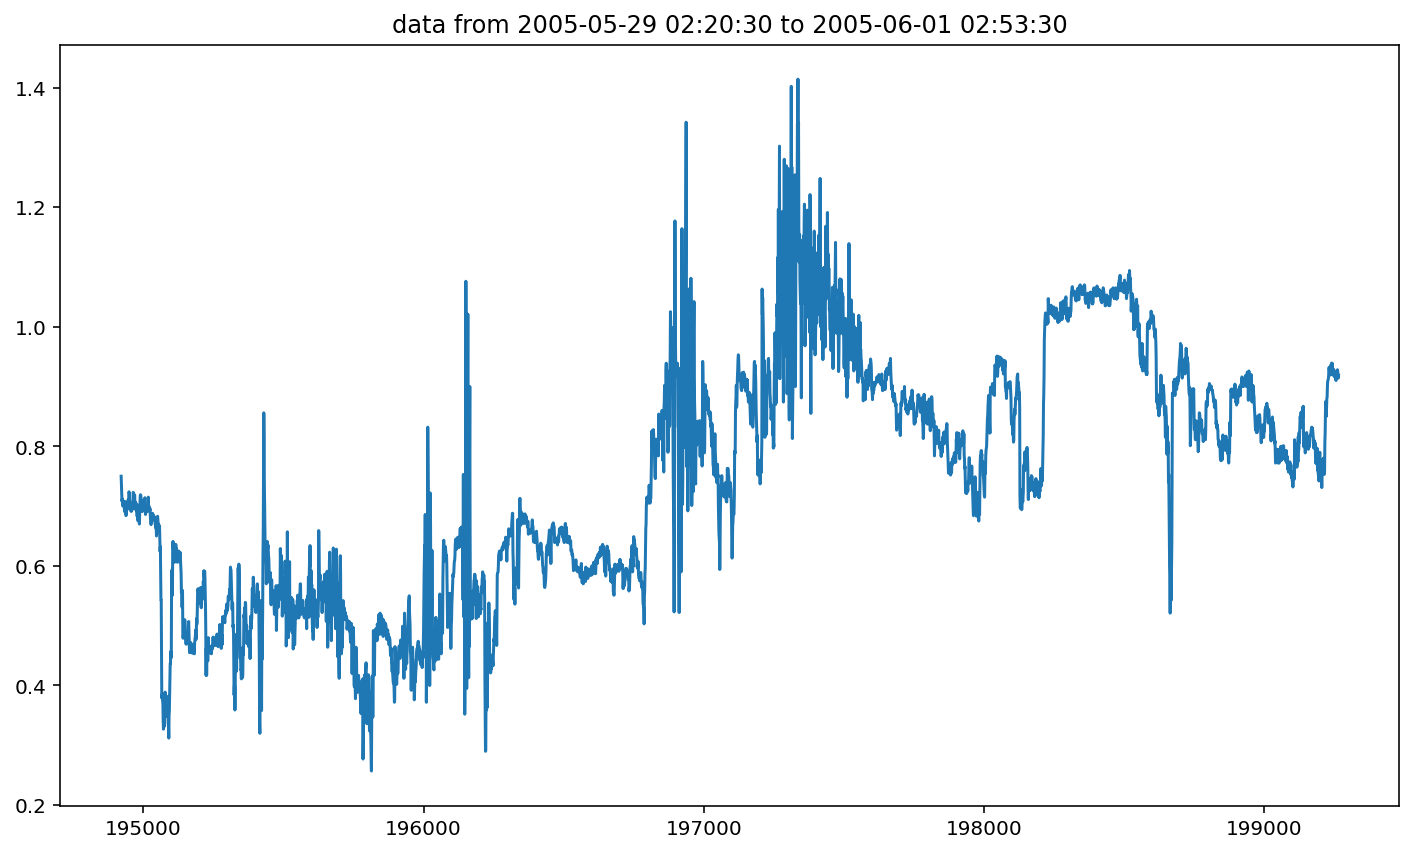

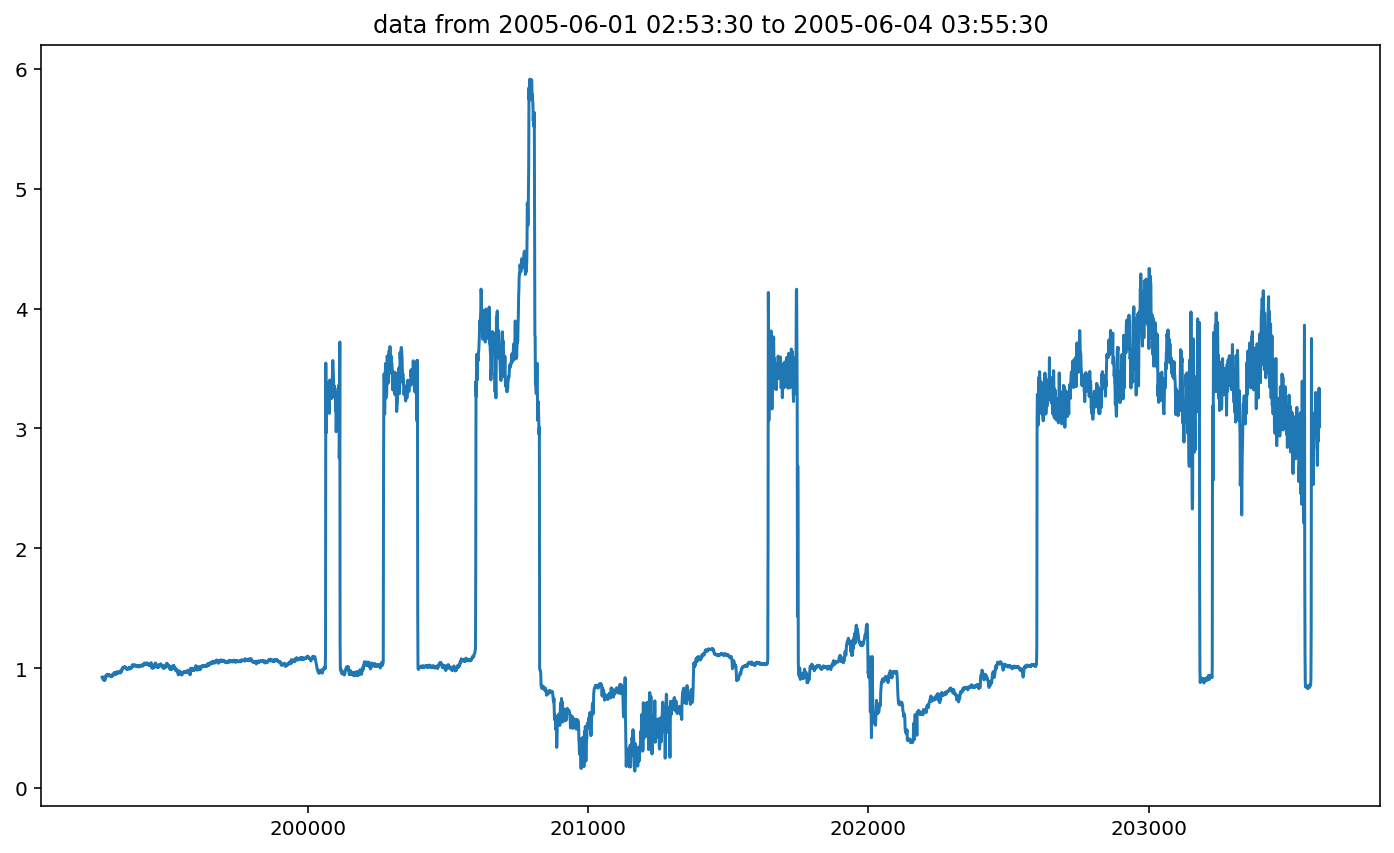

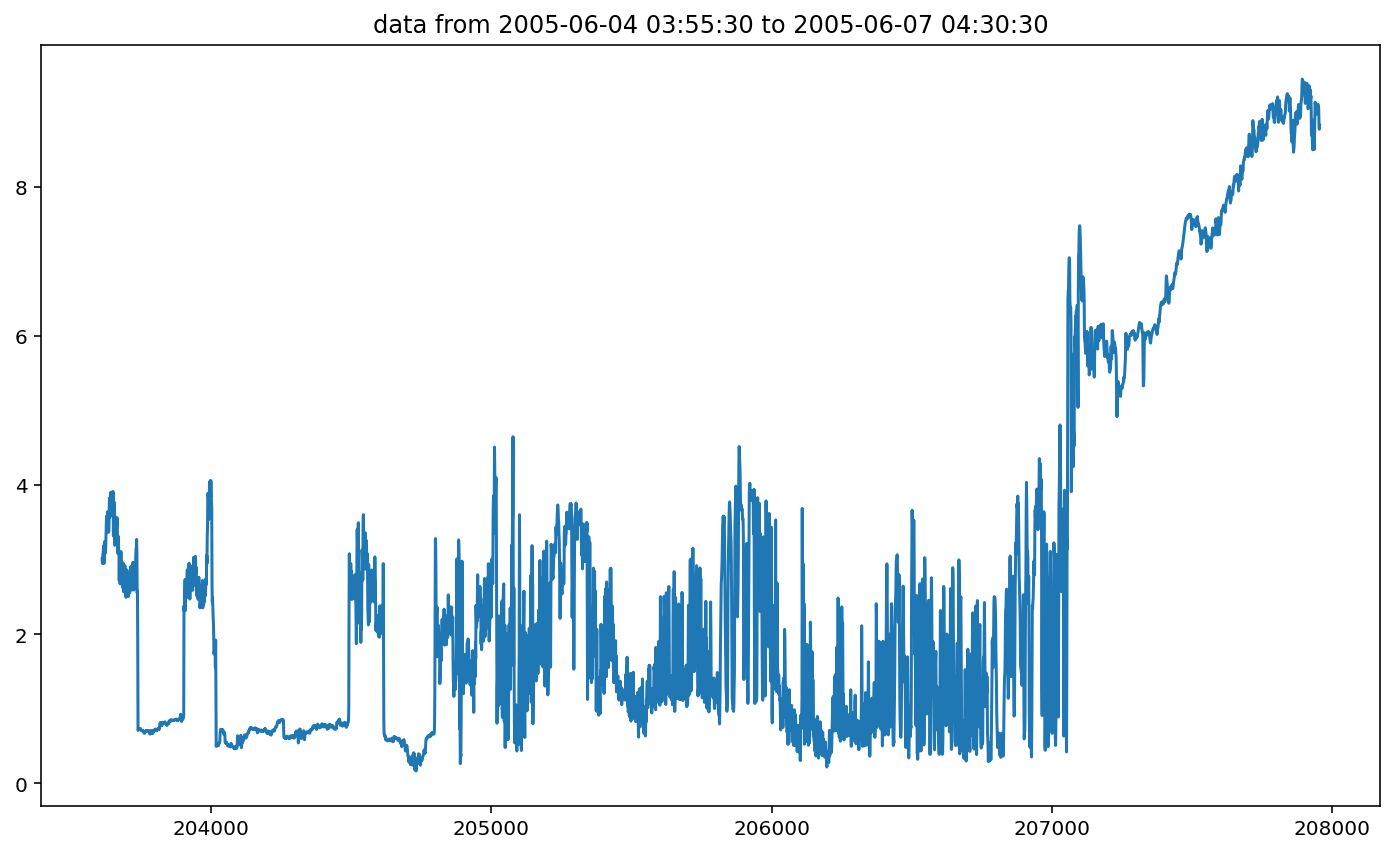

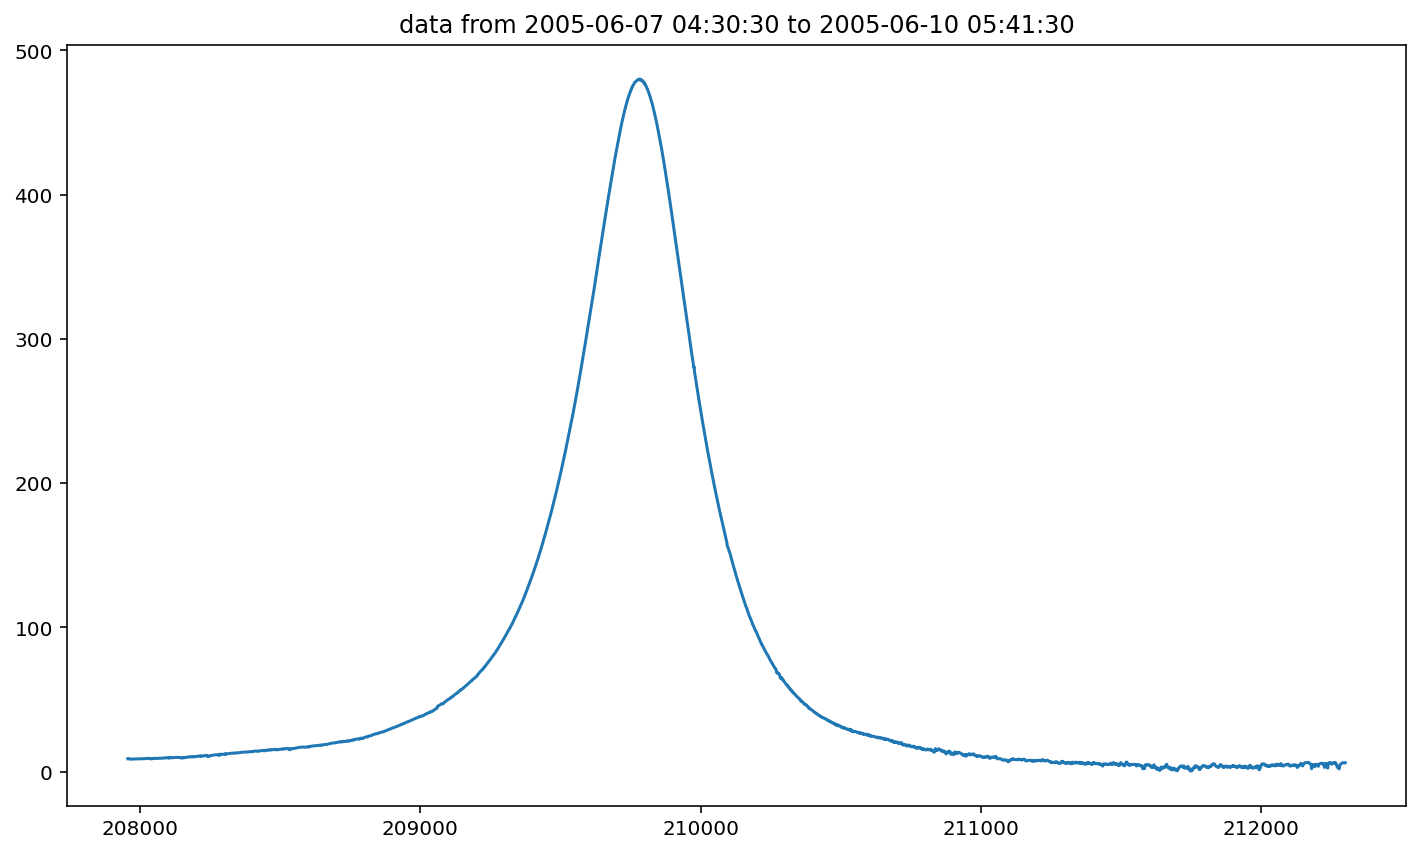

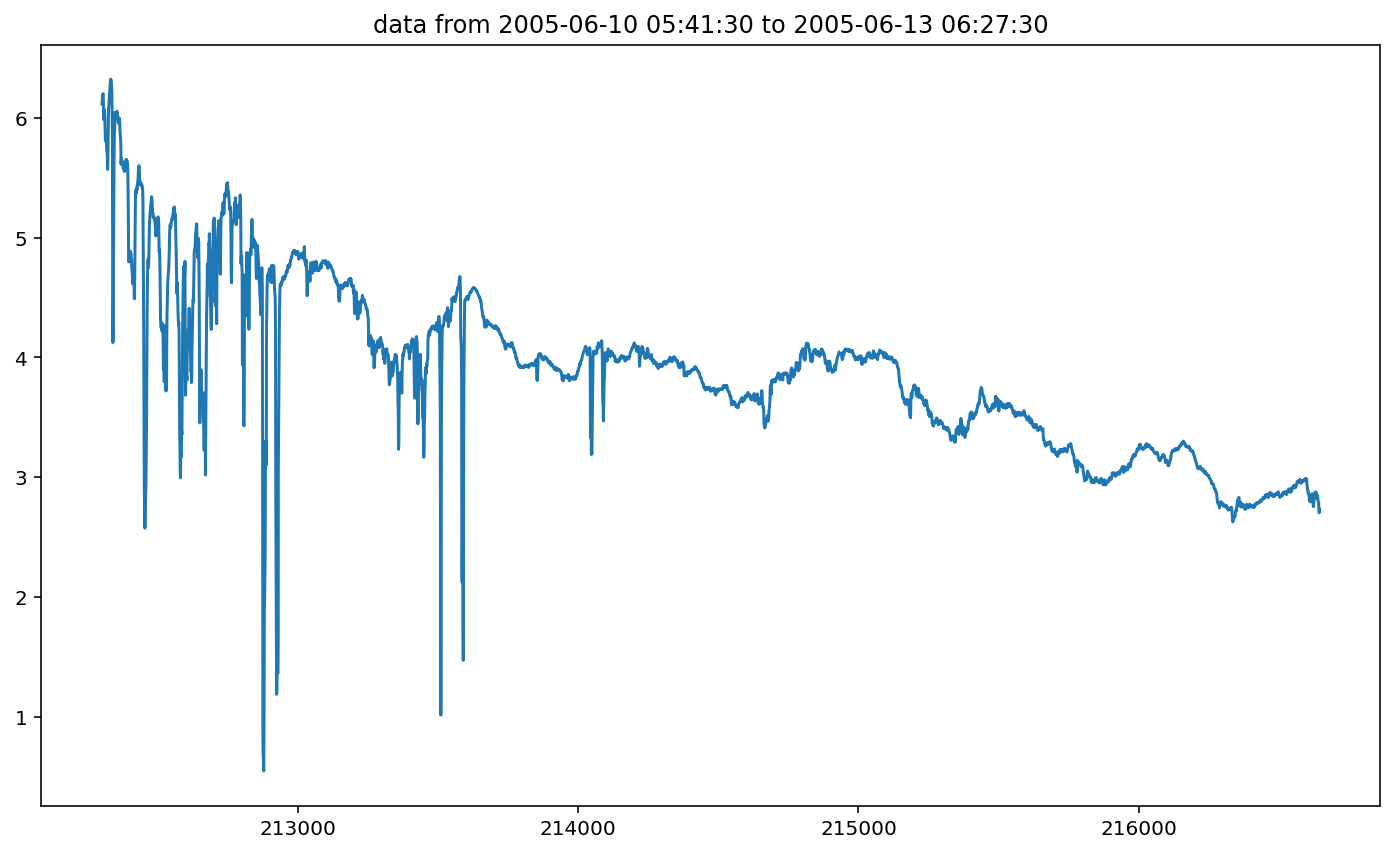

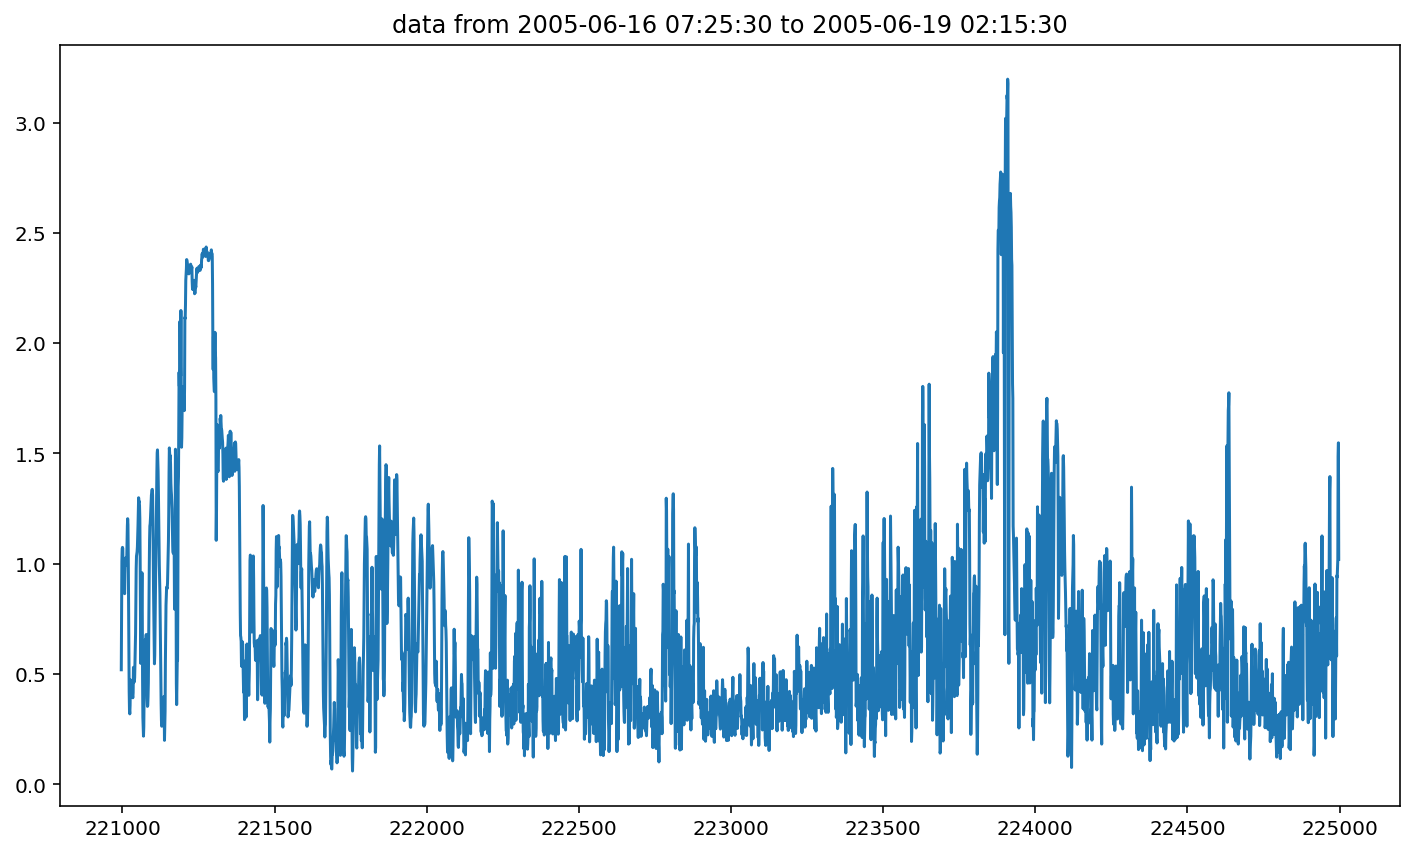

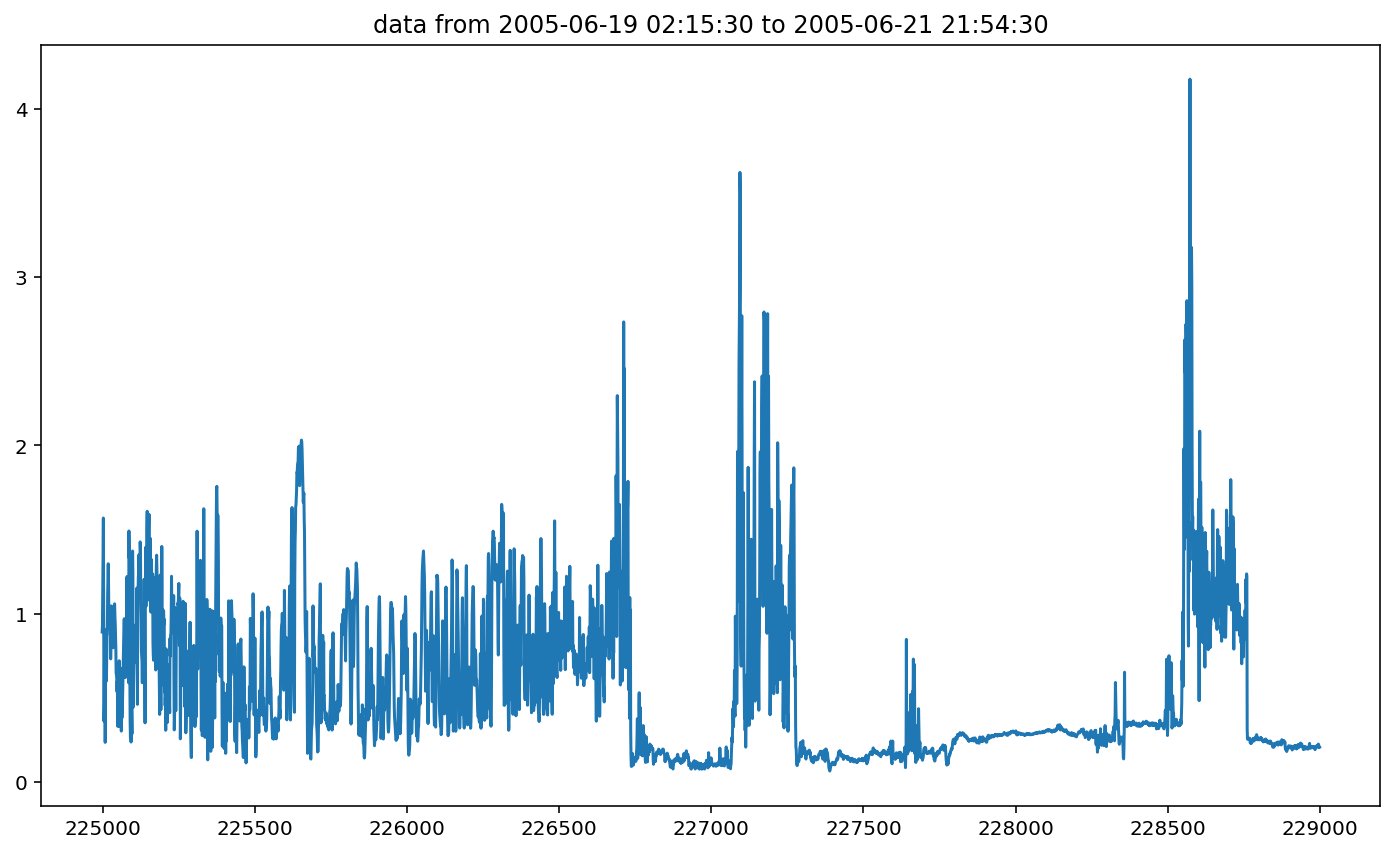

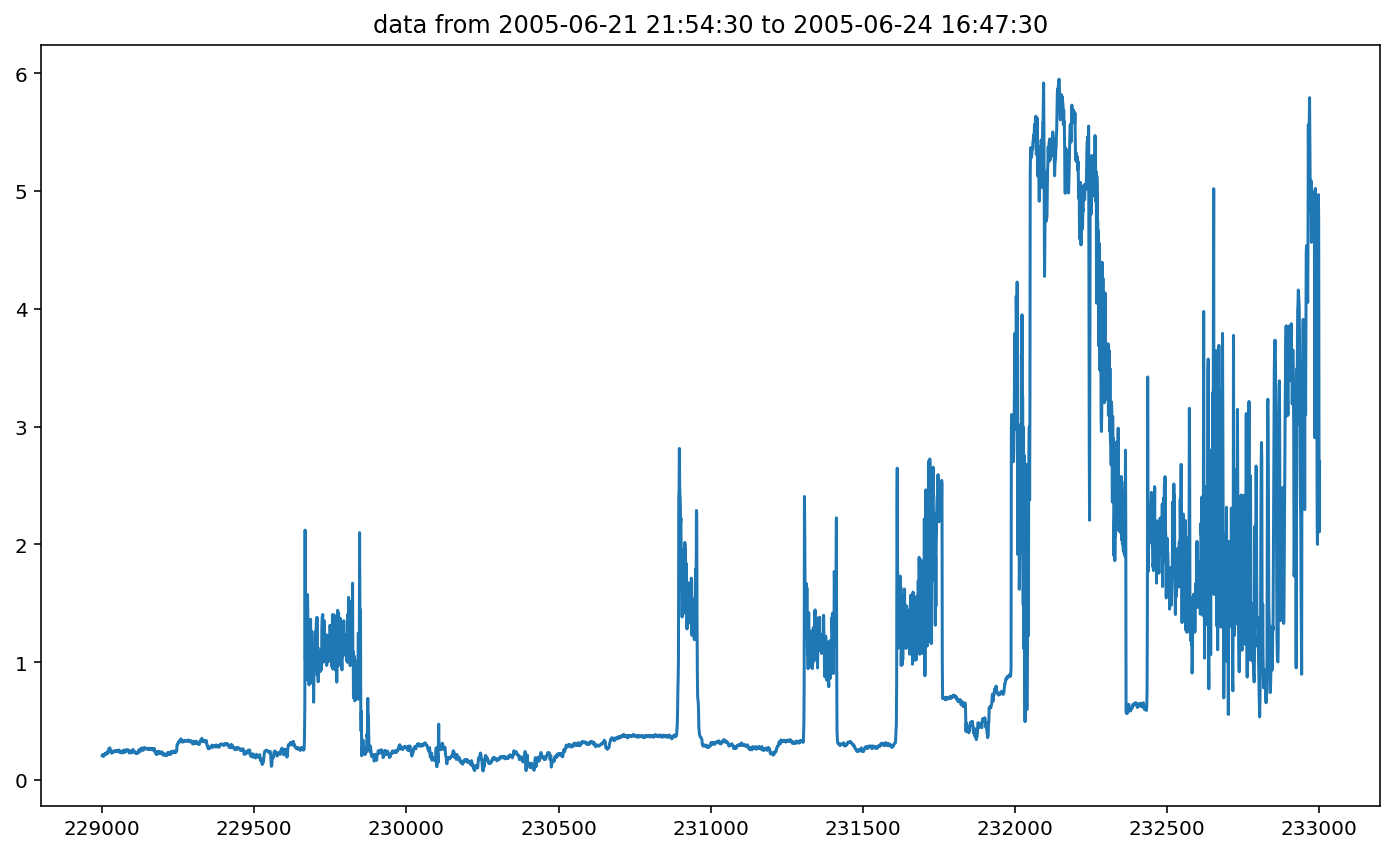

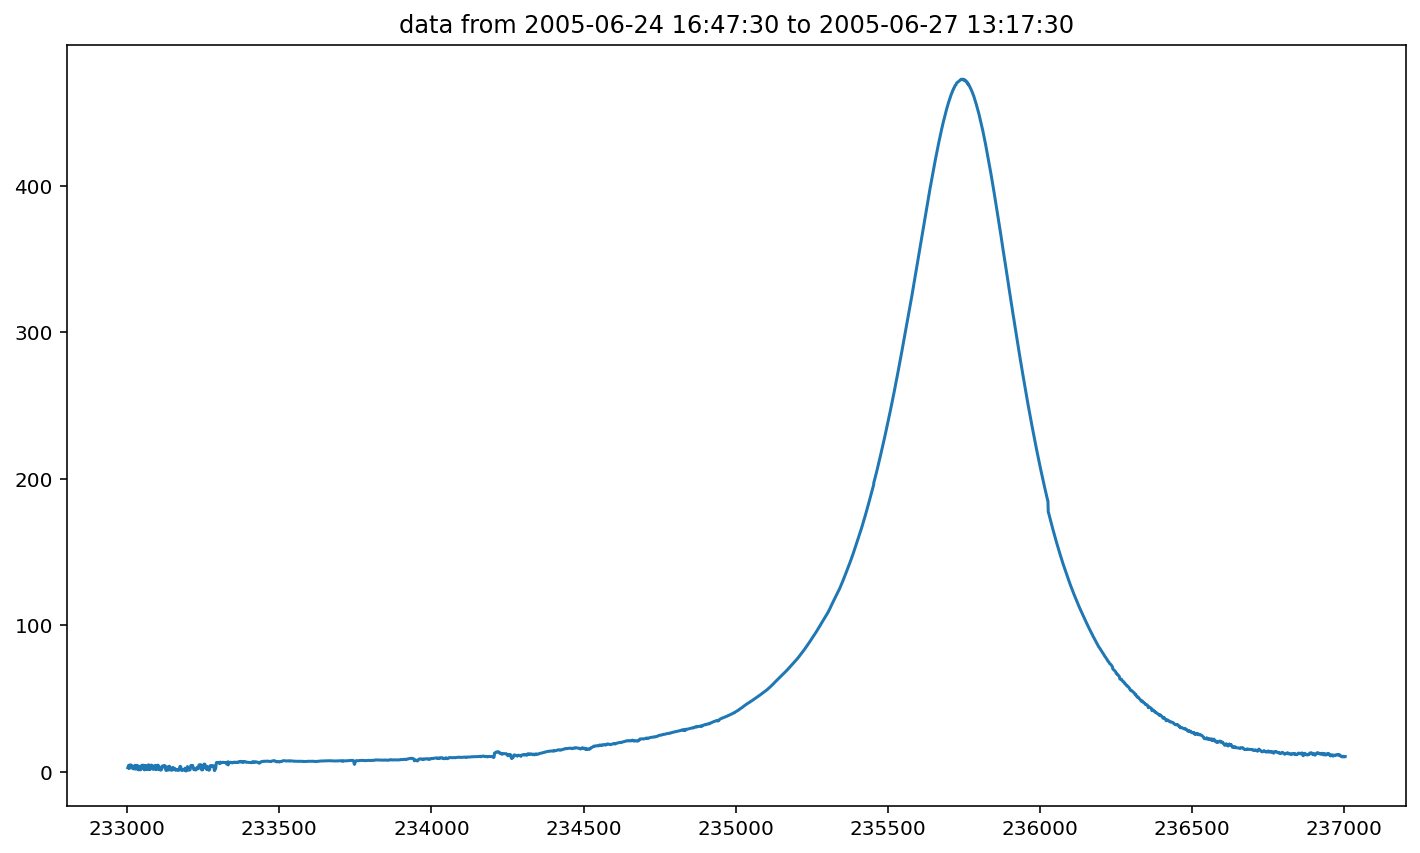

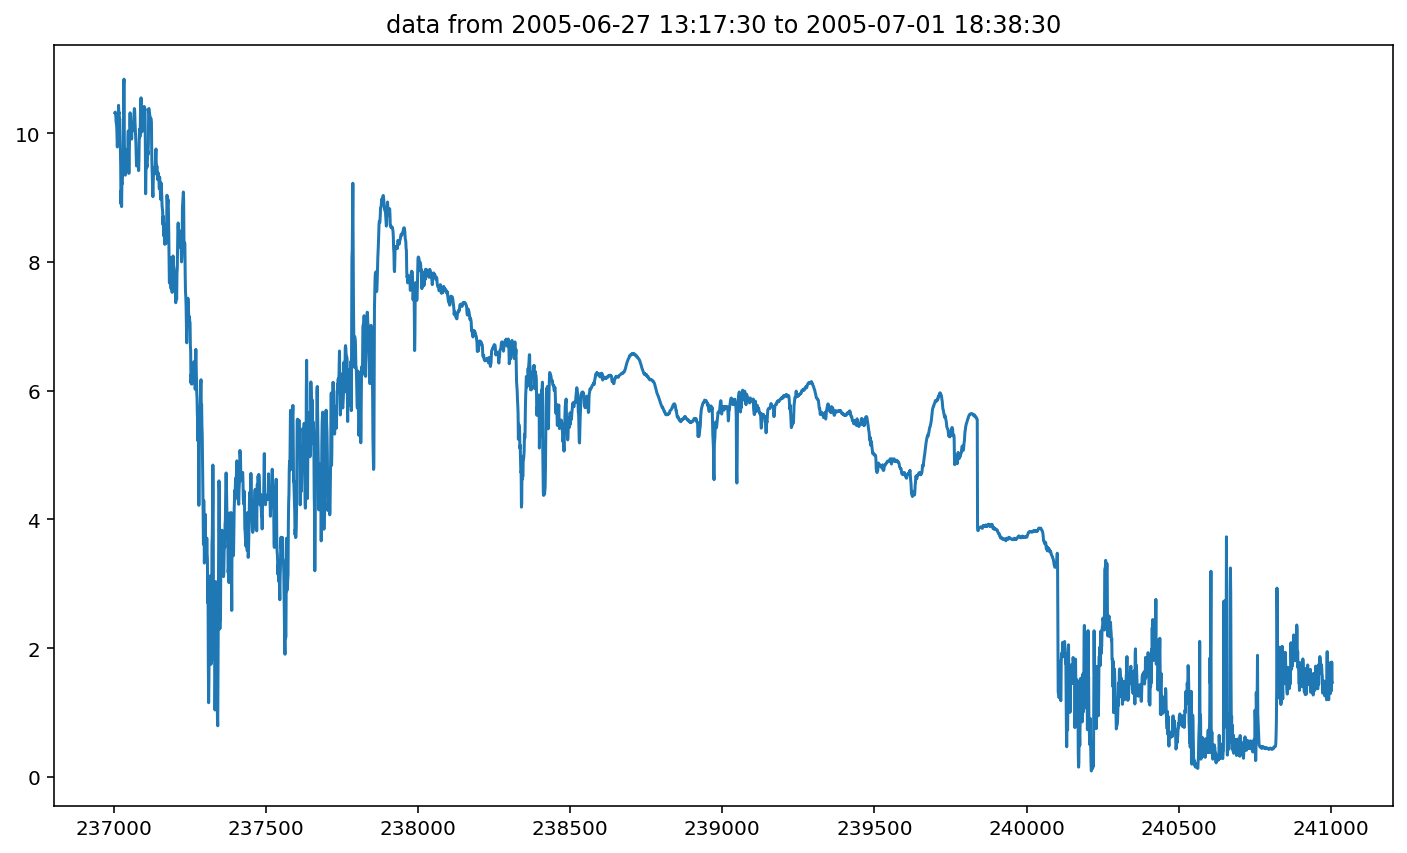

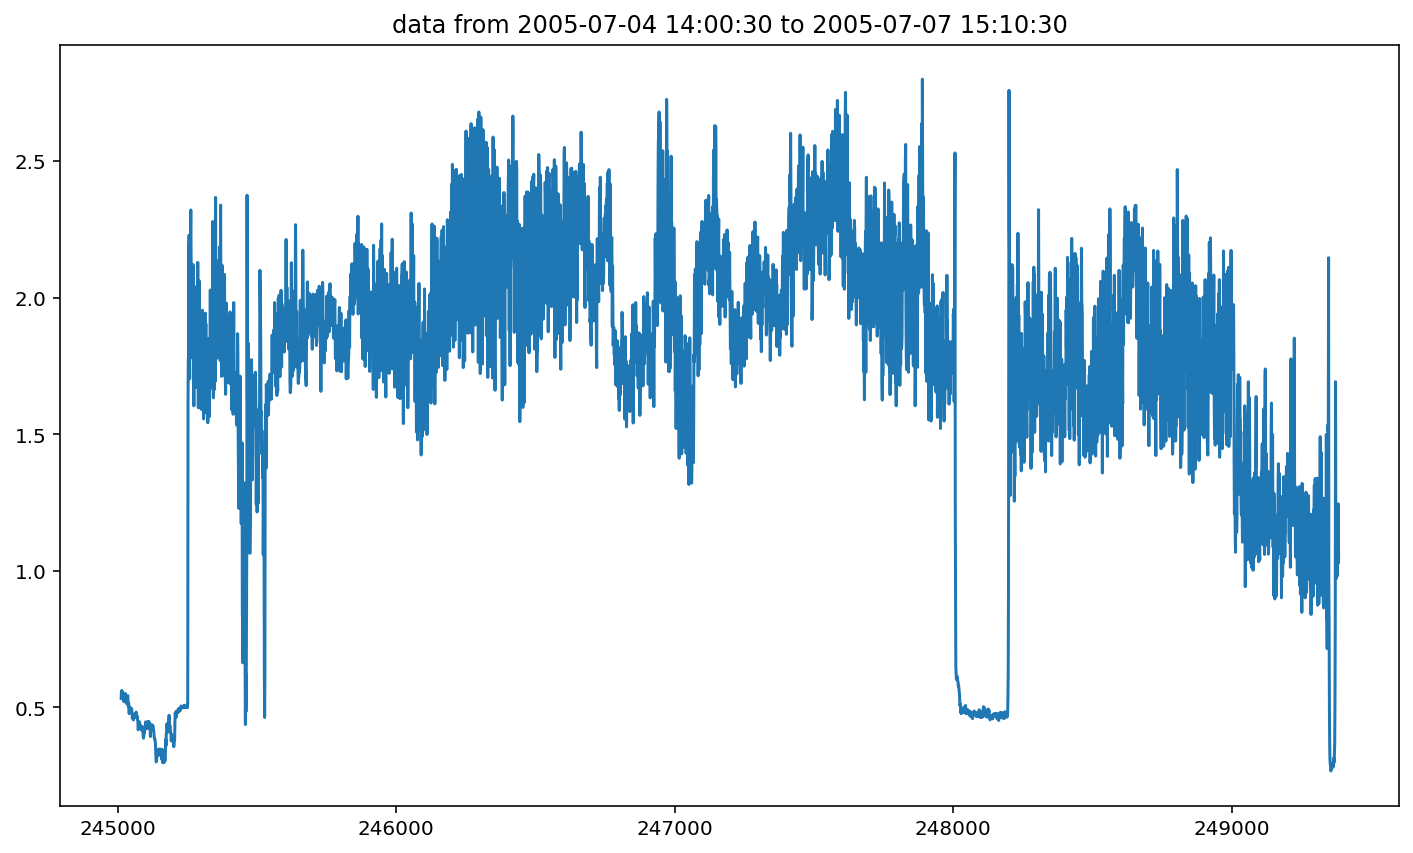

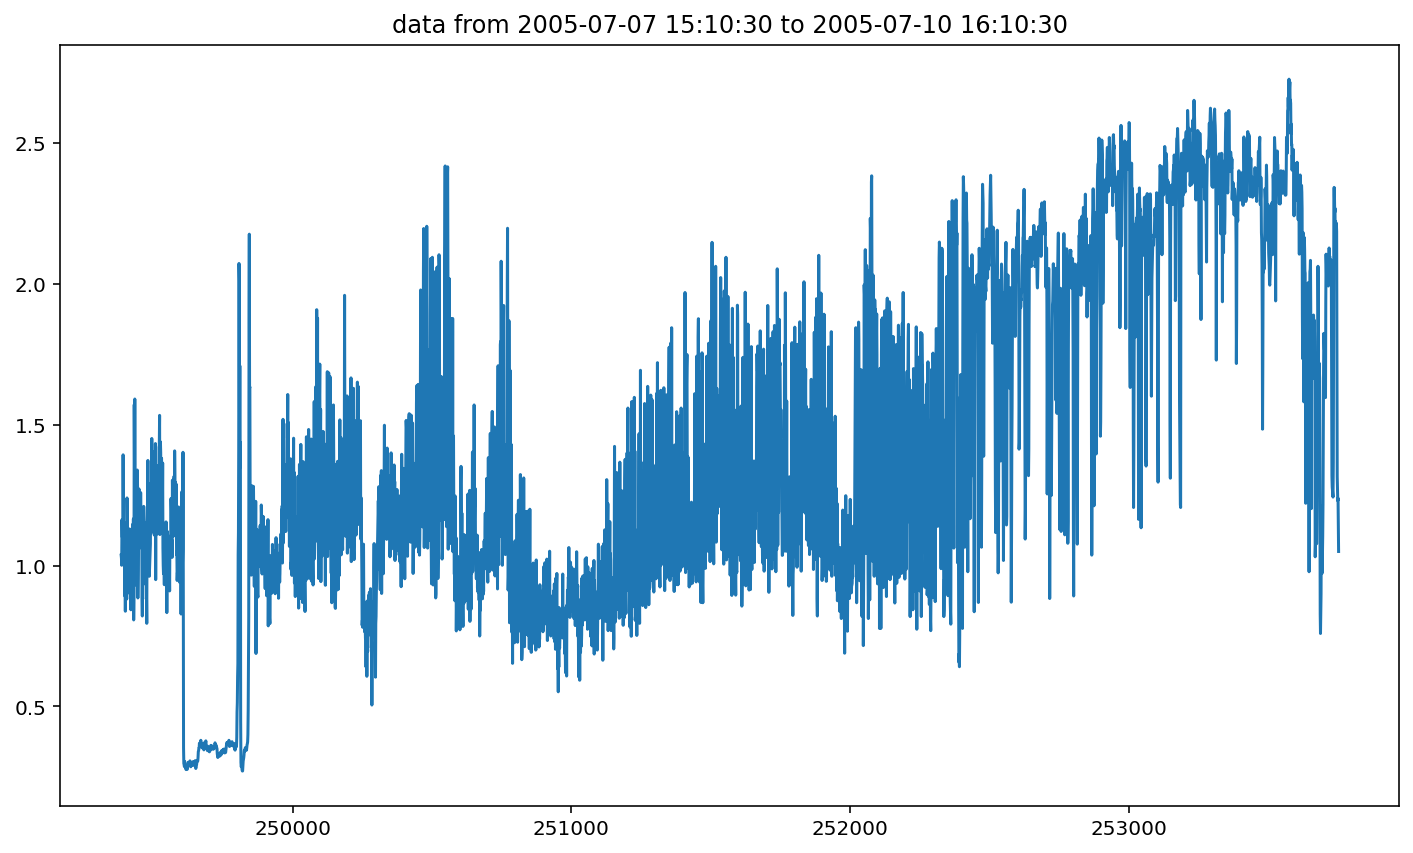

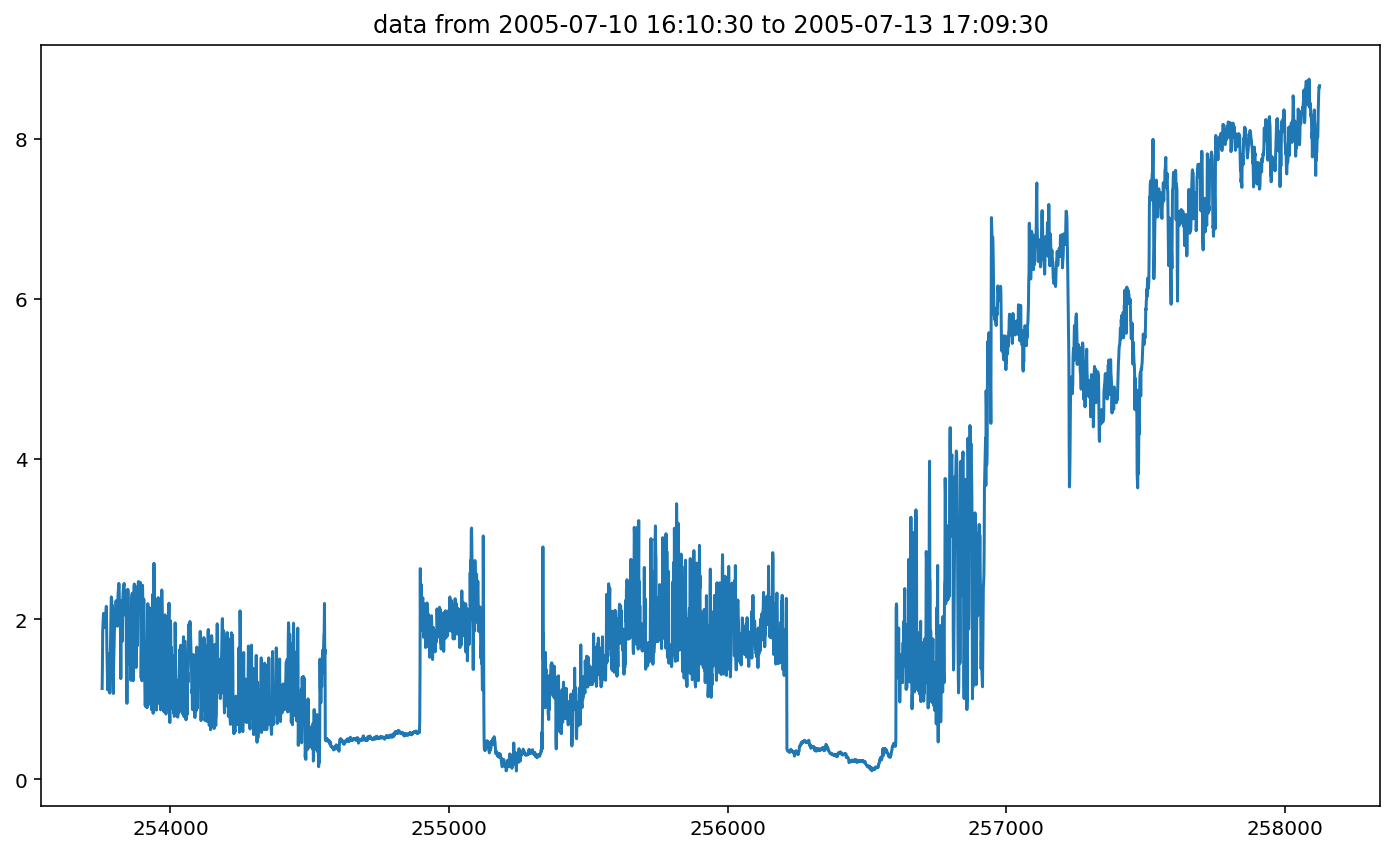

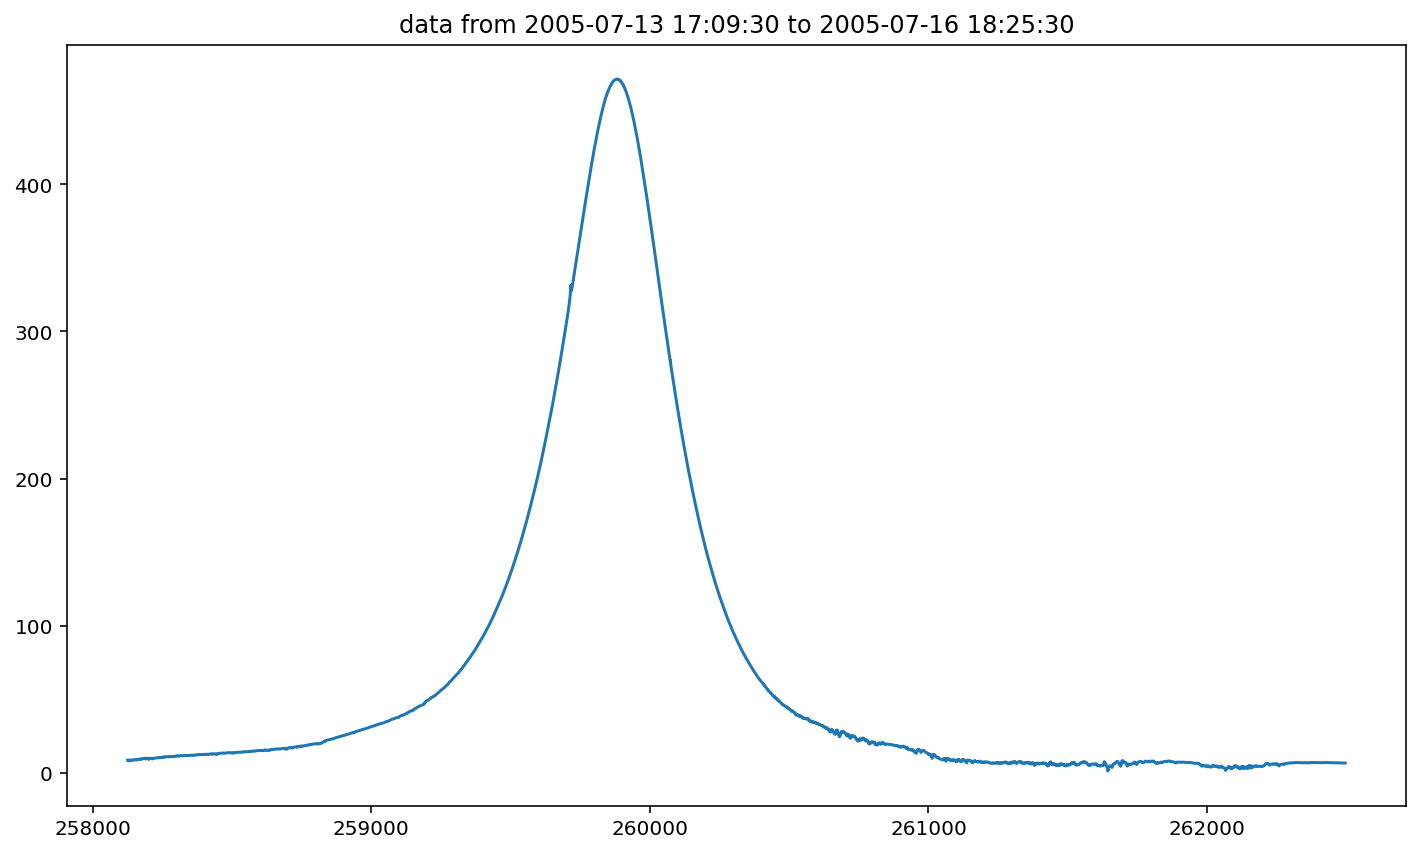

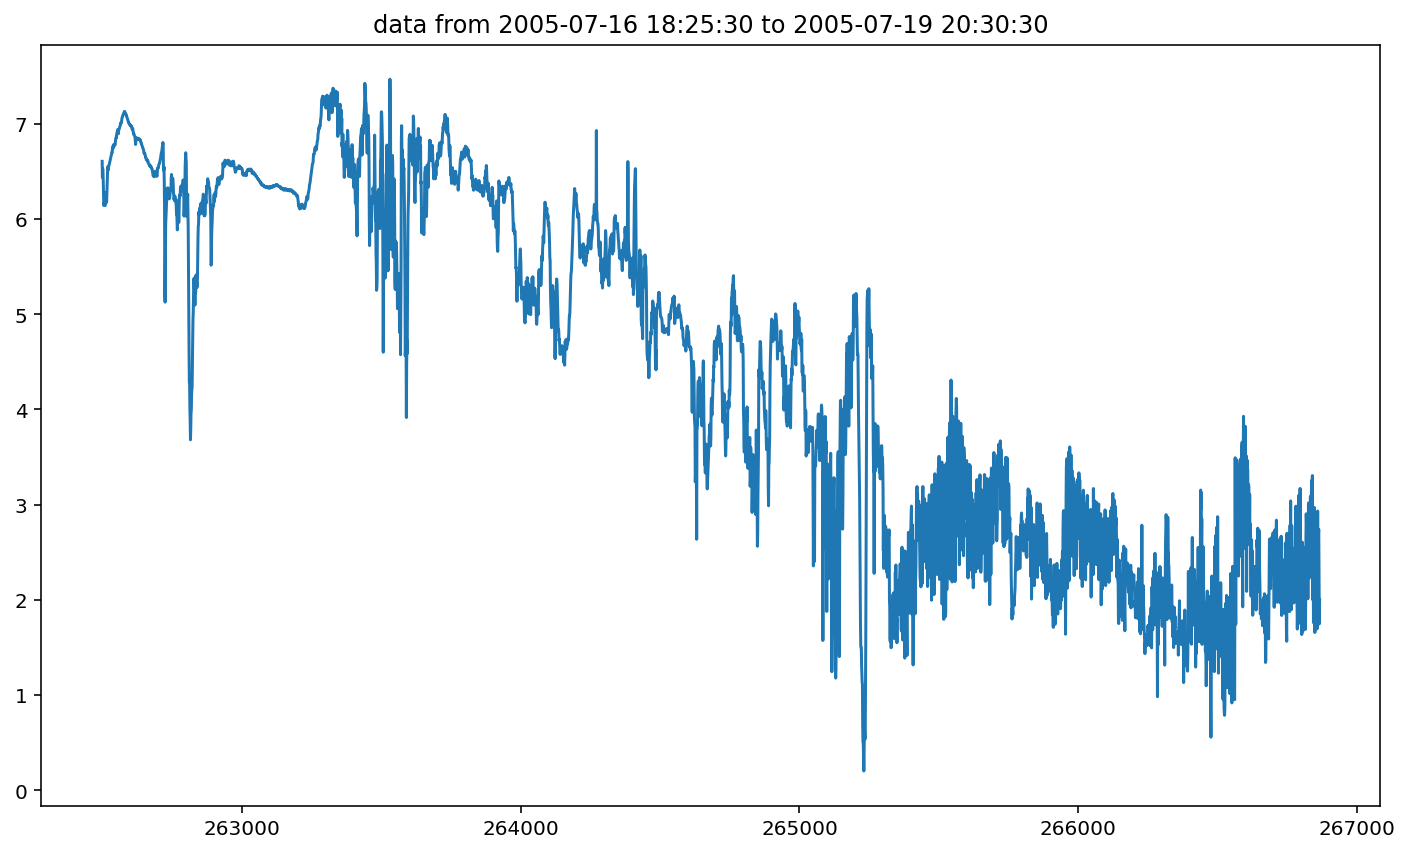

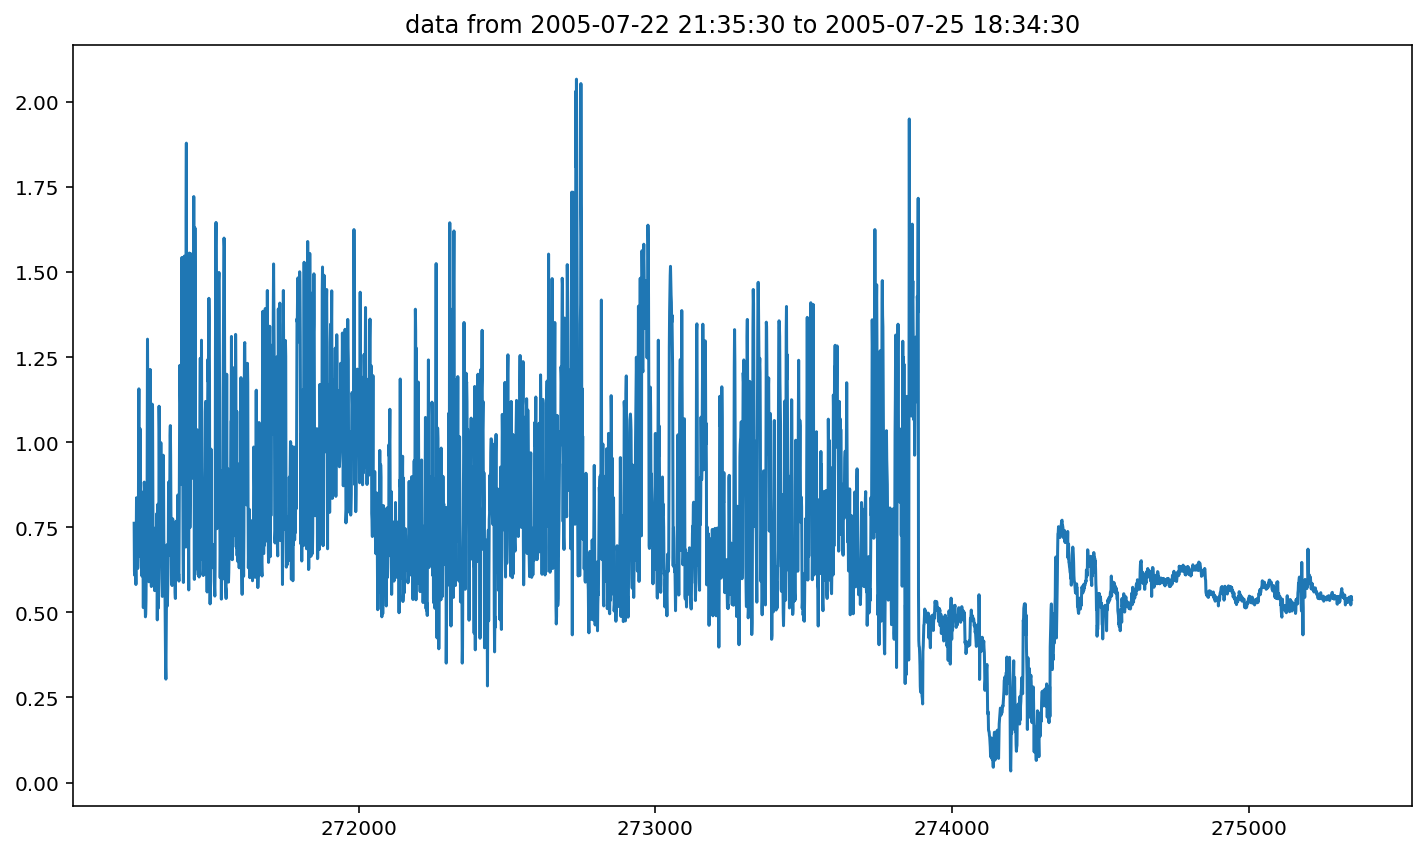

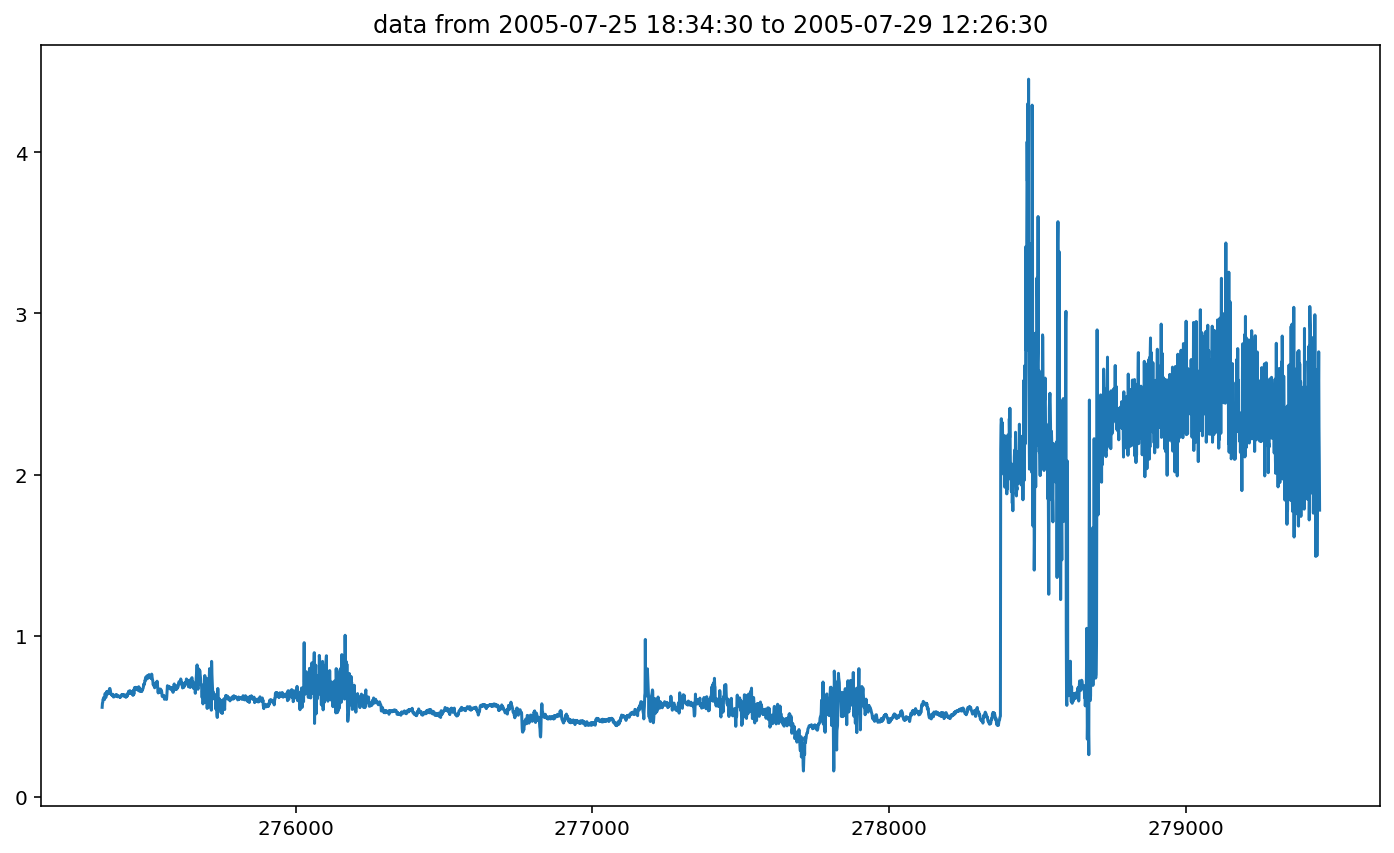

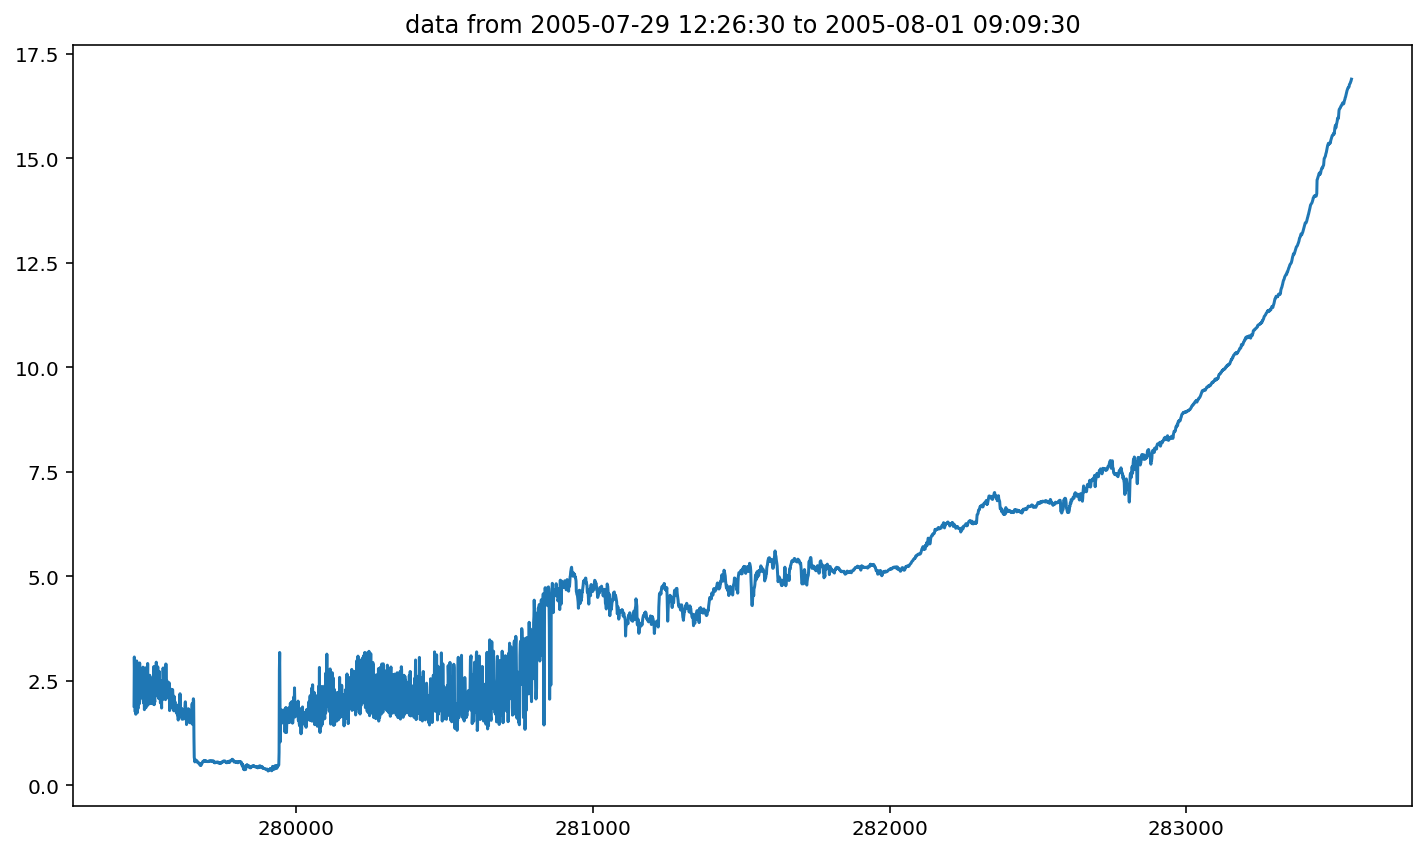

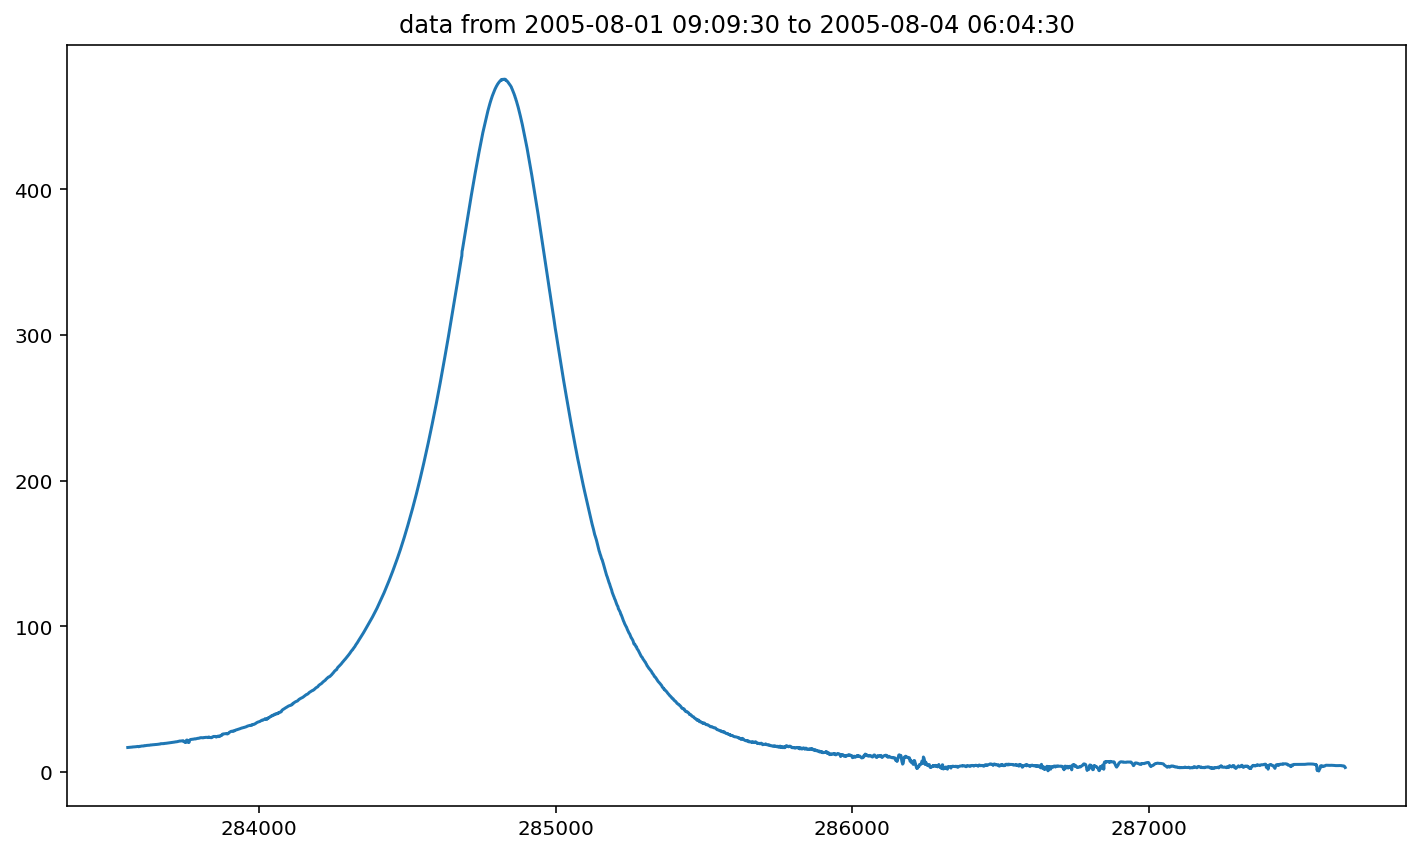

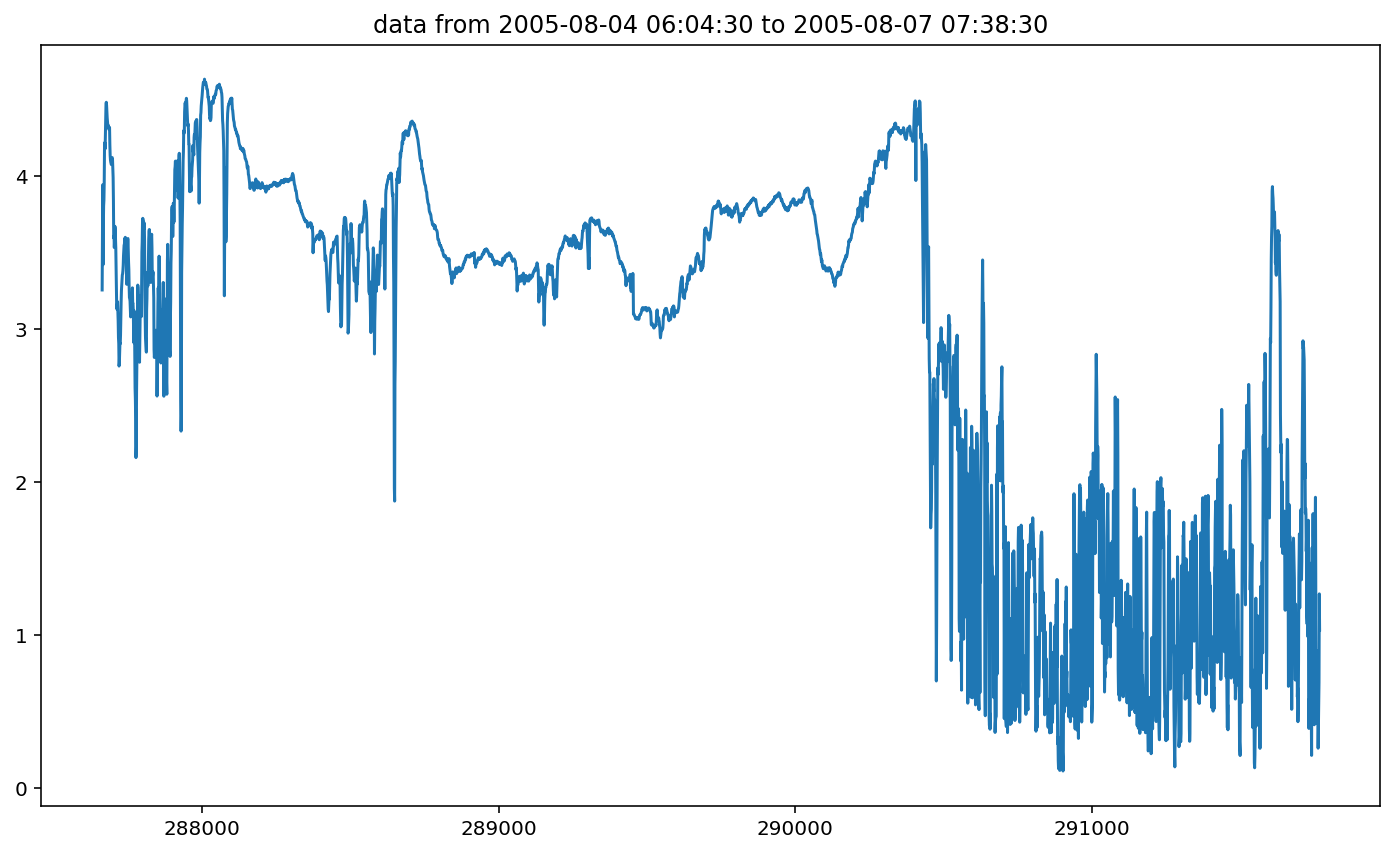

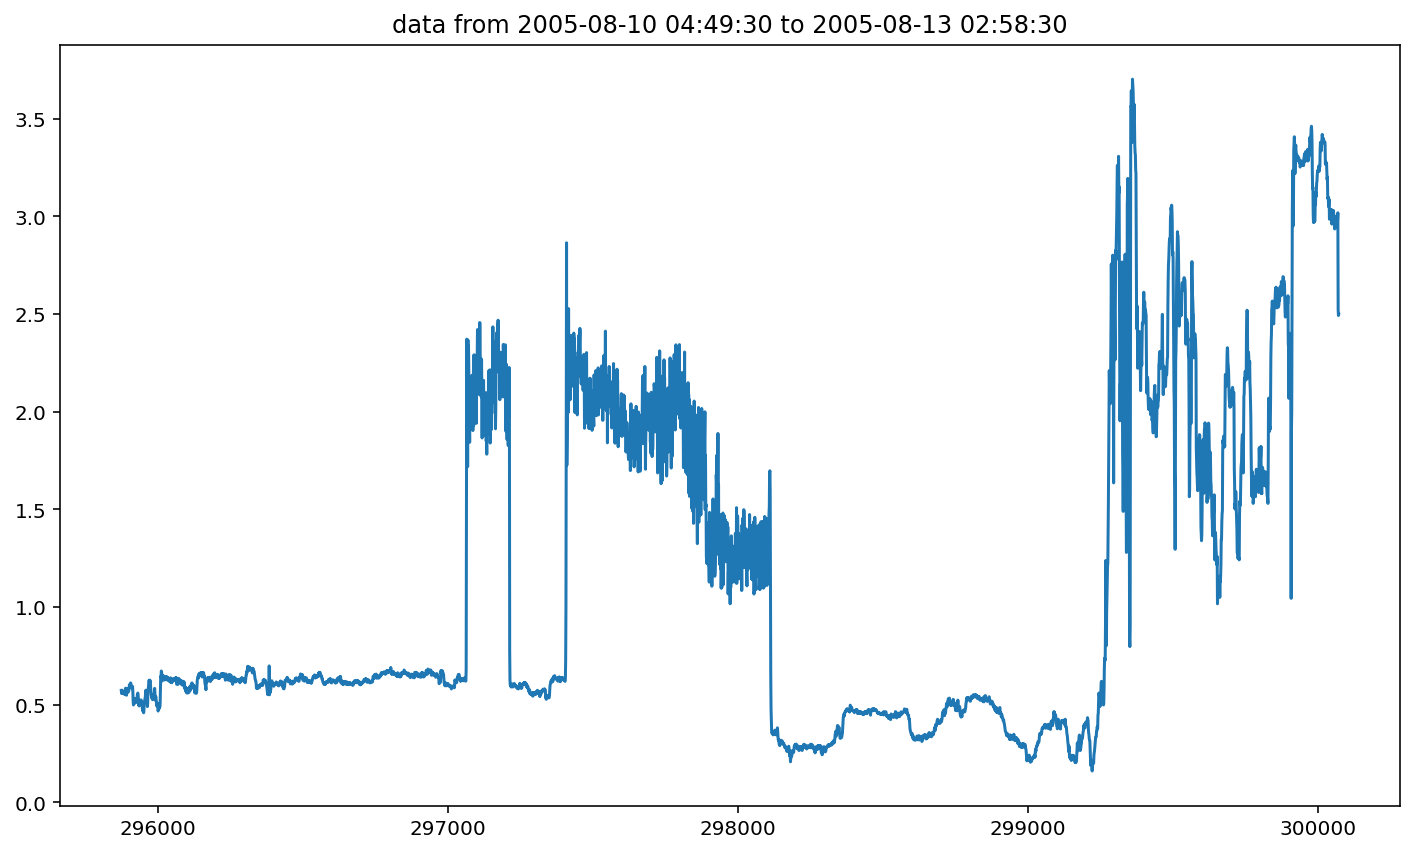

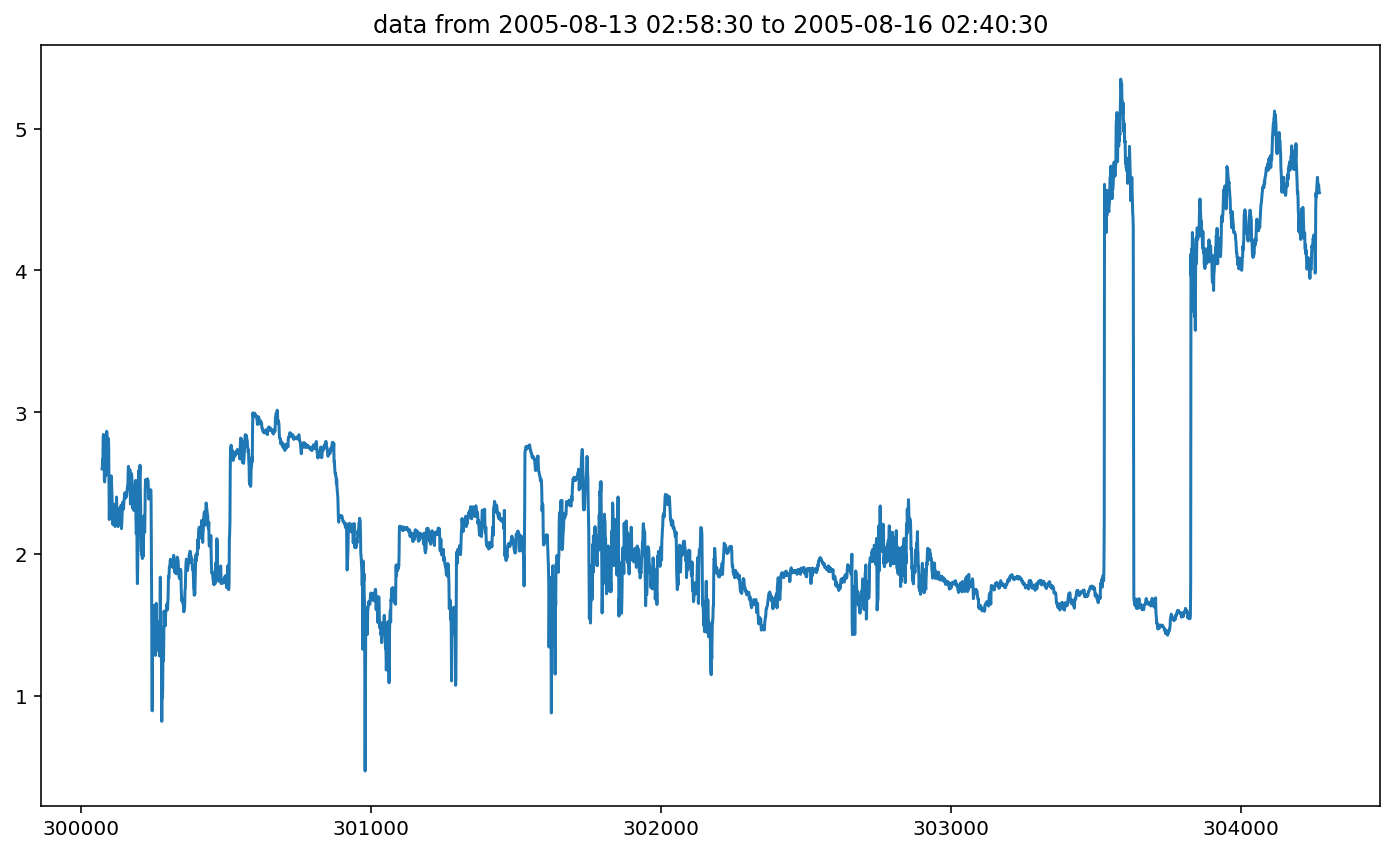

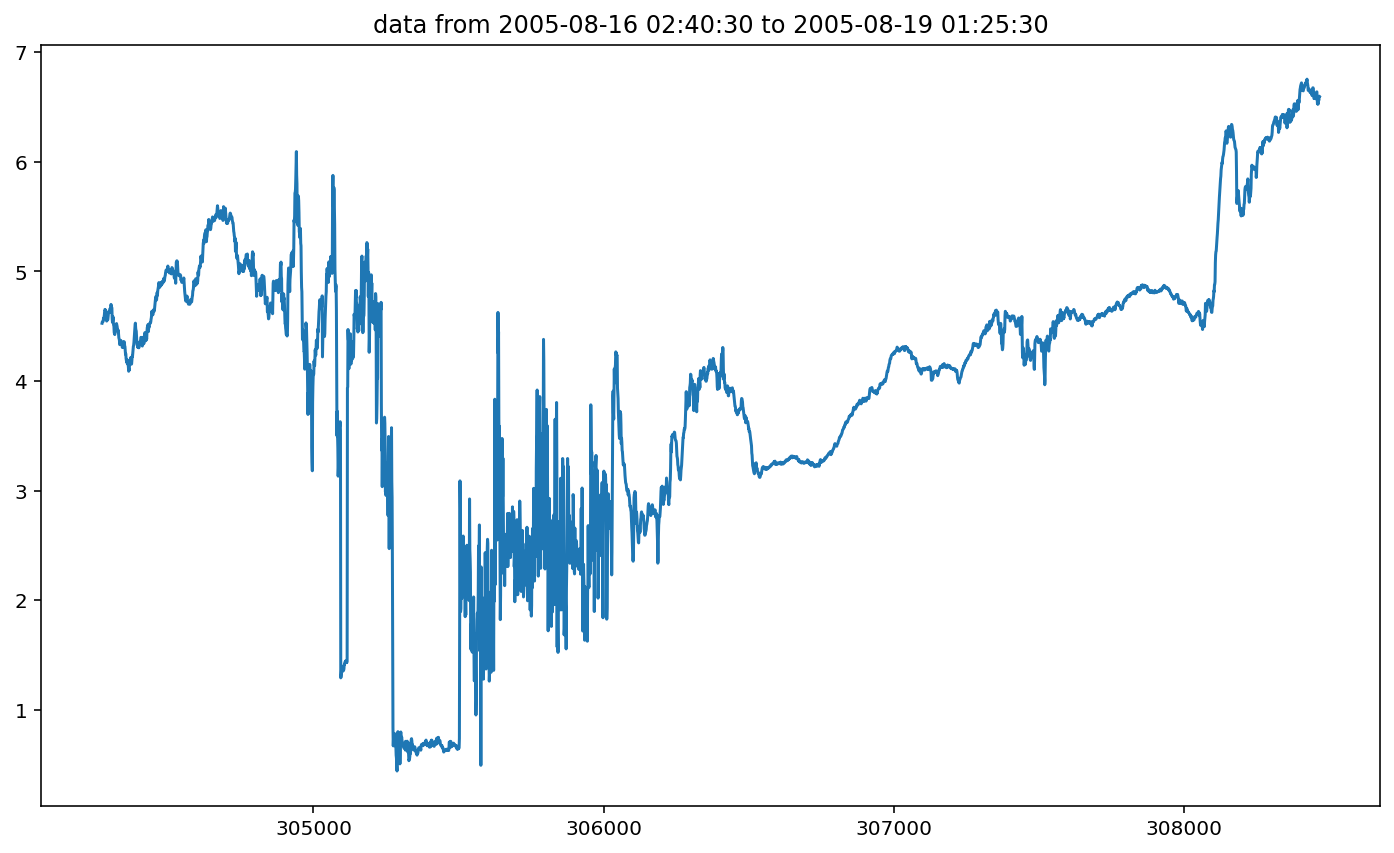

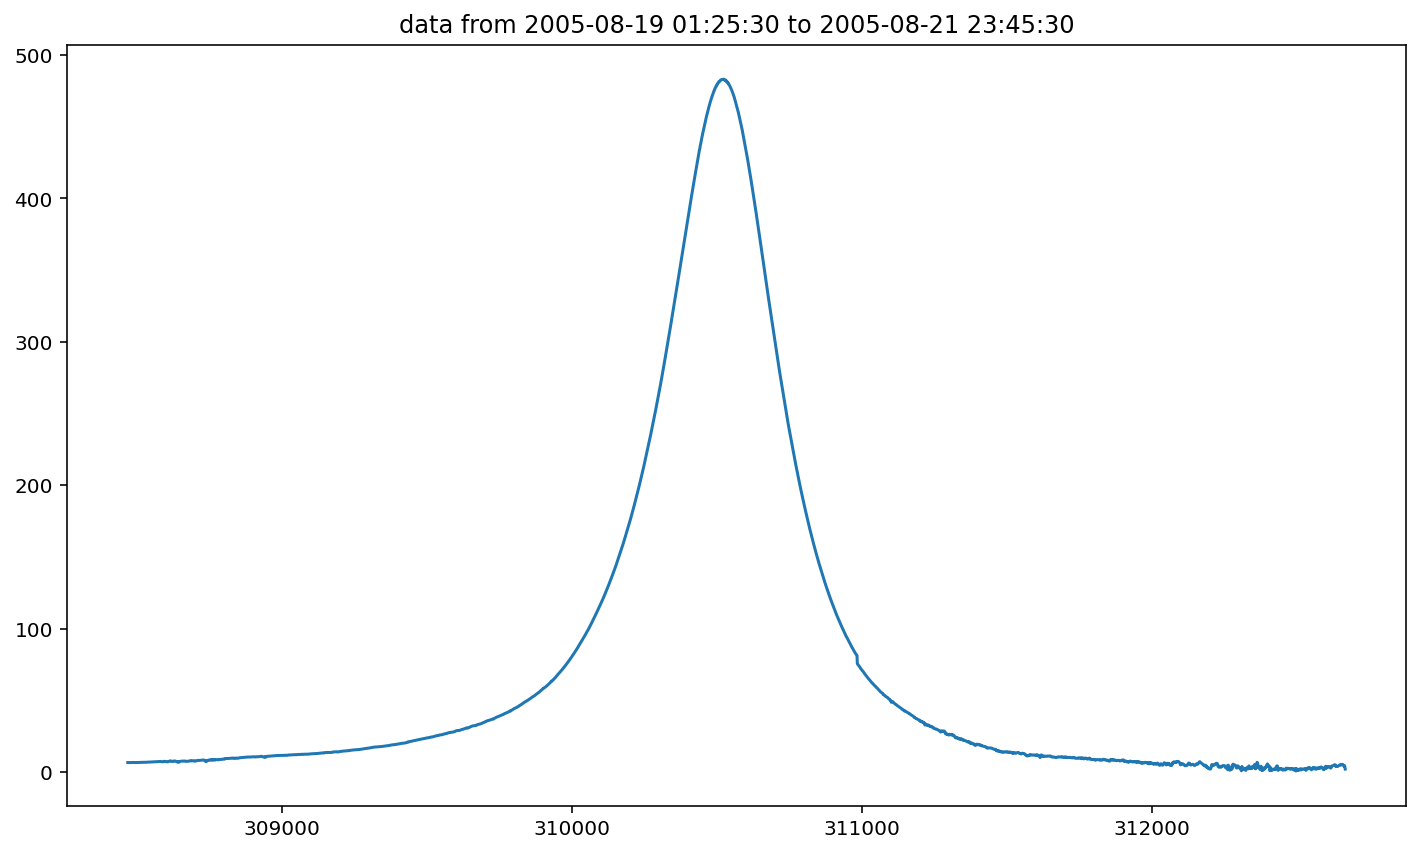

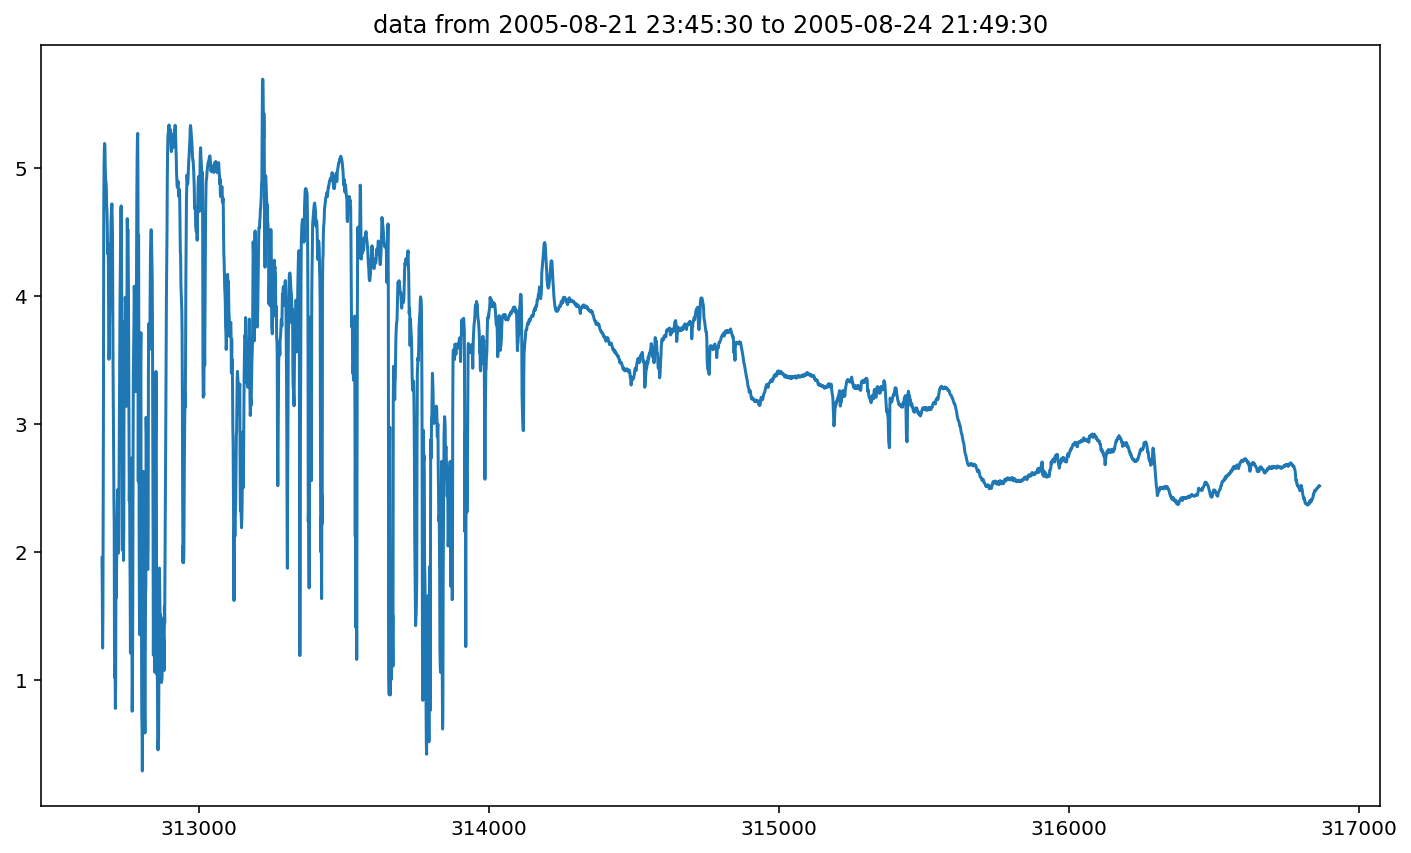

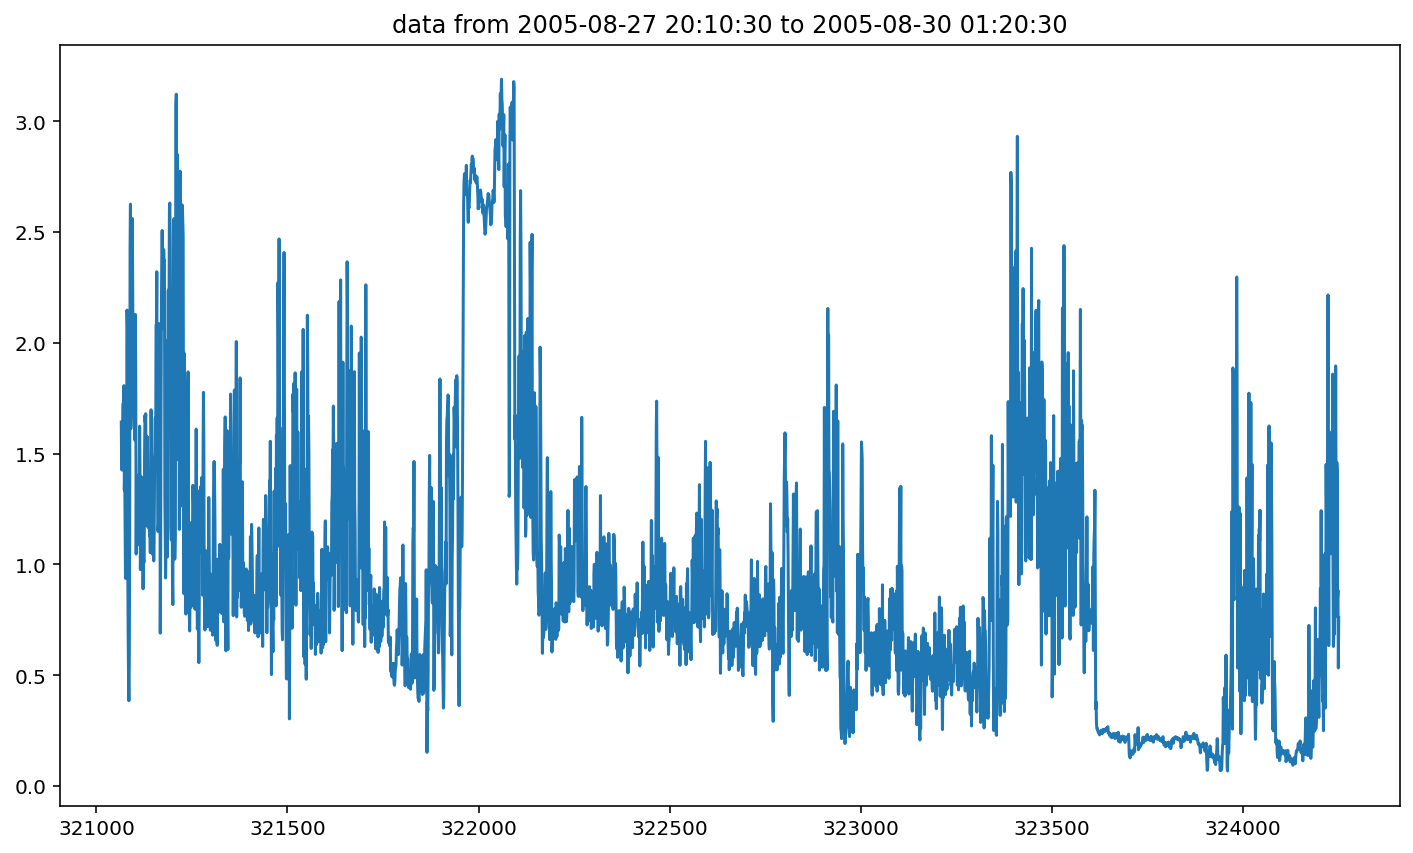

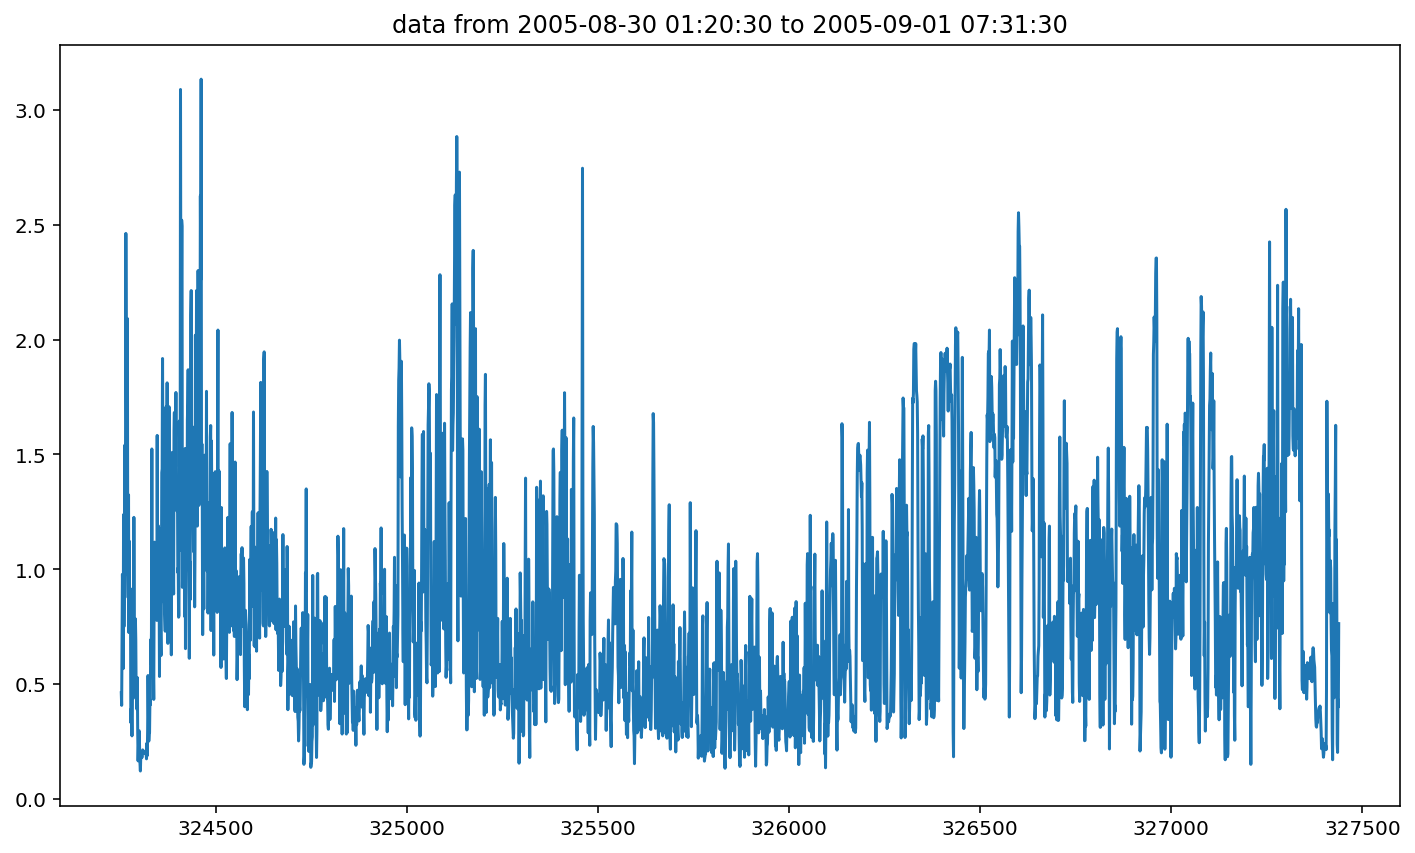

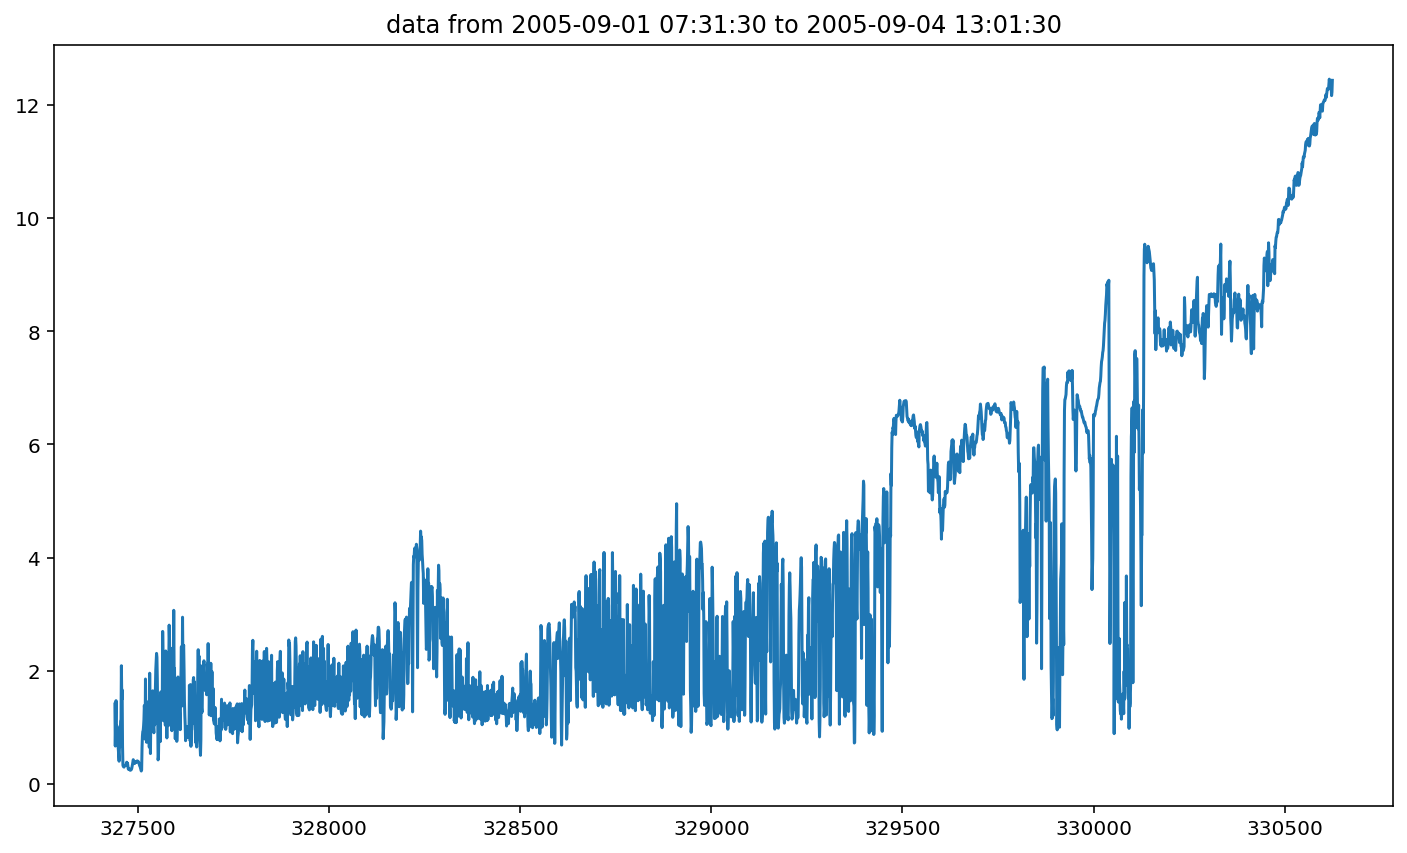

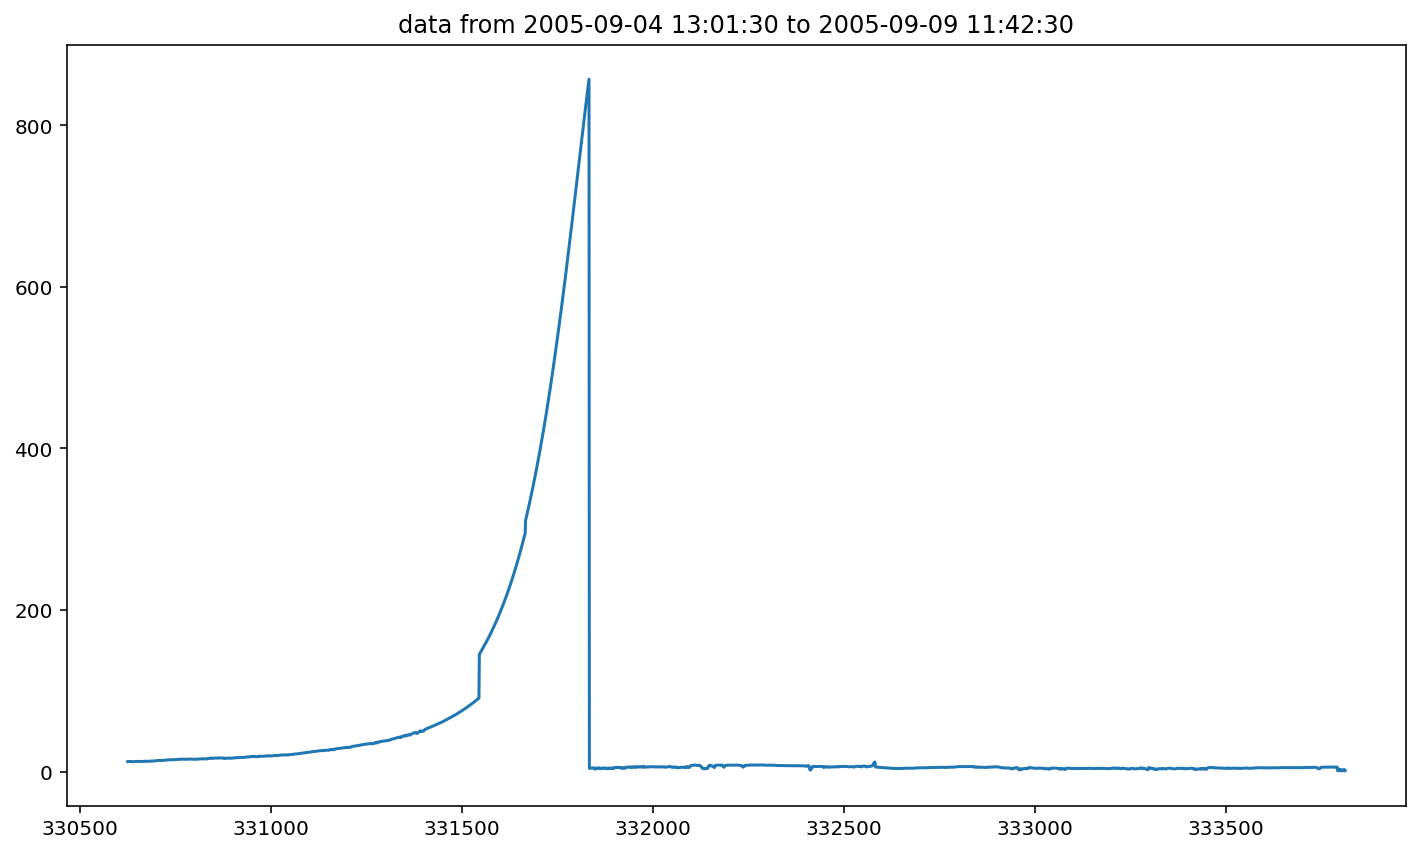

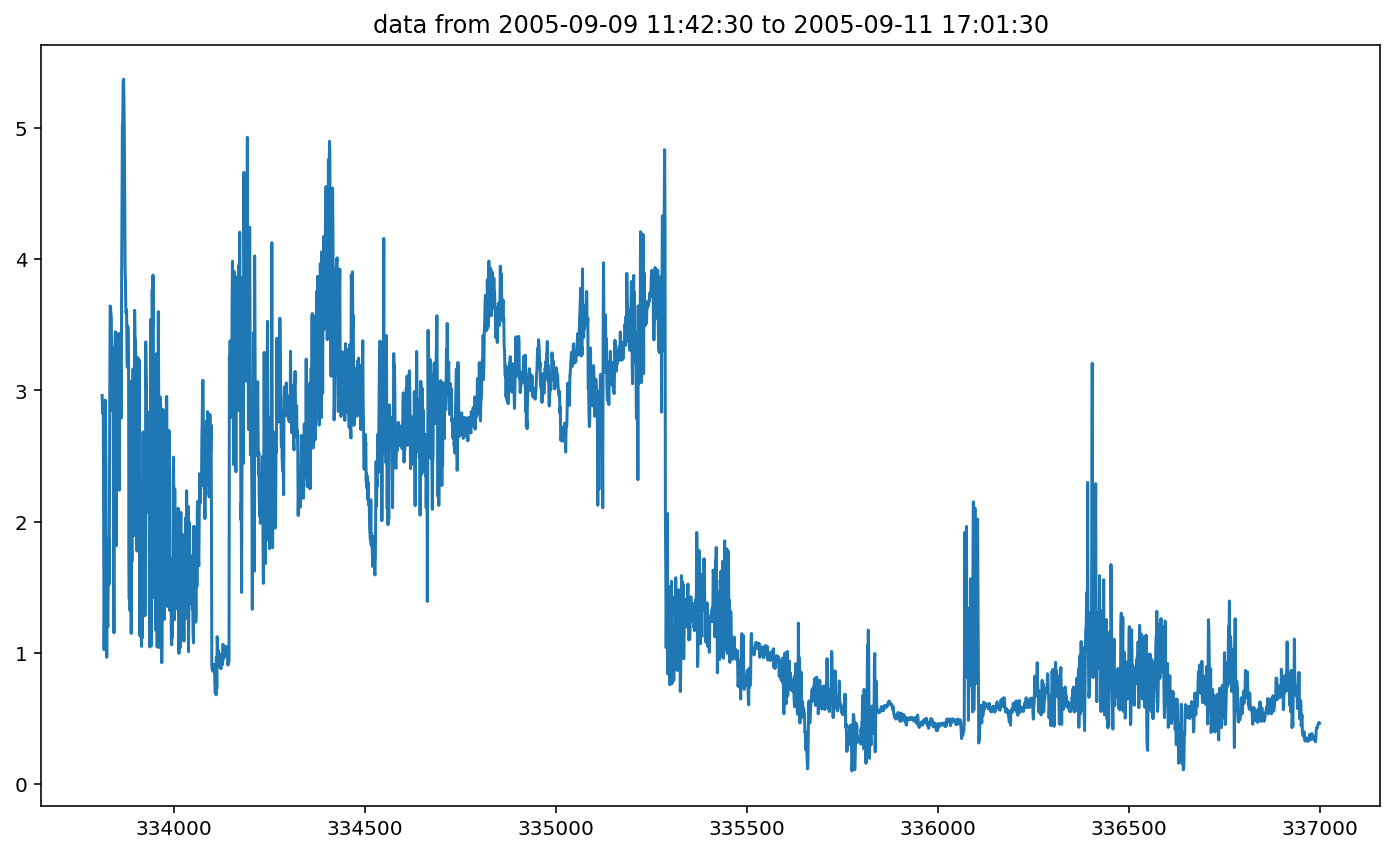

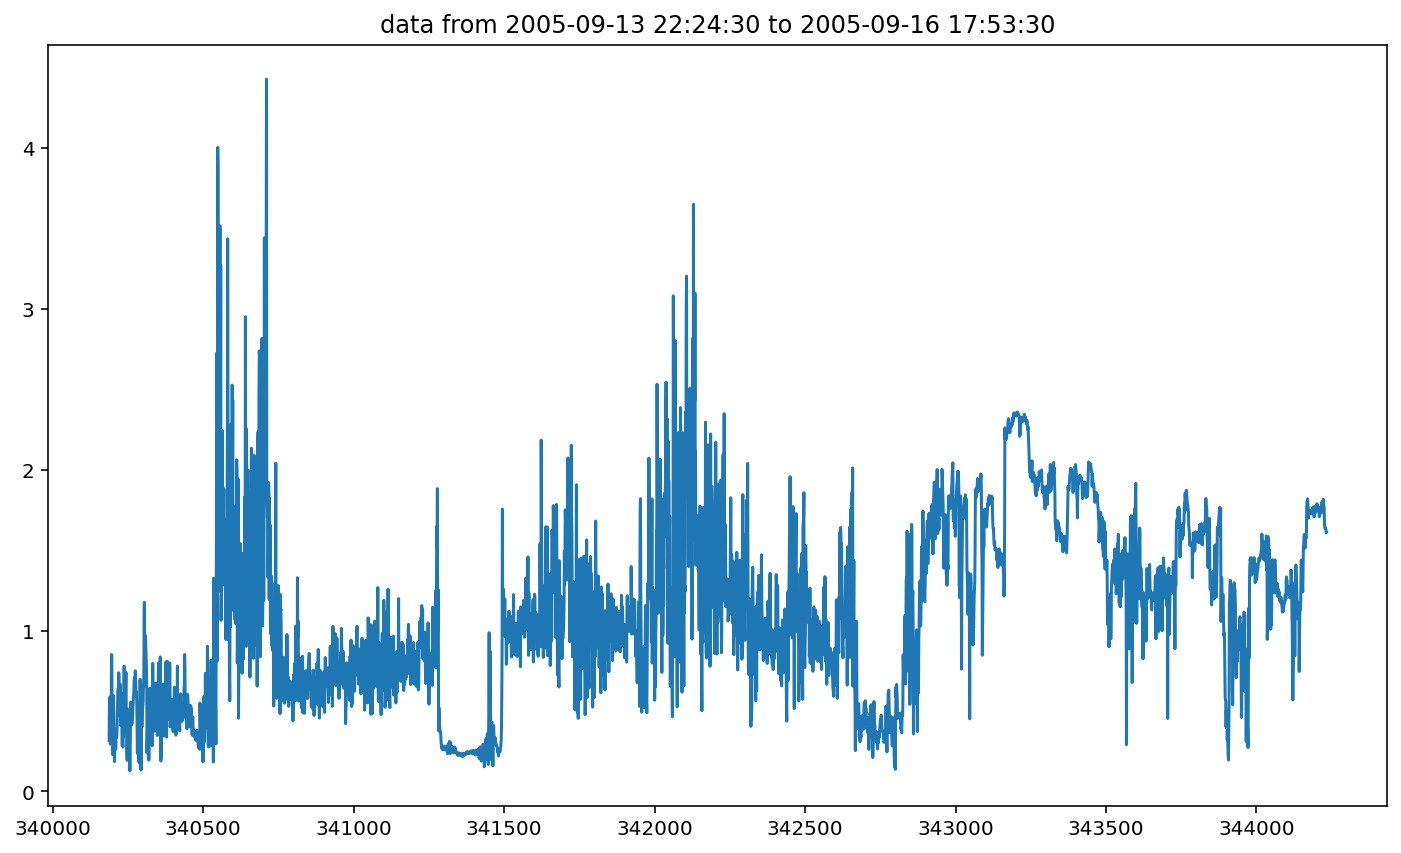

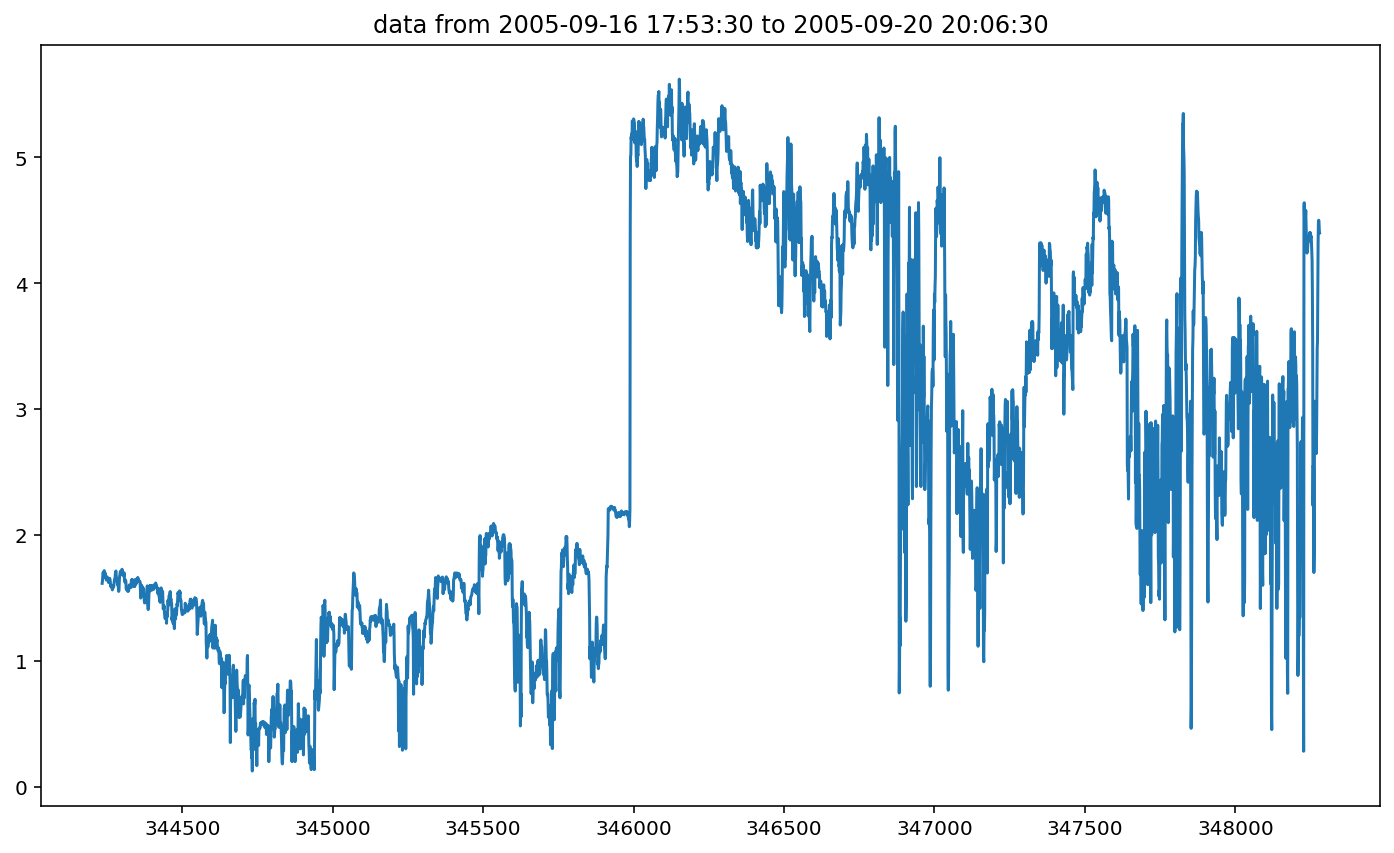

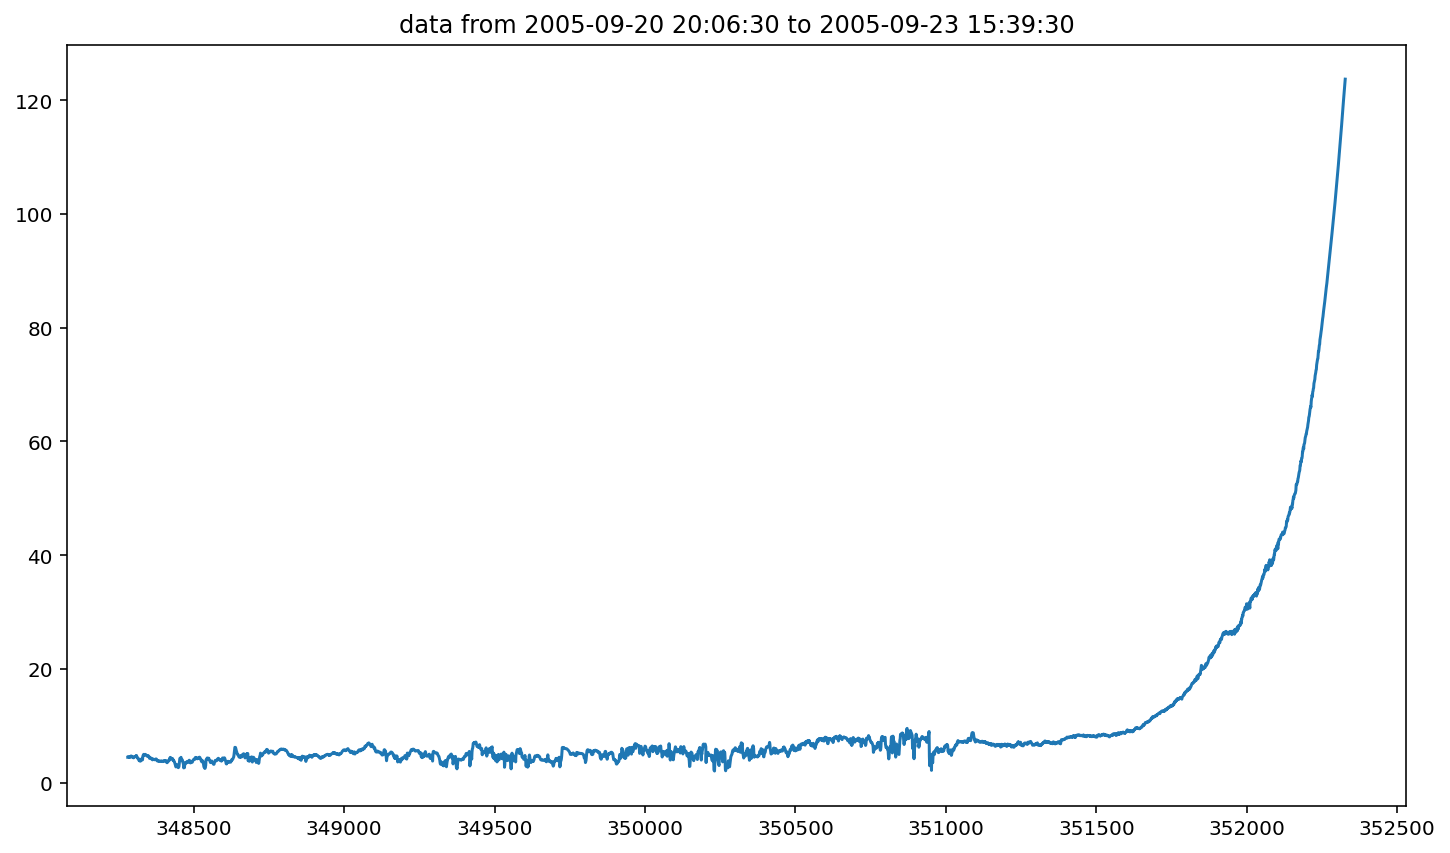

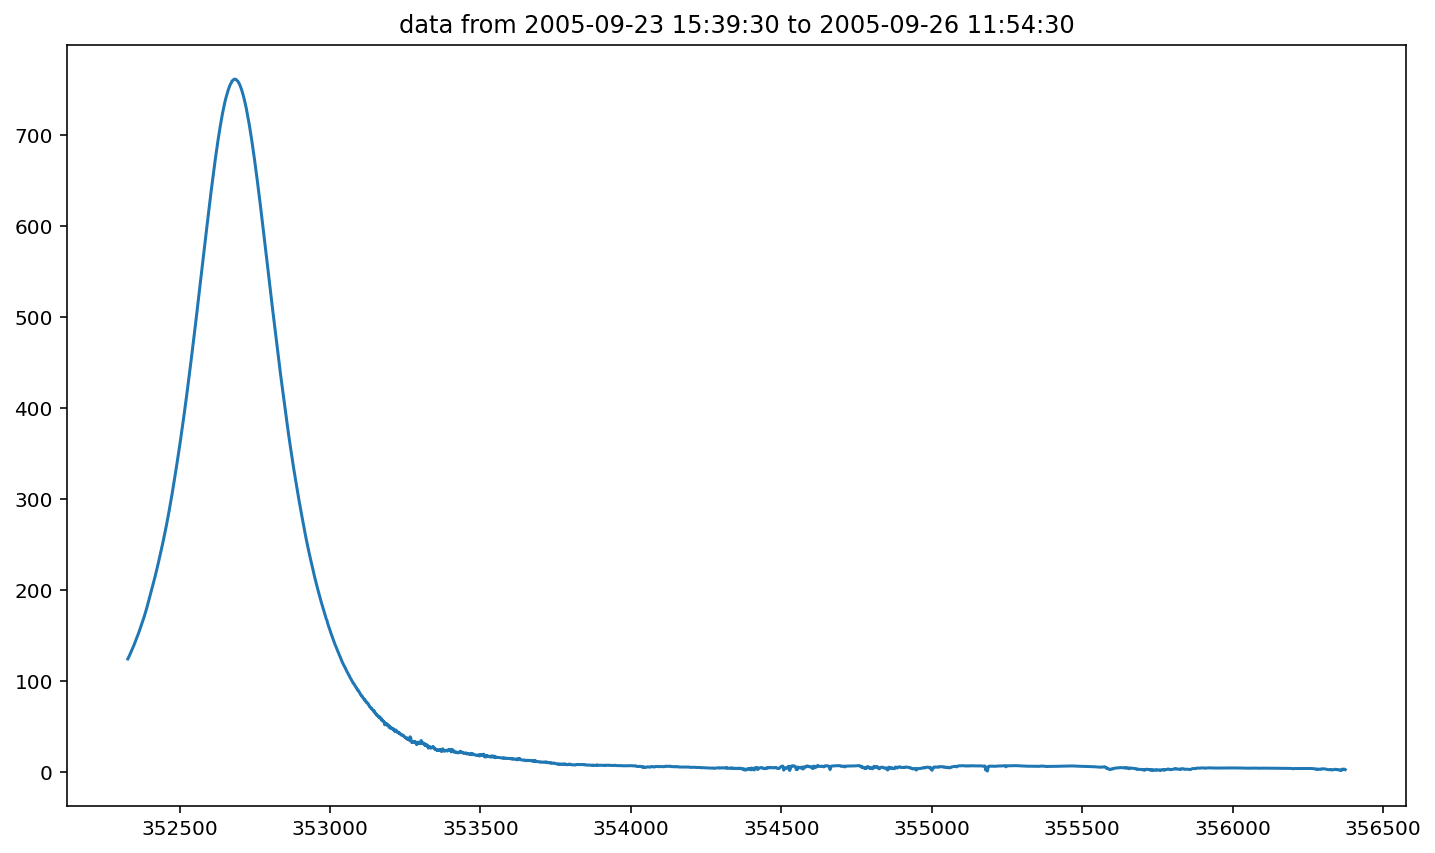

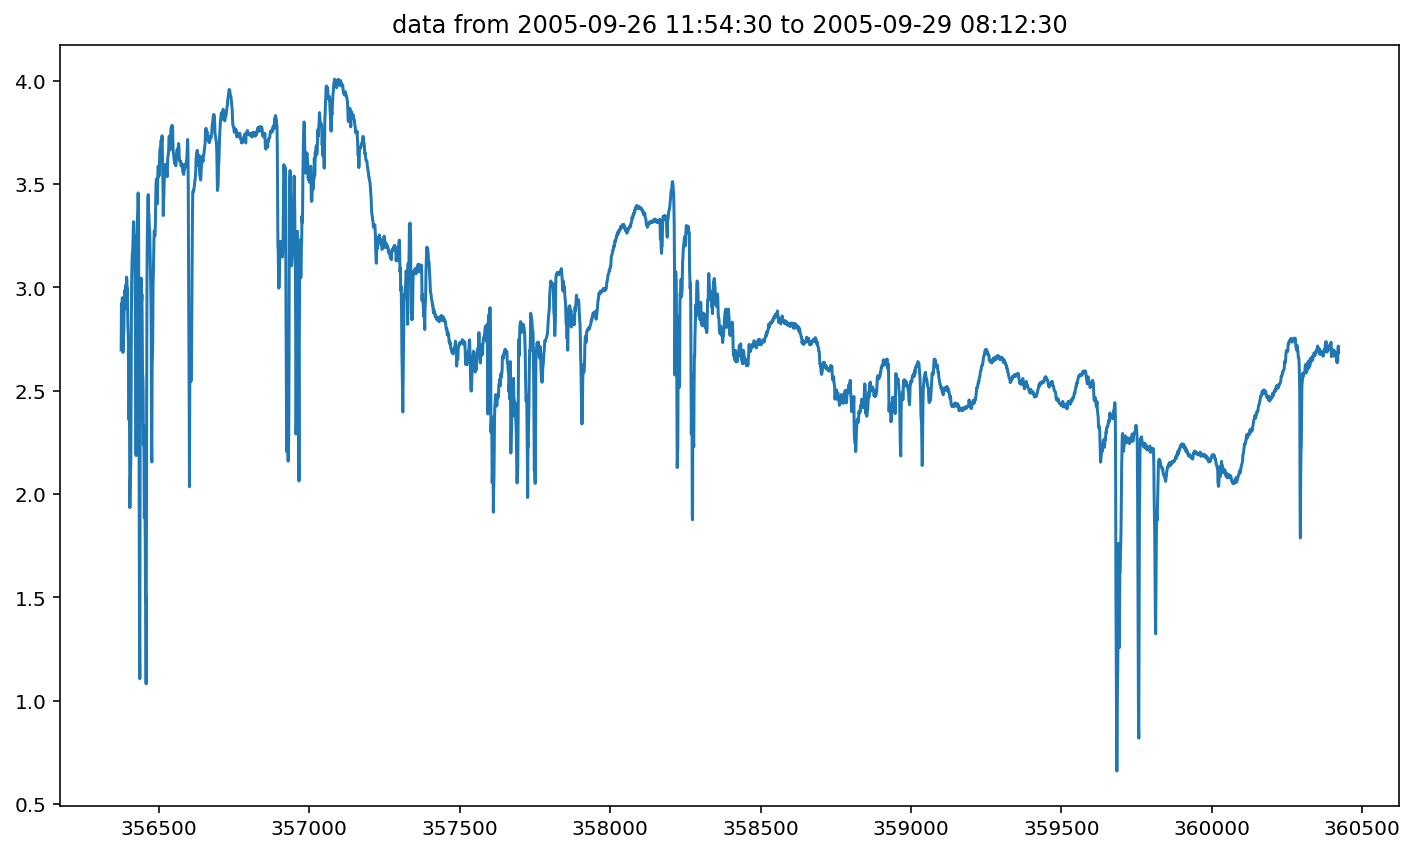

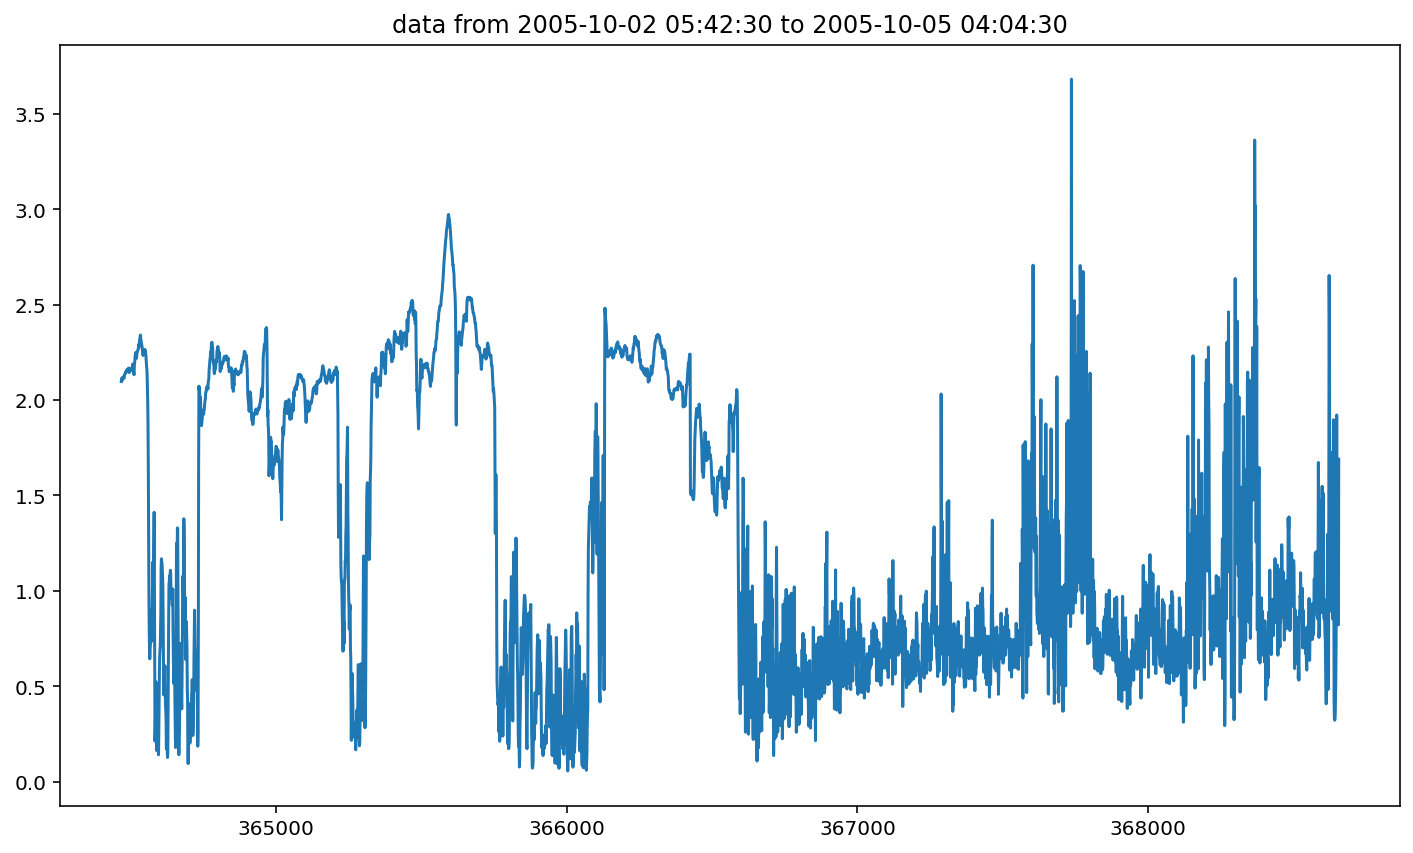

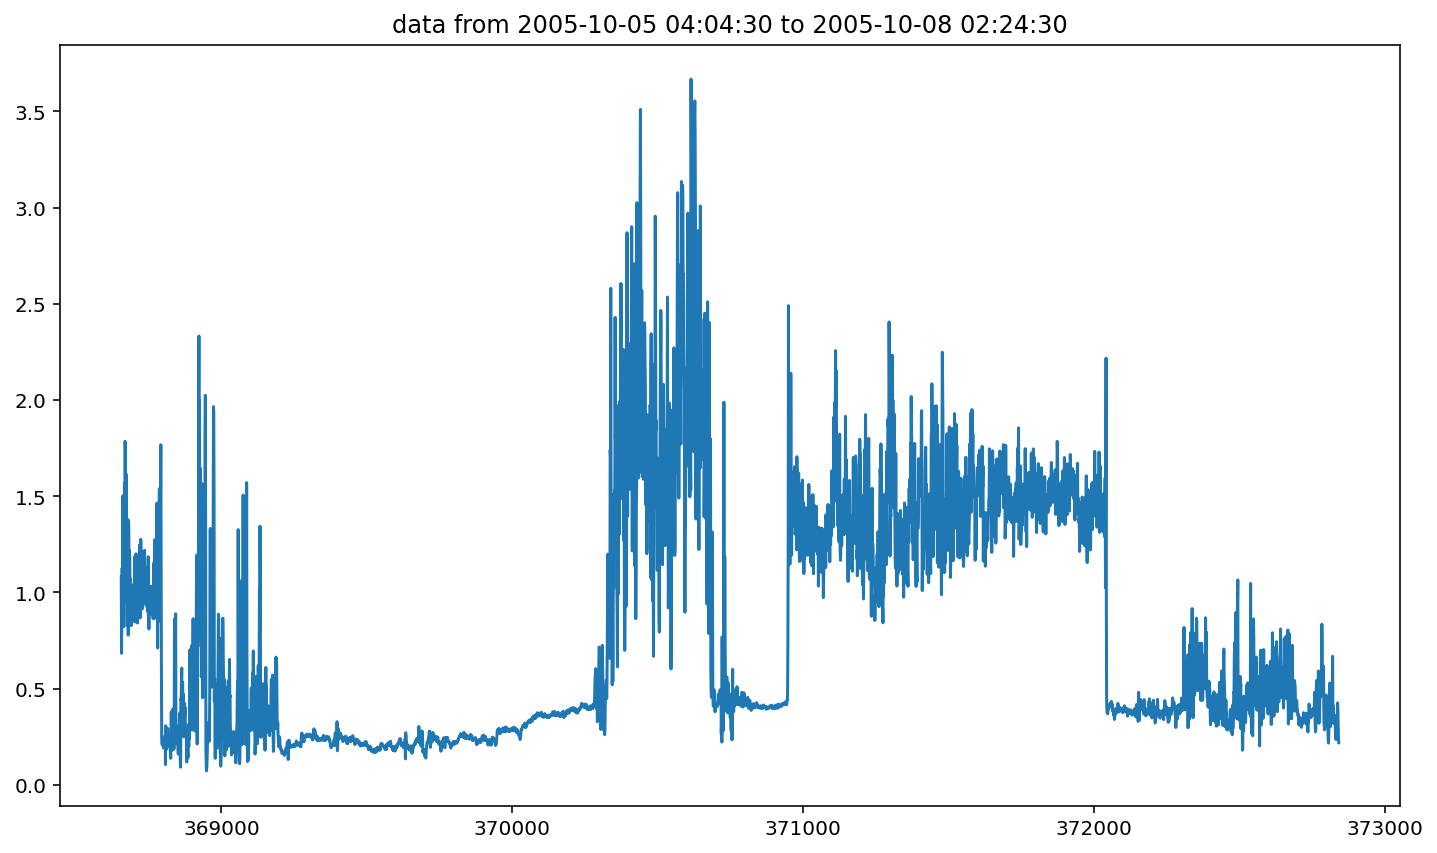

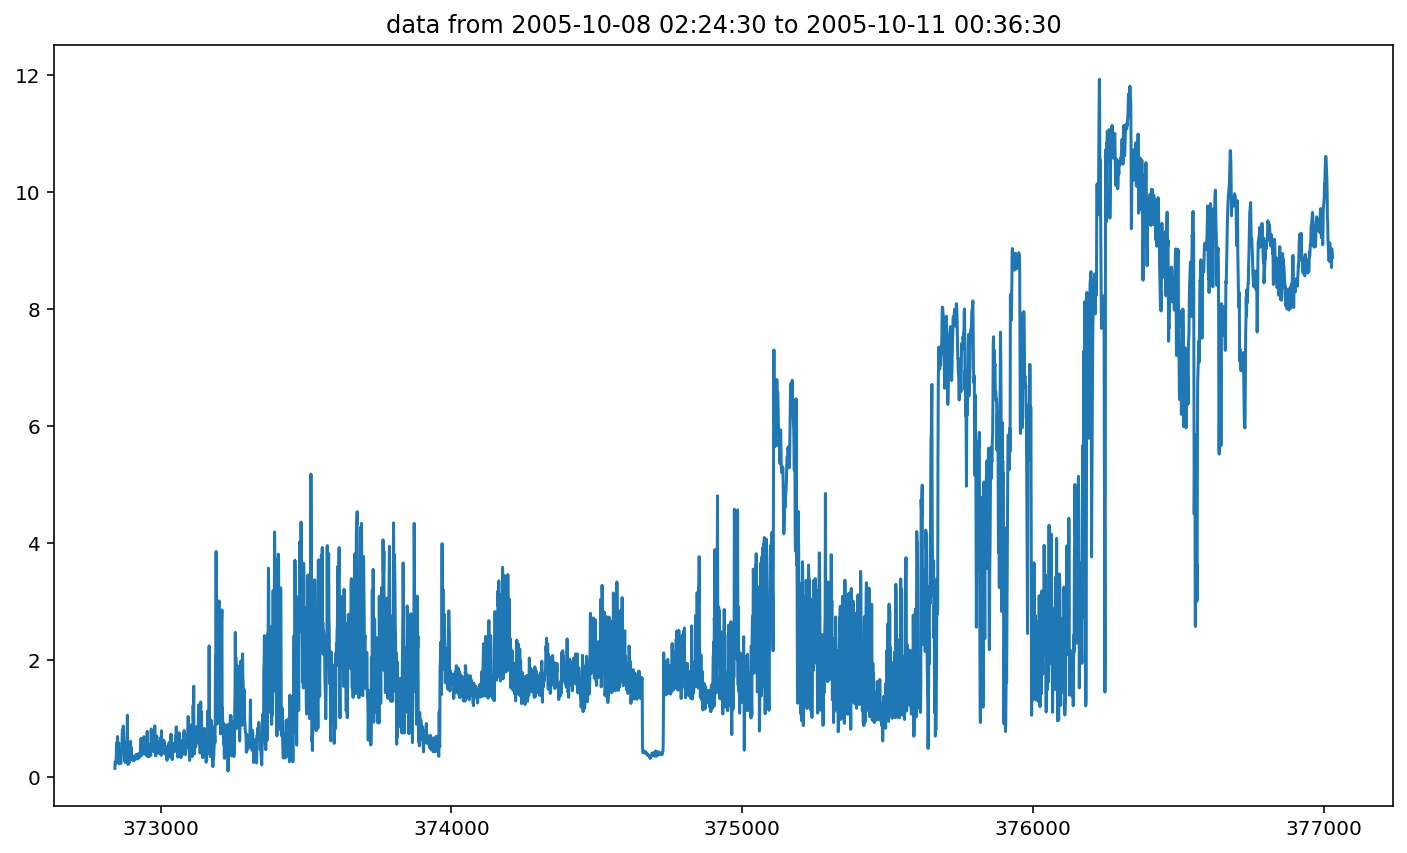

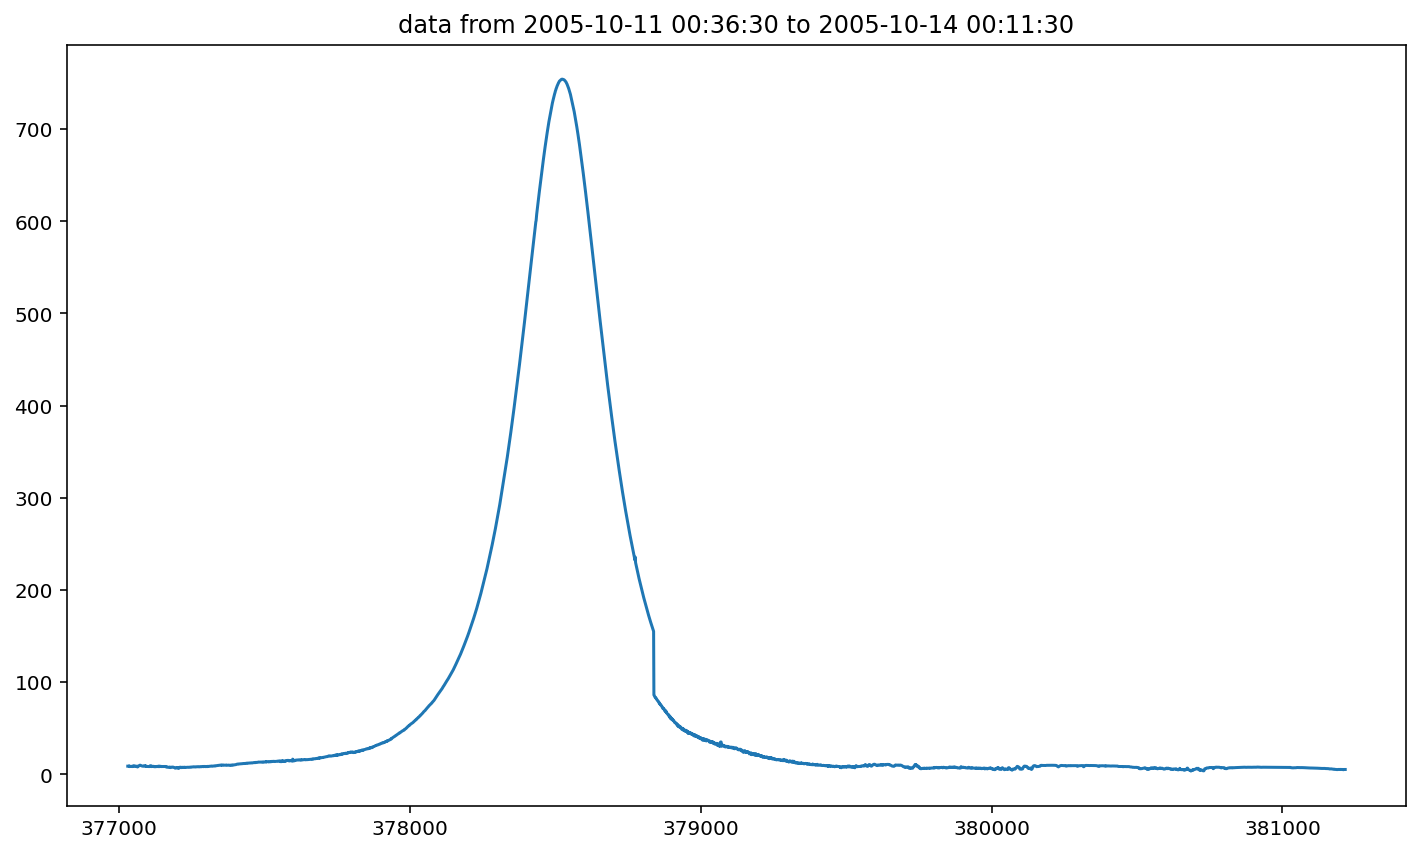

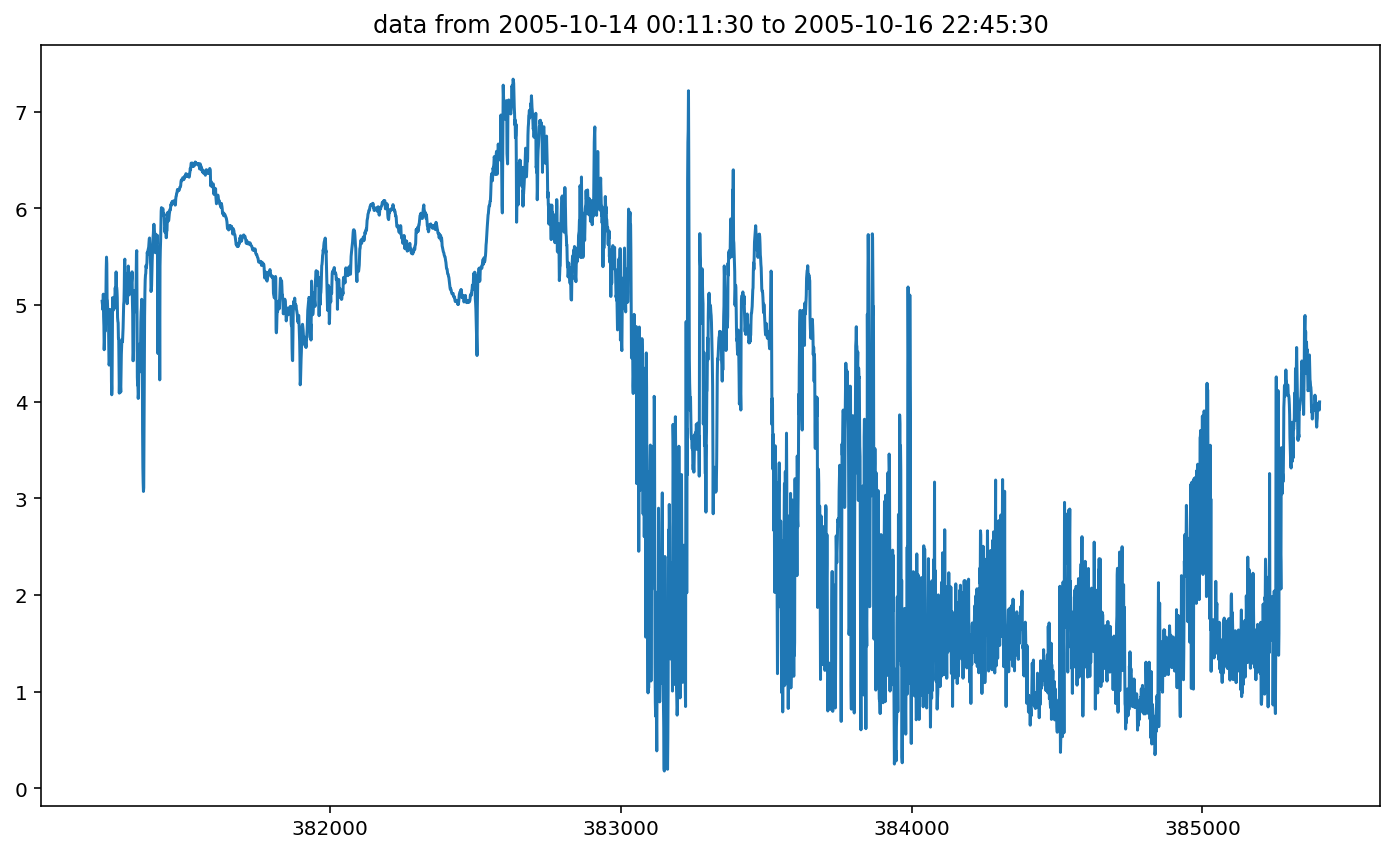

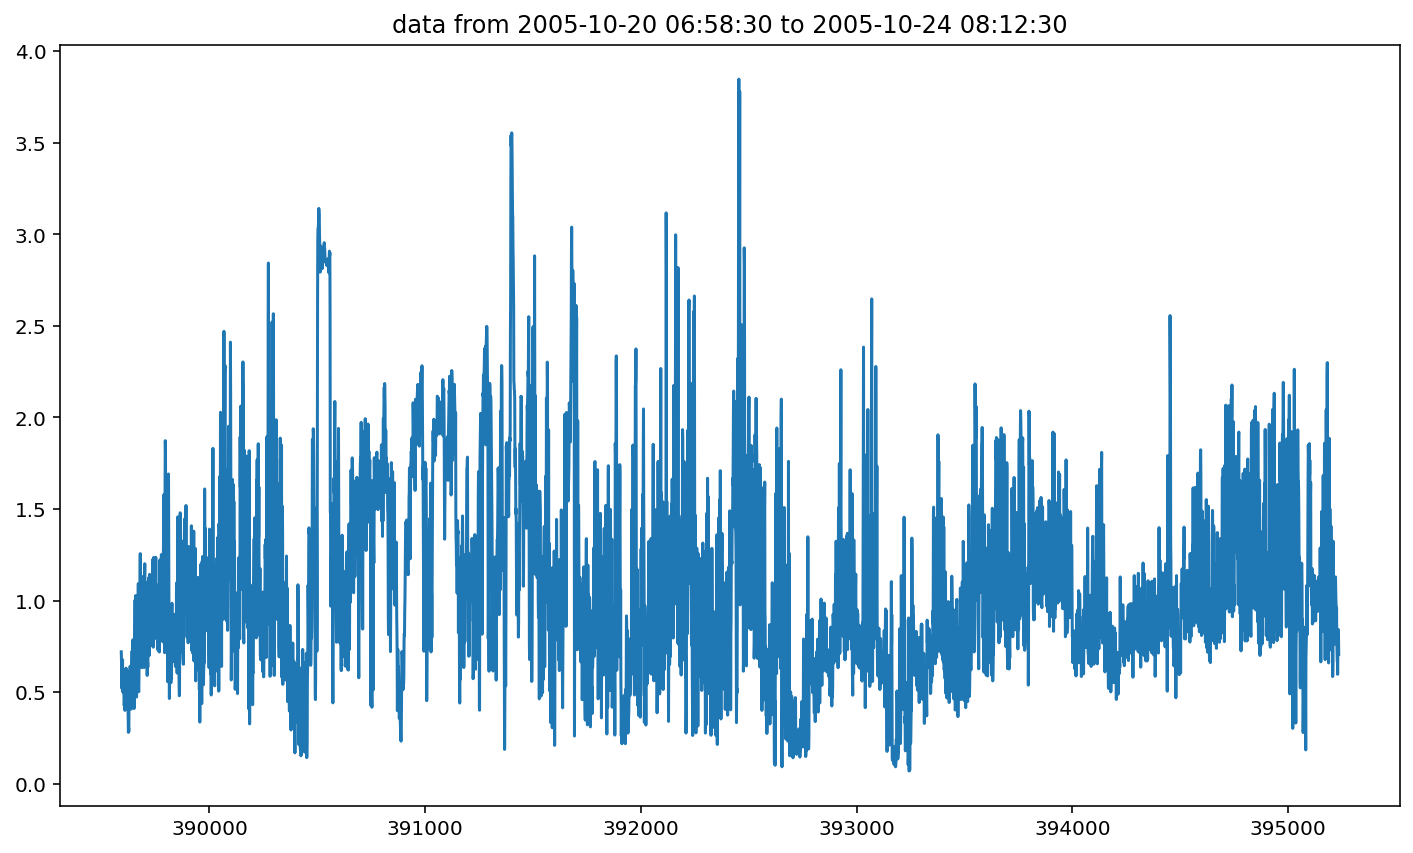

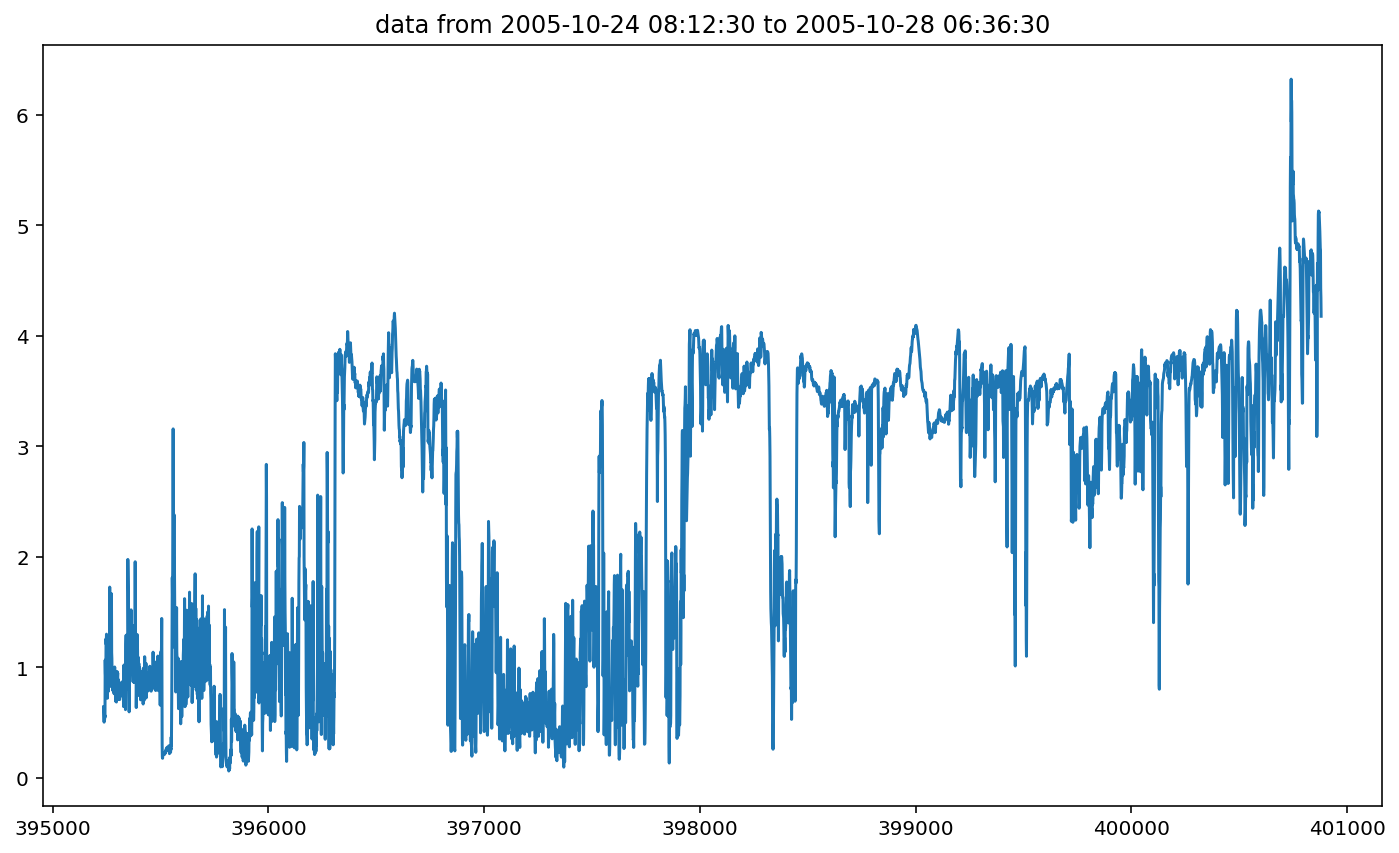

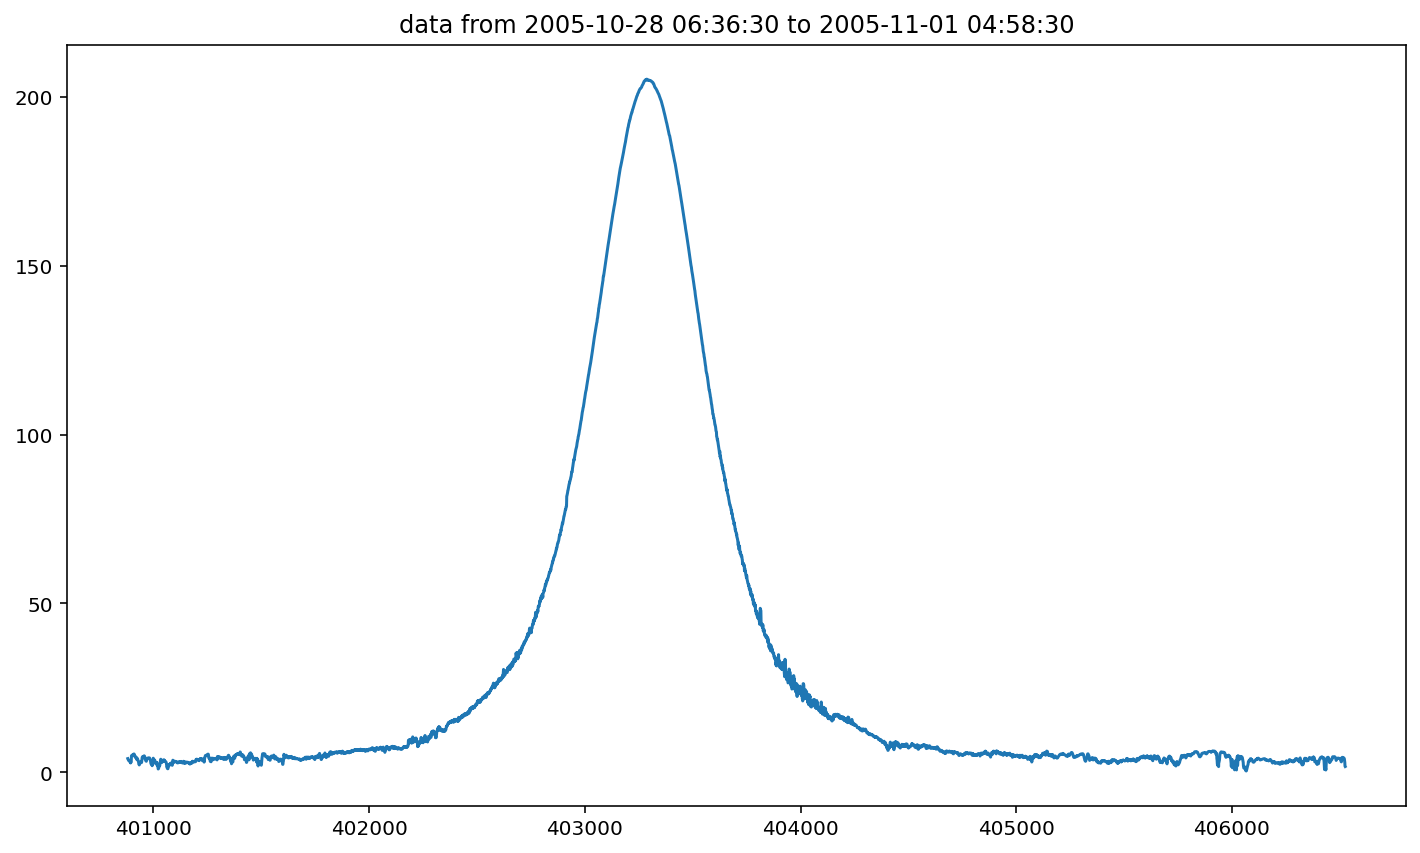

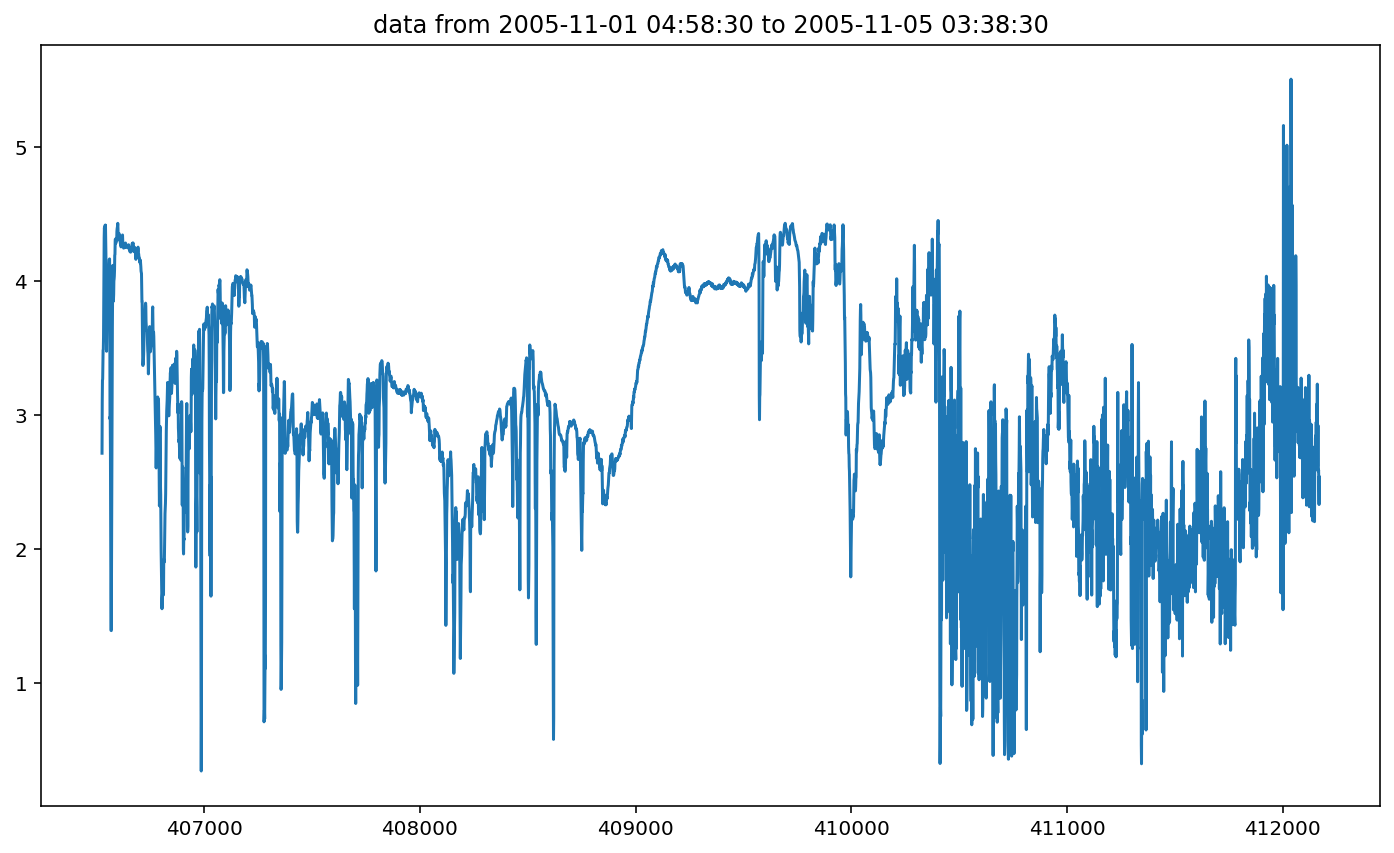

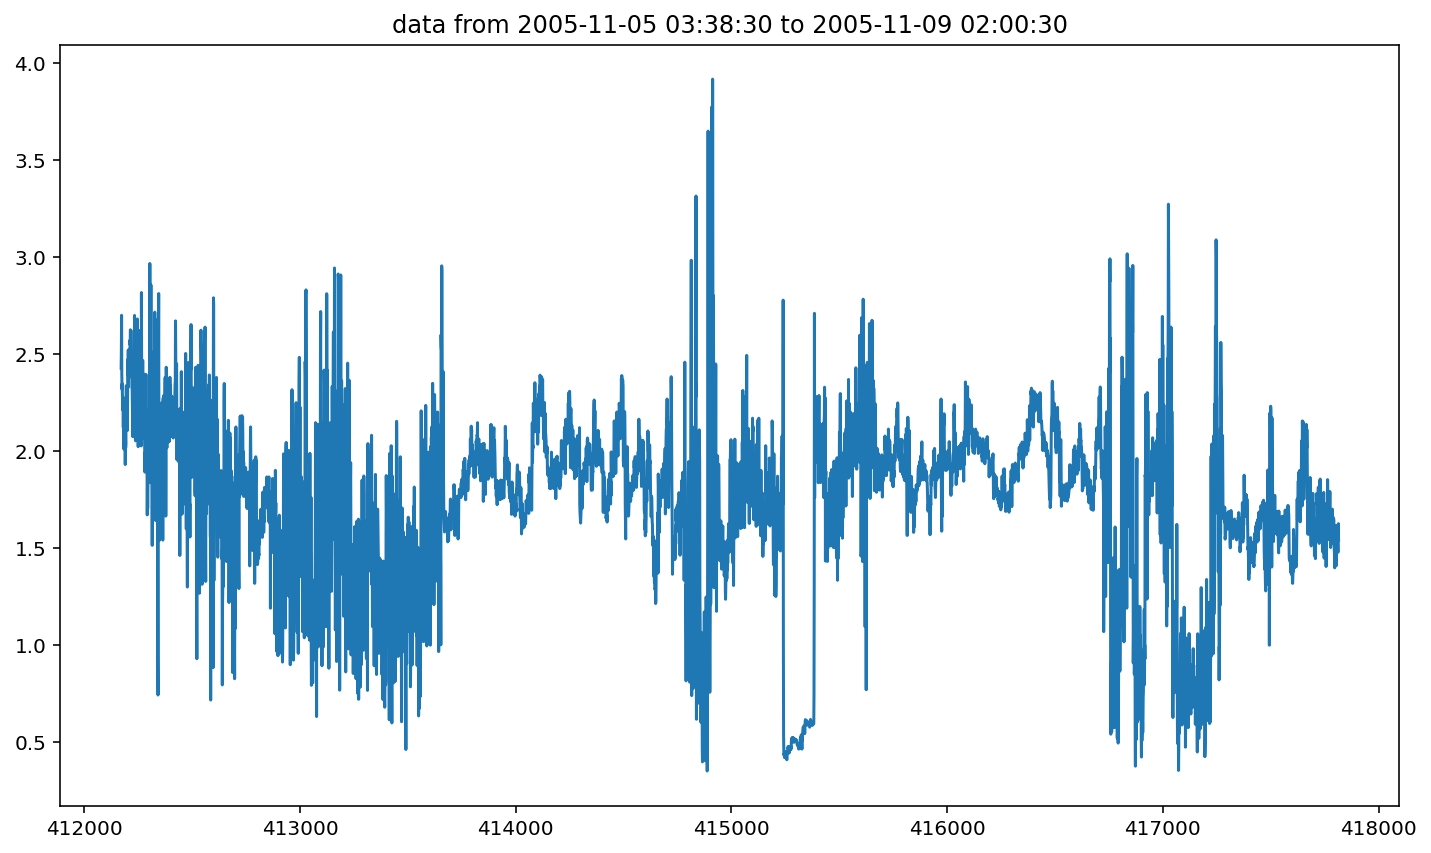

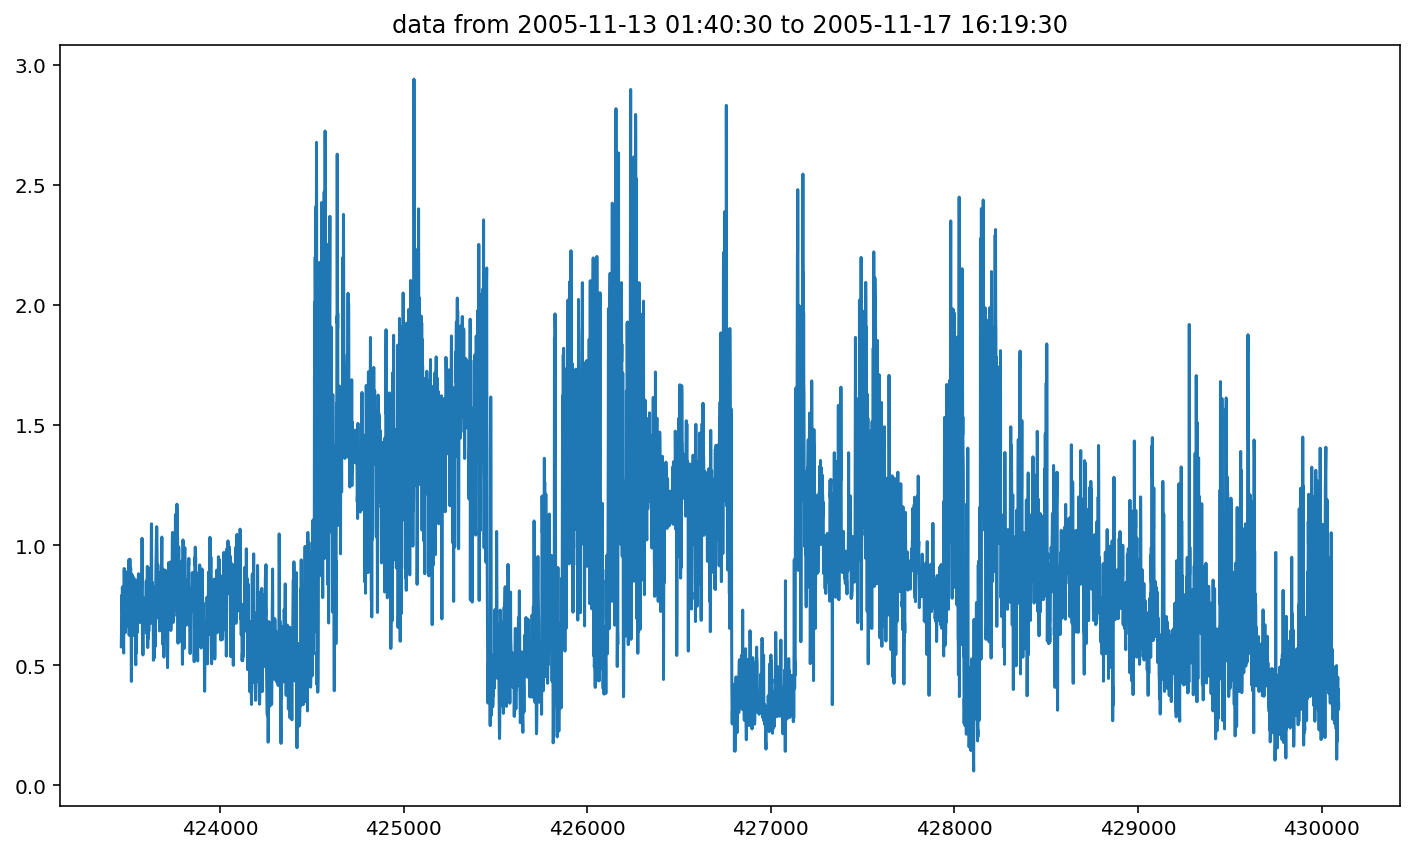

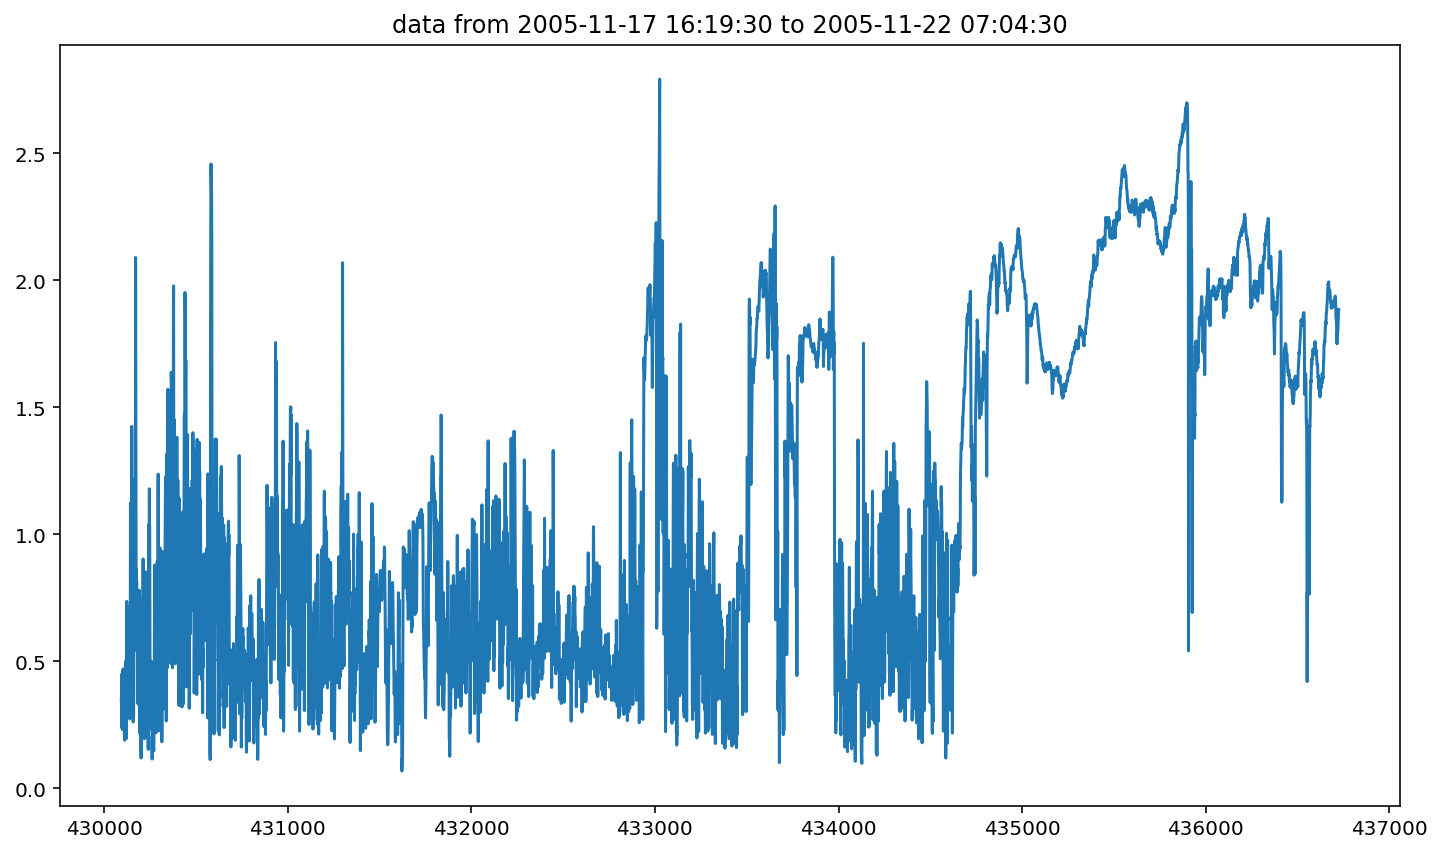

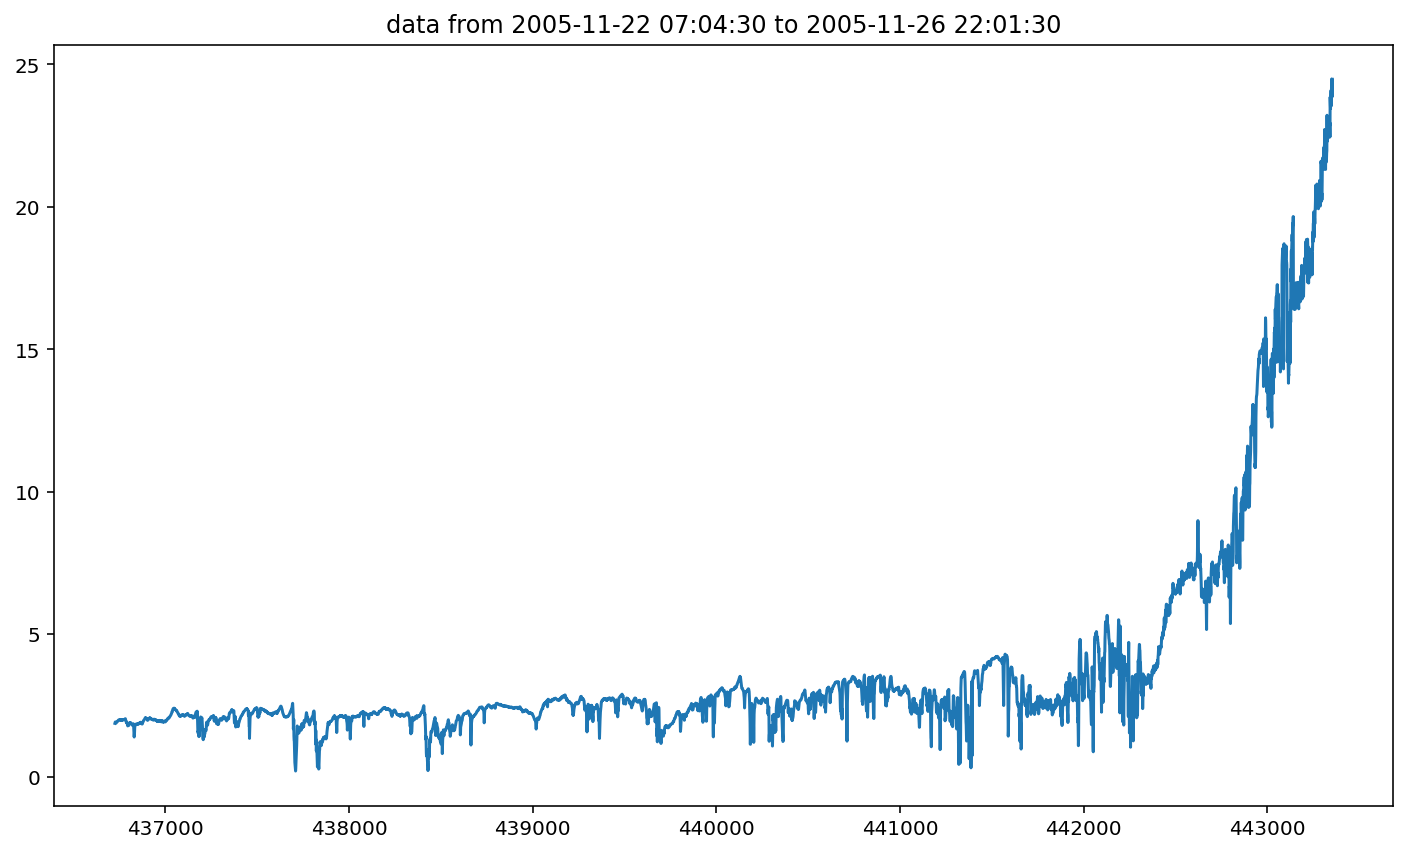

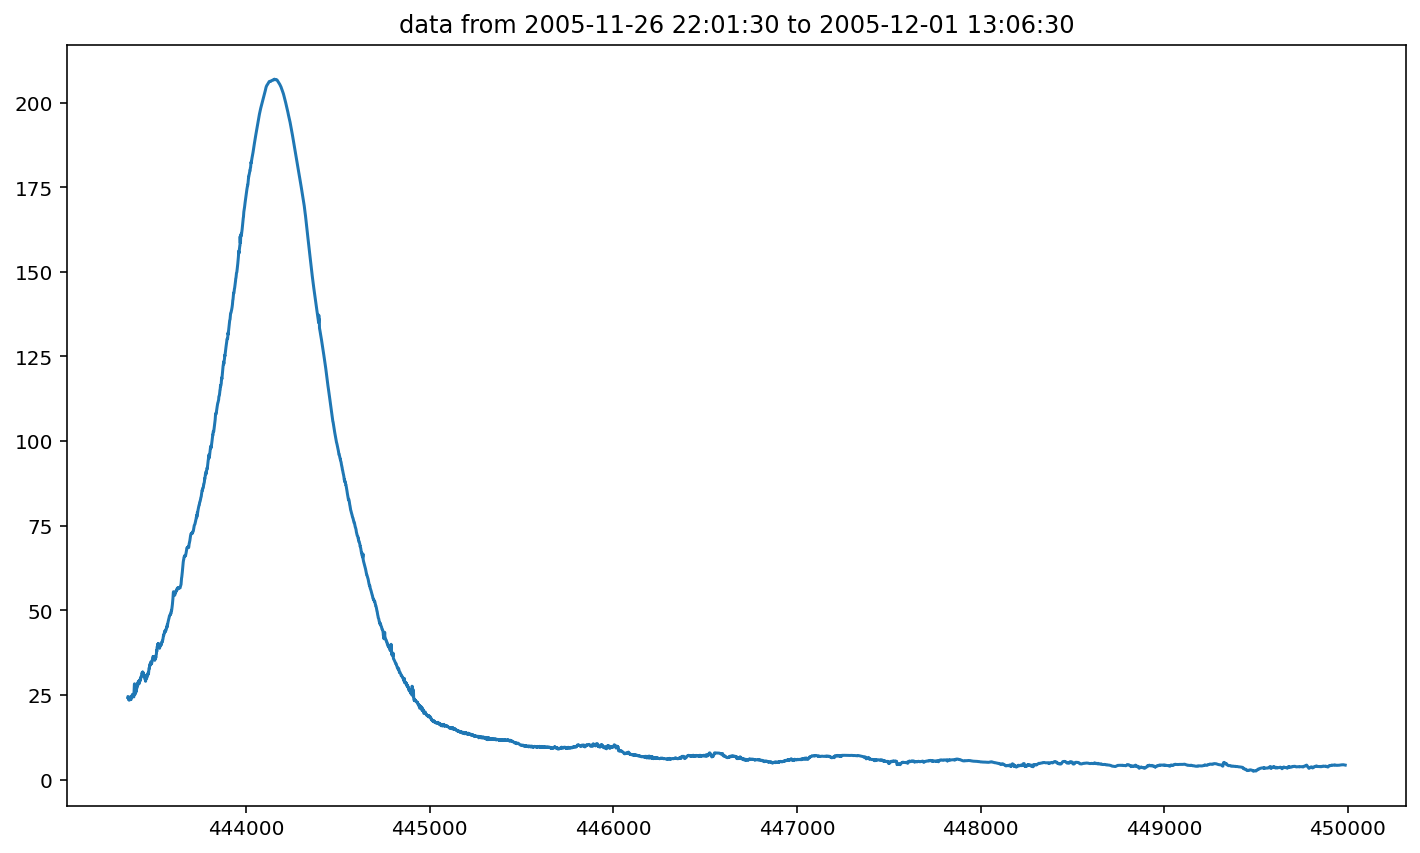

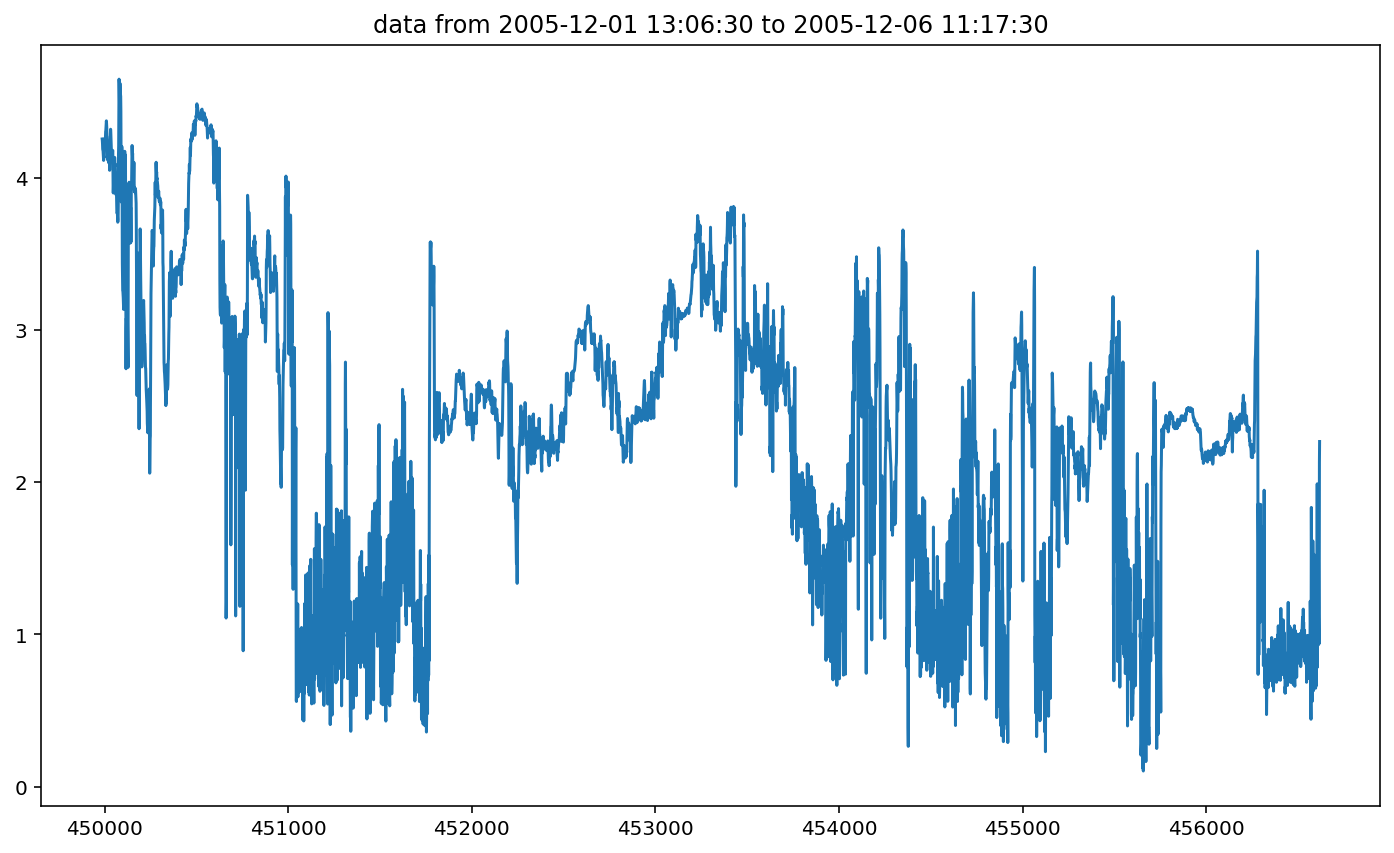

In [4]:
for j in range(len(indexlist)):
    
    start =indexlist[j]
    end =indexlist[j+1]
    distance = end - start
    interval = int(distance/6)
    for i in range(5):
        plt.figure()
        timeframe = data.index[start+(interval*i):start+(interval*(i+1))]
        plt.title('data from {} to {}'.format(data['Time'][start+(interval*i)],data['Time'][start+(interval*(i+1))] ))
        B_tot = data["Btotal"][start+(interval*i):start+(interval*(i+1))]
        plt.plot(timeframe,B_tot)

In [0]:
# the first orbit can be 

Sample start date:  2005-09-10 00:00:30 
Sample end date: 2005-09-12 00:00:30
Start Date:  2005-09-10 00:00:30
End Date:  2005-09-11 23:59:30


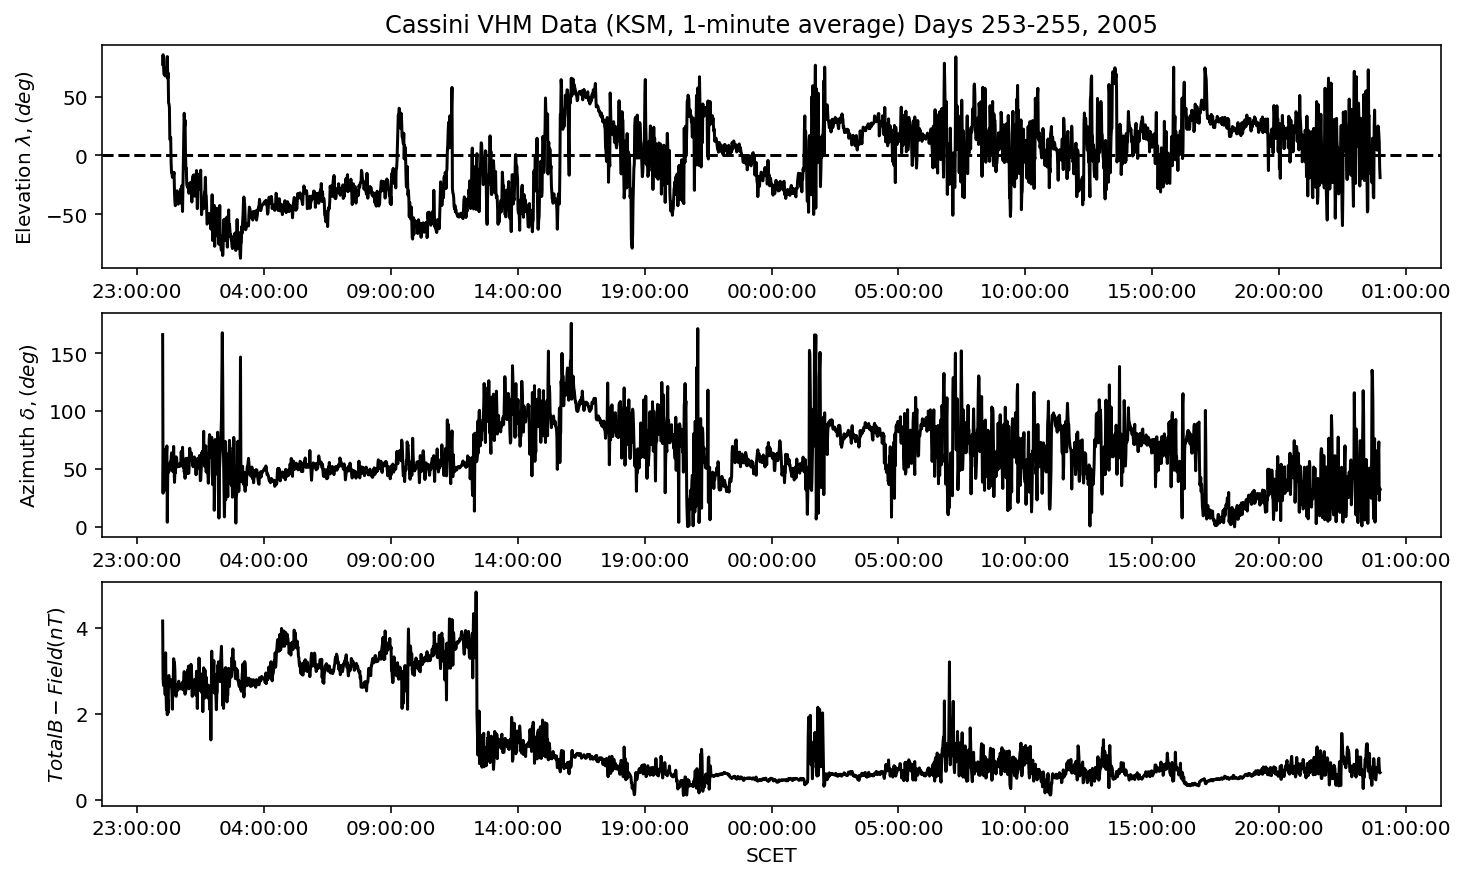

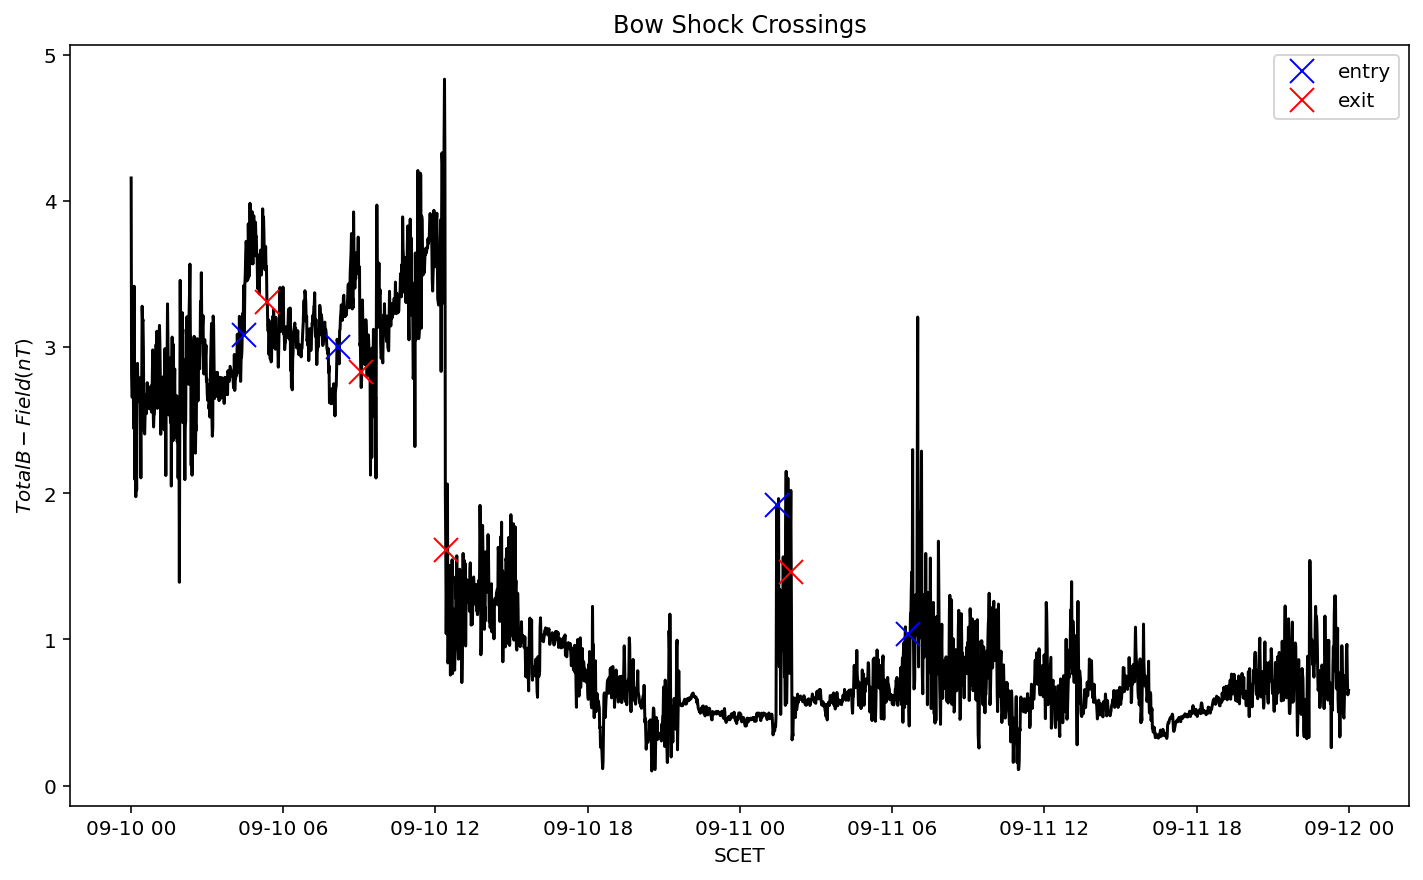

In [3]:
# 253-255
windowsize = 7
estimatedNumCrossings = 7
year = 2005
start_day = 253
end_day = 255
day_data = get_day_data(start_day, end_day, year)
plot_KSM(day_data, year, start_day, end_day, xFormat = "Hour")
entries, exits, ax, ksmcoords_2,cross_array_172_174_2005= identify_crossings_2(day_data, windowsize, estimatedNumCrossings,3,2,200)